<a href="https://colab.research.google.com/github/mcnica89/FunProblems/blob/main/Hermite_Paper_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Good plots

## Defining Helper Functions (e.g. my_hermite)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_hermite
from scipy.constants import pi
from scipy.special import airy as scipy_airy
from scipy.special import factorial
import matplotlib.transforms as mtransforms

def airy(x):
  return scipy_airy(x)[0] #the scipy airy returns a 4 tuple with Ai and related things

def my_hermite(n,x,t=1):
  return (2*t)**(-n/2) * eval_hermite(n,x /np.sqrt(2*t))

## Three asymptotic O(sqrt(n)) plot

/tmp/ipython-input-2214553180.py:39: RuntimeWarning: divide by zero encountered in power
  * ( 1 - a**2 )**(-1.0/4)
/tmp/ipython-input-2214553180.py:60: RuntimeWarning: divide by zero encountered in divide
  ans = ( n**(n/2)
/tmp/ipython-input-2214553180.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


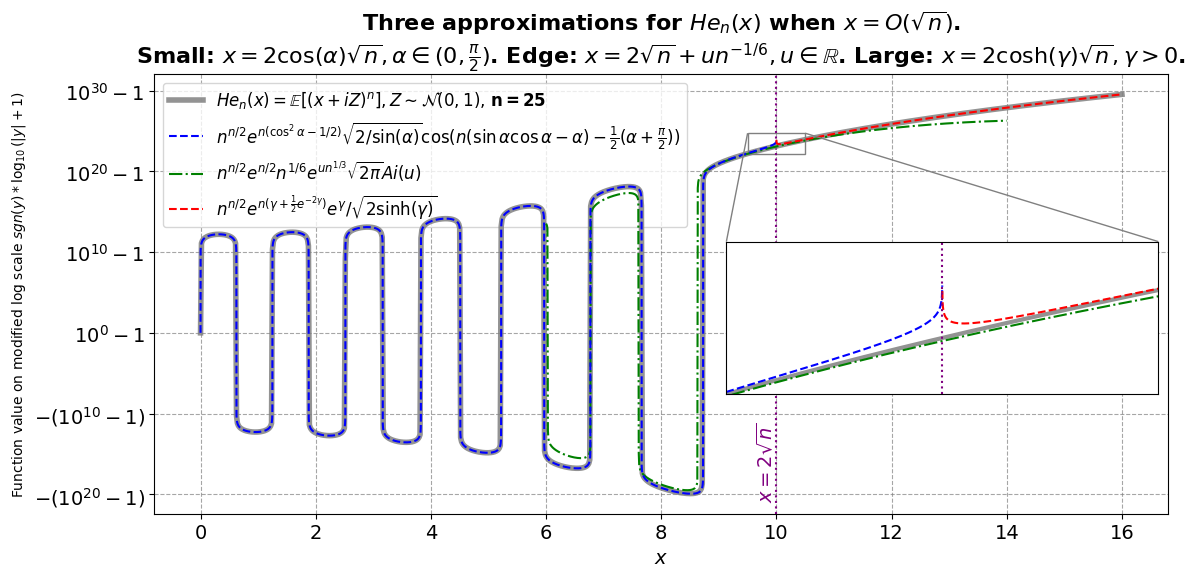

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
plt.rcParams.update({'font.size': 14})  # or any number you prefer
# Define the parameter n
n = 25
sqrt_n = np.sqrt(n)

# Define the x ranges for each function

mid_x = 2.0*sqrt_n
mid_minus_x = 1.2*sqrt_n
mid_plus_x = 2.8*sqrt_n
max_x = 3.2*sqrt_n

x_H = np.linspace(0, max_x, 1000)
x_small = np.linspace(0, mid_x, 50_000)
x_edge = np.linspace(mid_minus_x, mid_plus_x, 1_000)
x_large = np.linspace(mid_x, max_x, 50_000)

# Define the functions (replace these with your actual definitions)

def my_graph_map(y):
  return np.sign(y)*np.log10(np.abs(y)+1)

def H(x):
  return my_graph_map(my_hermite(n, x))  # hermite

def approx_small(x):
    a = x / 2 / sqrt_n
    cos_arg = (
          n * (a * np.sqrt(1 - a**2) - np.arccos(a))
          - 0.5*( np.arccos(a) - np.pi/2 )
    )

    ans = ( n**(n/2) * np.sqrt(2)
      * np.exp(n*(a**2 - 1/2))
      * np.cos( cos_arg )
      * ( 1 - a**2 )**(-1.0/4)
    )

    return my_graph_map(ans)

def approx_edge(x):
  #u = (x - 2*sqrt_n) * n**(1/6)
  #a = x / 2 / sqrt_n
  u = ( x - 2*sqrt_n ) * n**(1/6)
  ans = ( np.sqrt(2*np.pi)
    * np.exp(n/2)
    * n**(n/2)
    * n**(1/6)
    * np.exp(u* n**(1/3))
    * airy(u)
  )
  return my_graph_map(ans)  # placeholder

def approx_large(x):
    a = x / 2 / sqrt_n
    phi = np.arccosh(a)
    ans = ( n**(n/2)
      * np.exp(n*(phi + 0.5*np.exp(-2*phi)))
      * np.exp(phi/2)
      / np.sqrt(2*np.sinh(phi))
    )
    return my_graph_map(ans)

# Compute y-values
y_H = H(x_H)
y_small = approx_small(x_small)
y_edge = approx_edge(x_edge)
y_large = approx_large(x_large)

# Create the main plot
fig, ax = plt.subplots(figsize=(12, 6))

# Get current y-tick positions
yticks = ax.get_yticks()

# Define custom labels
custom_labels = [f'$10^{{{int(y)}}} - 1$' for y in [10, 20, 30,0]]+[f'$-(10^{{{int(y)}}} - 1)$' for y in [10, 20, 30]]

 # example: [10^1 - 1, 10^2 - 1, ...]

# Apply to specific ticks (e.g., at 10, 20, 30)
ax.set_yticks([10, 20, 30,0,-10,-20,-30])
ax.set_yticklabels(custom_labels)
ax.grid(True, which='major', axis='both', linestyle='--', color='gray', alpha=0.7)

He_opacity = 0.85
ax.plot(x_H, y_H, label=r'$He_{n}(x) = \mathbb{E}[ (x+ iZ)^n ], Z \sim \mathcal{N}(0,1)$, $\mathbf{n=25}$', color='gray', linewidth=4.0,zorder=3, alpha=He_opacity)

ax.plot(x_small, y_small, label=r'$n^{n/2}  e^{n(\cos^2\alpha-1/2)} \sqrt{{2}/{\sin(\alpha)}} \cos(n (\sin\alpha\cos\alpha -\alpha) - \frac{1}{2}(\alpha+\frac{\pi}{2}))$', linestyle='--', color='blue', zorder=5)
ax.plot(x_edge, y_edge, label=r'$ n^{n/2} e^{n/2}  n^{1/6} e^{u n^{1/3}} \sqrt{2\pi} Ai(u)$', linestyle='-.', color='green', zorder=4)
ax.plot(x_large, y_large, label=r'$n^{n/2}e^{n (\gamma+\frac{1}{2} e^{-2\gamma})} e^{\gamma}/\sqrt{2 \sinh(\gamma)}$', linestyle='--', color='red',zorder=5)



ax.axvline(x=mid_x, color='purple', linestyle=':') #, label='$x = 2 \sqrt{n}$')
ax.text(mid_x, -16, r"$x = 2\sqrt{n}$", rotation=90, ha='right',
        verticalalignment='center', color='purple')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'Function value on modified log scale $sgn(y)*\log_{10}(|y|+1)$',fontsize=10)

ax.set_title(r'Three approximations for $He_n(x)$ when $x=O(\sqrt{n})$.'+"\n"+ r'Small: $x = 2\cos(\alpha)\sqrt{n},\alpha \in (0,\frac{\pi}{2})$. Edge: $x = 2\sqrt{n} + u n^{-1/6}, u \in \mathbb{R}$. Large: $x = 2\cosh(\gamma)\sqrt{n}, \gamma > 0$.', loc="center",fontweight='bold',fontsize=16)
# (smaller offset than the title's pad so it sits closer to the axes than the main title)


legend = ax.legend(loc='upper left',fontsize=12)
legend.set_zorder(2)

# Rectangle region around x = 2√n
x1 = 1.9 * sqrt_n
x2 = 2.1 * sqrt_n
y1 = min(H(np.array([x1, x2]))) - 0
y2 = max(H(np.array([x1, x2]))) + 0.8

# Draw rectangle on main plot
#rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
#                     edgecolor='purple', facecolor='none', lw=2, linestyle='--')
#ax.add_patch(rect)

# Create inset zoomed axes
axins = zoomed_inset_axes(ax, zoom=7.5, loc='lower right', bbox_to_anchor = (1.0,0.25), bbox_transform = ax.transAxes)
axins.plot(x_H, y_H, color='gray', linewidth=3.0,alpha=He_opacity)
axins.plot(x_small, y_small, linestyle='--', color='blue')
axins.plot(x_edge, y_edge, linestyle='-.', color='green')
axins.plot(x_large, y_large, linestyle='--', color='red')
axins.axvline(x=mid_x, color='purple', linestyle=':')

# Set zoom limits
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

# Draw connecting lines between main plot and inset
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")

plt.tight_layout()

ymin, ymax = ax.get_ylim()

plt.savefig("Hermite_O_sqrt_n_corrected.png", dpi=300)
plt.show()

## Asymptotic O(1) and O(n) plot

/tmp/ipython-input-3763993983.py:38: RuntimeWarning: divide by zero encountered in divide
  ans = x**n * np.exp( -n**2/x**2/2)


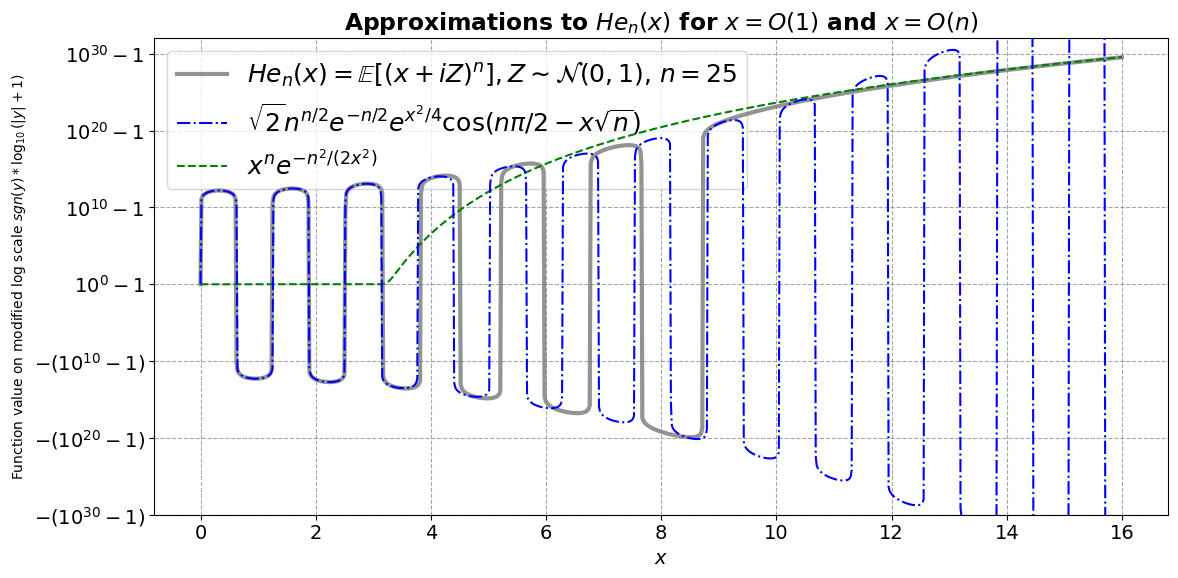

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
plt.rcParams.update({'font.size': 14})  # or any number you prefer
# Define the parameter n
n = 25
sqrt_n = np.sqrt(n)

# Define the x ranges for each function

mid_x = 2.0*sqrt_n
mid_minus_x = 1.2*sqrt_n
mid_plus_x = 2.8*sqrt_n
max_x = 3.2*sqrt_n

x_H = np.linspace(0, max_x, 1000)
x_small = np.linspace(0, mid_x, 50_000)
x_edge = np.linspace(mid_minus_x, mid_plus_x, 1_000)
x_large = np.linspace(mid_x, max_x, 50_000)

# Define the functions (replace these with your actual definitions)

def my_graph_map(y):
  return np.sign(y)*np.log10(np.abs(y)+1)

def H(x):
  return my_graph_map(my_hermite(n, x))  # hermite

def approx_simple(x):
  ans = ( np.sqrt(2)*
         (n/np.e)**(n/2)
         * np.exp(x**2/4)
         * np.cos( n*np.pi/2 - x*np.sqrt(n) ))
  return my_graph_map(ans)


def approx_extra(x):
  ans = x**n * np.exp( -n**2/x**2/2)
  return my_graph_map(ans)


def approx_small(x):
    a = x / 2 / sqrt_n
    cos_arg = (
          n * (a * np.sqrt(1 - a**2) - np.arccos(a))
          - 0.5*( np.arccos(a) - np.pi/2 )
    )

    ans = ( n**(n/2) * np.sqrt(2)
      * np.exp(n*(a**2 - 1/2))
      * np.cos( cos_arg )
      * ( 1 - a**2 )**(-1.0/4)
    )

    return my_graph_map(ans)

def approx_edge(x):
  #u = (x - 2*sqrt_n) * n**(1/6)
  #a = x / 2 / sqrt_n
  u = ( x - 2*sqrt_n ) * n**(1/6)
  ans = ( np.sqrt(2*np.pi)
    * np.exp(n/2)
    * n**(n/2)
    * n**(1/6)
    * np.exp(u* n**(1/3))
    * airy(u)
  )
  return my_graph_map(ans)  # placeholder

def approx_large(x):
    a = x / 2 / sqrt_n
    phi = np.arccosh(a)
    ans = ( n**(n/2)
      * np.exp(n*(phi + 0.5*np.exp(-2*phi)))
      * 2*np.exp(-phi)
      / np.sqrt(np.sinh(phi))
    )
    return my_graph_map(ans)

# Compute y-values
y_H = H(x_H)
y_simple = approx_simple(x_H)
y_extra = approx_extra(x_H)
#y_small = approx_small(x_small)
#y_edge = approx_edge(x_edge)
#y_large = approx_large(x_large)

# Create the main plot
fig, ax = plt.subplots(figsize=(12, 6))

#set the y lim using the previous plot!
ax.set_ylim(ymin, ymax)


# Get current y-tick positions
yticks = ax.get_yticks()

# Define custom labels
custom_labels = [f'$10^{{{int(y)}}} - 1$' for y in [10, 20, 30,0]]+[f'$-(10^{{{int(y)}}} - 1)$' for y in [10, 20, 30]]

 # example: [10^1 - 1, 10^2 - 1, ...]

# Apply to specific ticks (e.g., at 10, 20, 30)
ax.set_yticks([10, 20, 30,0,-10,-20,-30])
ax.set_yticklabels(custom_labels)
ax.grid(True, which='major', axis='both', linestyle='--', color='gray', alpha=0.7)
He_opacity = 0.85
ax.plot(x_H, y_H, label=r'$He_{n}(x) = \mathbb{E}[ (x+ iZ)^n ], Z \sim \mathcal{N}(0,1)$, $n=25$', color='gray', linewidth=3.0,zorder=3, alpha=He_opacity )
ax.plot(x_H, y_simple, label=r'$\sqrt{2} n^{n/2} e^{-n/2}  e^{x^2/4} \cos( n \pi/2 -x\sqrt{n})$', linestyle='-.', color='blue', zorder=5)
ax.plot(x_H, y_extra, label=r'$x^n e^{-n^2/(2x^2)}$', linestyle='--', color='green', zorder=4)

#ax.plot(x_small, y_small, label=r'$n^{n/2} \sqrt{2 / \sin(\psi) } e^{n(\cos^2\psi-1/2)} \cos(n (\sin\psi\cos\psi -\psi) - \frac{1}{2}(\psi+\frac{\pi}{2}))$', linestyle='--', color='blue', zorder=5)
#ax.plot(x_edge, y_edge, label=r'$\sqrt{2\pi} e^{n/2} n^{n/2} n^{1/6} e^{u n^{1/3}} Ai(u)$', linestyle='-.', color='green', zorder=4)
#ax.plot(x_large, y_large, label=r'$n^{n/2}e^{n (\phi+\frac{1}{2} e^{-2\phi})} {2e^{-\phi}}/{\sqrt{\sinh(\phi)}}$', linestyle='--', color='red',zorder=5)


#ax.axvline(x=mid_x, color='purple', linestyle=':') #, label='$x = 2 \sqrt{n}$')
#ax.text(mid_x, -16, r"$x = 2\sqrt{n}$", rotation=90, ha='right',
#        verticalalignment='center', color='purple')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'Function value on modified log scale $sgn(y)*\log_{10}(|y|+1)$',fontsize=10)
ax.set_title(r'Approximations to $He_n(x)$ for $x=O(1)$ and $x=O(n)$',fontweight = 'bold')
legend = ax.legend(loc='upper left',fontsize=18)
legend.set_zorder(2)

# Rectangle region around x = 2√n
#x1 = 1.9 * sqrt_n
#x2 = 2.1 * sqrt_n
#y1 = min(H(np.array([x1, x2]))) - 0
#y2 = max(H(np.array([x1, x2]))) + 0.8

# Draw rectangle on main plot
#rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
#                     edgecolor='purple', facecolor='none', lw=2, linestyle='--')
#ax.add_patch(rect)

# Create inset zoomed axes
#axins = zoomed_inset_axes(ax, zoom=7.5, loc='lower right', bbox_to_anchor = (1.0,0.25), bbox_transform = ax.transAxes)
#axins.plot(x_H, y_H, color='gray', linewidth=3.0)
#axins.plot(x_small, y_small, linestyle='--', color='blue')
#axins.plot(x_edge, y_edge, linestyle='-.', color='green')
#axins.plot(x_large, y_large, linestyle='--', color='red')
#axins.axvline(x=mid_x, color='purple', linestyle=':')

# Set zoom limits
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticks([])
#axins.set_yticks([])

# Draw connecting lines between main plot and inset
#mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")

plt.tight_layout()


plt.savefig("Hermite_O_1_O_n.png", dpi=300)
plt.show()

## Arcsine plot

/tmp/ipython-input-2928622224.py:24: RuntimeWarning: invalid value encountered in sqrt
  ans = np.where( np.abs(x) < 2, 1/np.sqrt(4-x**2)/np.pi, 0.0)
/tmp/ipython-input-2928622224.py:32: RuntimeWarning: invalid value encountered in arcsin
  0.5 + np.arcsin(x / 2) / np.pi
/tmp/ipython-input-2928622224.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


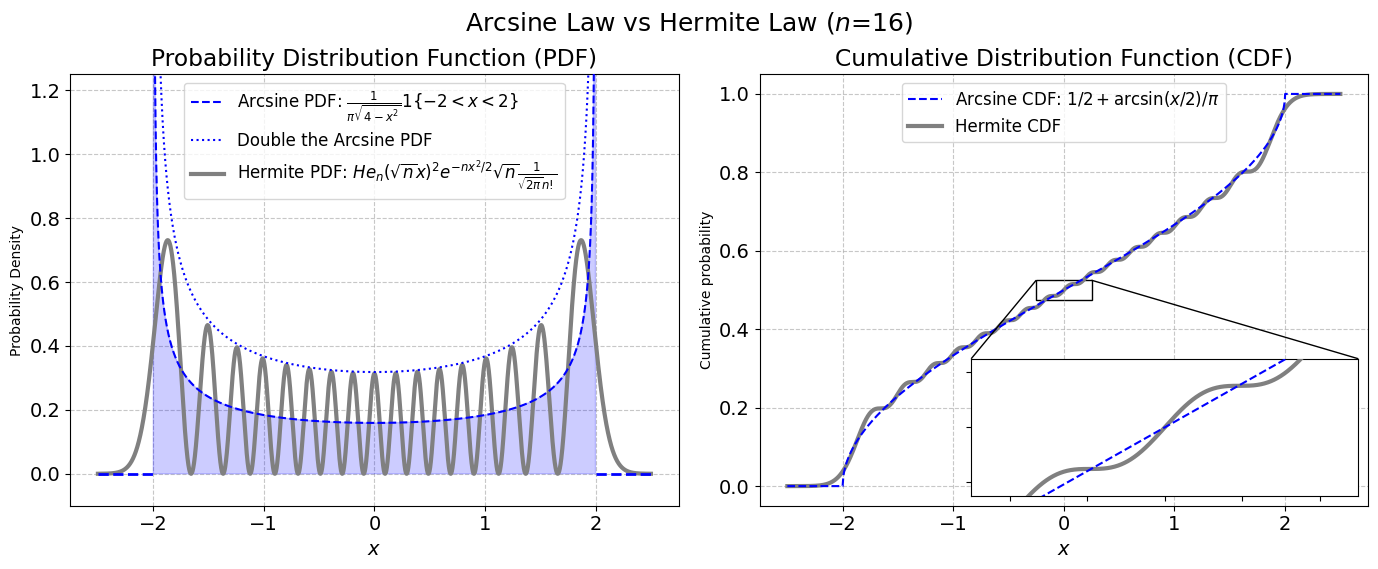

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.special import factorial

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

plt.rcParams.update({'font.size': 14})  # or any number you prefer

# Parameters
n = 16
sqrt_n = np.sqrt(n)
max_x = 2.5
x = np.linspace(-max_x, max_x, 10_000)
x_trimmed = np.linspace(-1.999, 1.999, 10_000)




def my_f(x):
  return (my_hermite(n, x*np.sqrt(n) ))**2 * np.exp(-n*x**2/2) * np.sqrt(n/np.pi/2) / factorial(n)   # hermite

def arcsine(x):
  ans = np.where( np.abs(x) < 2, 1/np.sqrt(4-x**2)/np.pi, 0.0)
  return ans

def arcsine_cdf(x):
  cdf = np.where(
        x <= -2, 0.0,
        np.where(
            x >= 2, 1.0,
            0.5 + np.arcsin(x / 2) / np.pi
        )
  )
  return cdf

# Compute y-values

# Evaluate PDFs
y_my_f = my_f(x)
y_arcsine = arcsine(x)

# Compute CDFs
cdf_my_f = cumulative_trapezoid(y_my_f, x, initial=0)
cdf_arcsine = arcsine_cdf(x) #cumulative_trapezoid(y_arcsine, x, initial=0)

# Normalize CDFs (optional but typical)
#cdf_my_f /= cdf_my_f[-1]
#cdf_arcsine /= cdf_arcsine[-1]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle(r"Arcsine Law vs Hermite Law ($n$=16)", fontsize=18, y=0.95)

# Plot PDFs
arcsine_linestyle = '--'
#(my_hermite(n, x*np.sqrt(n) ))**2 * np.exp(-n*x**2/2) * np.sqrt(n/np.pi/2) / factorial(n)

y_arcsine = arcsine(x_trimmed)
ax1.plot(x_trimmed, y_arcsine, label=r'Arcsine PDF: $\frac{1}{\pi \sqrt{4-x^2}} 1\{-2 < x < 2\}$', linestyle=arcsine_linestyle, color='blue', zorder=5)
ax1.plot(x_trimmed, 2*y_arcsine, label=r'Double the Arcsine PDF', linestyle=":", color='blue', zorder=5)
ax1.plot(x, y_my_f, label=r'Hermite PDF: $He_n(\sqrt{n} x)^2 e^{-nx^2/2} \sqrt{n} \frac{1}{\sqrt{2\pi} n!}$', color='gray', linewidth=3.0, zorder=3)
ax1.hlines(y=0, xmin=-max_x, xmax=-2, colors='blue', linestyles=arcsine_linestyle, linewidth=2, zorder=4)
ax1.hlines(y=0, xmin=2, xmax=max_x, colors='blue', linestyles=arcsine_linestyle, linewidth=2, zorder=4)
ax1.fill_between(x_trimmed, y_arcsine, color='blue', alpha=0.2, zorder=2)

ax1.set_ylim(-0.1, 1.25)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel('Probability Density', fontsize=10)
ax1.set_title(r'Probability Distribution Function (PDF)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper center', fontsize=12)

# Plot CDFs

ax2.plot(x, cdf_arcsine, label=r'Arcsine CDF: $1/2 + \arcsin(x / 2)/\pi$', linestyle=arcsine_linestyle, color='blue', zorder=5)
ax2.plot(x, cdf_my_f, label='Hermite CDF', color='gray', linewidth=3.0, zorder=3)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel('Cumulative probability', fontsize=10)
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper center', fontsize=12)

# Create zoomed inset on ax2
axins = zoomed_inset_axes(ax2, zoom=7, loc='lower right')  # zoom factor, location
axins.plot(x, cdf_my_f, color='gray', linewidth=3.0, zorder=3)
axins.plot(x, cdf_arcsine, linestyle=arcsine_linestyle, color='blue', zorder=5)

# Set zoomed region limits (adjust these as needed)
x1, x2 = -0.25, 0.25  # x-range of the zoom
y1, y2 = 0.475, 0.525  # y-range of the zoom
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.grid(True, linestyle='--', alpha=0.4)

# Remove tick labels (optional, for cleaner look)
axins.set_xticklabels([])
axins.set_yticklabels([])

# Draw a box and connectors between main and inset
mark_inset(ax2, axins, loc1=1, loc2=2, fc="none", ec="black", lw=1)

plt.tight_layout()
plt.savefig("Hermite_arcsine.png", dpi=300)
plt.show()


## semicircle plot

/tmp/ipython-input-2928622224.py:24: RuntimeWarning: invalid value encountered in sqrt
  ans = np.where( np.abs(x) < 2, 1/np.sqrt(4-x**2)/np.pi, 0.0)
/tmp/ipython-input-4145978553.py:43: RuntimeWarning: invalid value encountered in sqrt
  0.5 + (x * np.sqrt(4 - x**2)) / (4 * np.pi) + np.arcsin(x / 2) / np.pi
/tmp/ipython-input-4145978553.py:43: RuntimeWarning: invalid value encountered in arcsin
  0.5 + (x * np.sqrt(4 - x**2)) / (4 * np.pi) + np.arcsin(x / 2) / np.pi
/tmp/ipython-input-4145978553.py:34: RuntimeWarning: invalid value encountered in sqrt
  f = sum([ np.where( x**2 < 4*k/n, 1/np.sqrt(4*k/n-x**2)/np.pi, 0.0) for k in range(1,n) ])/n   # hermite
/tmp/ipython-input-4145978553.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  f = sum([ np.where( x**2 < 4*k/n, 1/np.sqrt(4*k/n-x**2)/np.pi, 0.0) for k in range(1,n) ])/n   # hermite


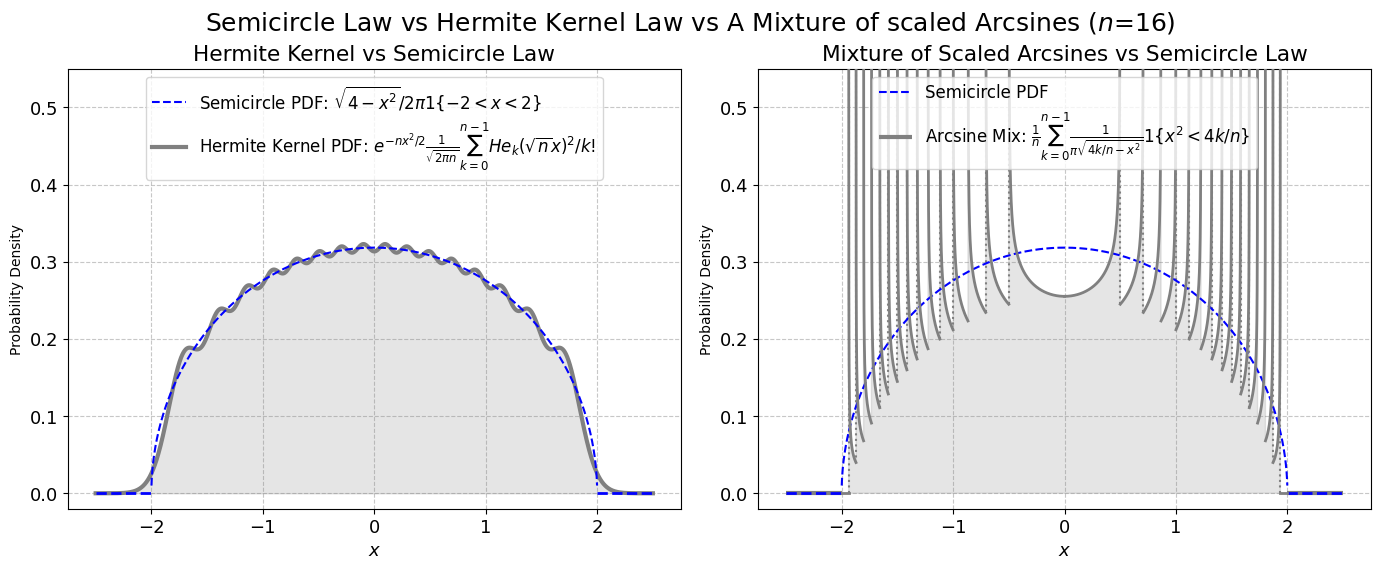

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.special import factorial

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

plt.rcParams.update({'font.size': 13})  # or any number you prefer

# Parameters
n = 16
sqrt_n = np.sqrt(n)
max_x = 2.5
max_y = 0.55
x = np.linspace(-max_x, max_x, 10_000)
x_trimmed = np.linspace(-1.999, 1.999, 10_000)




def my_f(x):
  #np.exp(-n*x**2/2) *
  f = sum([ (my_hermite(k, x*np.sqrt(n) ))**2 * np.exp(-n*x**2/2) * np.sqrt(1/np.pi/2) / factorial(k) / np.sqrt(n) for k in range(n) ])   # hermite
  return f

def semicircle(x):
  ans = np.where( np.abs(x) < 2, np.sqrt(4-x**2)/np.pi/2, 0.0)
  return ans

def my_arcsine(x,c):
  return np.where( x**2 < 4*c, 1/np.sqrt(4*c-x**2)/np.pi, 0.0)

def superposition(x):
  f = sum([ np.where( x**2 < 4*k/n, 1/np.sqrt(4*k/n-x**2)/np.pi, 0.0) for k in range(1,n) ])/n   # hermite
  return f

def semicircle_cdf(x):
  x = np.asarray(x)
  cdf = np.where(
      x <= -2, 0.0,
      np.where(
          x >= 2, 1.0,
          0.5 + (x * np.sqrt(4 - x**2)) / (4 * np.pi) + np.arcsin(x / 2) / np.pi
      )
  )
  return cdf

# Compute y-values

# Evaluate PDFs
y_my_f = my_f(x)
y_arcsine = arcsine(x)

# Compute CDFs
cdf_my_f = cumulative_trapezoid(y_my_f, x, initial=0)
cdf_semicircle = semicircle_cdf(x) #cumulative_trapezoid(y_arcsine, x, initial=0)

# Normalize CDFs (optional but typical)
#cdf_my_f /= cdf_my_f[-1]
#cdf_arcsine /= cdf_arcsine[-1]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle(r"Semicircle Law vs Hermite Kernel Law vs A Mixture of scaled Arcsines ($n$=16)", fontsize=18, y=0.95)

# Plot PDFs
arcsine_linestyle = '--'
#(my_hermite(n, x*np.sqrt(n) ))**2 * np.exp(-n*x**2/2) * np.sqrt(n/np.pi/2) / factorial(n)
y_semicircle = semicircle(x_trimmed)
ax1.plot(x_trimmed, y_semicircle, label=r'Semicircle PDF: $\sqrt{4-x^2}/2\pi 1\{-2 < x < 2\}$', linestyle=arcsine_linestyle, color='blue', zorder=5)
ax1.plot(x, y_my_f, label=r'Hermite Kernel PDF: $e^{-nx^2/2} \frac{1}{\sqrt{2\pi n}} \sum_{k=0}^{n-1} He_k(\sqrt{n} x)^2 / k!$', color='gray', linewidth=3.0, zorder=3)
ax1.hlines(y=0, xmin=-max_x, xmax=-2, colors='blue', linestyles=arcsine_linestyle, linewidth=2, zorder=4)
ax1.hlines(y=0, xmin=2, xmax=max_x, colors='blue', linestyles=arcsine_linestyle, linewidth=2, zorder=4)


ax1.fill_between(x, my_f(x), color='gray', alpha=0.2, zorder=2)

#ax1.fill_between(x_trimmed, y_semicircle, color='blue', alpha=0.2, zorder=2)

ax1.set_ylim(-0.02, max_y)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel('Probability Density', fontsize=10)
ax1.set_title(r'Hermite Kernel vs Semicircle Law')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper center', fontsize=12)

# Plot CDFs

ax2.set_ylim(-0.02, max_y)


pdf_superposition = superposition(x)
ax2.plot(x_trimmed, y_semicircle, label=r'Semicircle PDF', linestyle=arcsine_linestyle, color='blue', zorder=5)

my_width = 2
epsilon = 0.0002
for k in range(n):
  my_x = np.linspace(-2*np.sqrt((k+1)/n)+epsilon, -2*np.sqrt(k/n)-epsilon, 1000)
  ax2.plot(my_x, superposition(my_x), color='gray', linewidth=my_width, zorder=5)
  my_x = np.linspace(2*np.sqrt(k/n)+epsilon, 2*np.sqrt((k+1)/n)-epsilon, 1000)
  ax2.plot(my_x, superposition(my_x), color='gray', linewidth=my_width, zorder=5)

  if k > 0:
    v_line_width = 1.5
    ax2.vlines(x=2*np.sqrt(k/n),ymin=superposition(2*np.sqrt(k/n)),ymax = 1.0,linewidth=v_line_width,color='gray',linestyle=":")
    ax2.vlines(x=-2*np.sqrt(k/n),ymin=superposition(-2*np.sqrt(k/n)),ymax = 1.0,linewidth=v_line_width,color='gray',linestyle=":")


ax2.hlines(y=0, xmin=-max_x, xmax=-2, colors='gray', label=r'Arcsine Mix: $\frac{1}{n}\sum_{k=0}^{n-1}\frac{1}{\pi \sqrt{4k/n - x^2}} 1\{x^2 < 4k/n\} $', linewidth=3, zorder=4)
ax2.hlines(y=0, xmin=2, xmax=max_x, colors='gray', linewidth=3, zorder=4)

ax2.fill_between(x_trimmed, superposition(x_trimmed), color='gray', alpha=0.2, zorder=2)

#my_x = np.linspace(-2.1,-2.0,10)
#ax2.plot(my_x, superposition(my_x), label=r'Arcsine Mix: $\frac{1}{n}\sum_{k=0}^{n-1}\frac{1}{\pi \sqrt{4k/n - x^2}} 1\{x^2 < 4k/n\} $', color='gray', linewidth=3.0, zorder=3)

ax2.hlines(y=0, xmin=-max_x, xmax=-2, colors='blue', linestyles=arcsine_linestyle, linewidth=2, zorder=4)
ax2.hlines(y=0, xmin=2, xmax=max_x, colors='blue', linestyles=arcsine_linestyle, linewidth=2, zorder=4)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel('Probability Density', fontsize=10)
ax2.set_title(r'Mixture of Scaled Arcsines vs Semicircle Law')

ax2.grid(True, linestyle='--', alpha=0.7)
legend = ax2.legend(loc='upper center', fontsize=12)
legend.set_zorder(6)

# Create zoomed inset on ax2
#axins = zoomed_inset_axes(ax2, zoom=5, loc='lower right')  # zoom factor, location
#axins.plot(x, cdf_my_f, color='gray', linewidth=3.0, zorder=3)
#axins.plot(x, cdf_semicircle, linestyle=arcsine_linestyle, color='blue', zorder=5)

# Set zoomed region limits (adjust these as needed)
#x1, x2 = -2.1, -1.5  # x-range of the zoom
#y1, y2 = semicircle_cdf(x1), semicircle_cdf(x2)  # y-range of the zoom
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.grid(True, linestyle='--', alpha=0.4)

# Remove tick labels (optional, for cleaner look)
#axins.set_xticklabels([])
#axins.set_yticklabels([])

# Draw a box and connectors between main and inset
#mark_inset(ax2, axins, loc1=2, loc2=3, fc="none", ec="black", lw=1)

plt.tight_layout()
plt.savefig("Hermite_semicircle.png", dpi=300)
plt.show()


## Complex roots plot

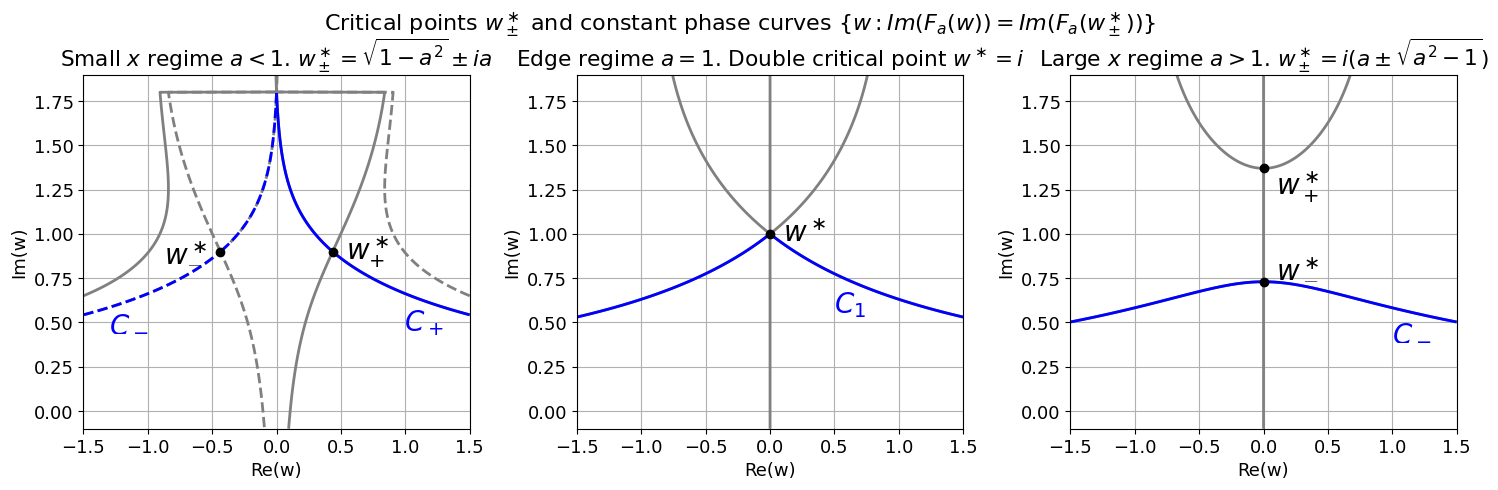

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
x_min = -1.5
x_max = 1.5
y_min = -0.1
y_max = 1.9
for ax in axes:
  ax.set_xlim(x_min, x_max)
  ax.set_ylim(y_min, y_max)
  ax.set_xlabel("Re(w)")
  ax.set_ylabel("Im(w)")
  ax.grid(True)


my_fs = 20


# Create a grid
x = np.linspace(x_min, x_max, 800)
y = np.linspace(y_min, y_max, 800)
X, Y = np.meshgrid(x, y)


#########################
###### Plot 0: a<1 ######
#########################

ax = axes[0]
a=0.9

# Compute the full function over entire domain
Z_full = np.arctan((X / 2) / (a - Y / 2)) - X * Y

# --- Mask for single branch ---
epsilon = 0.1  # To avoid division by zero near y = 2a
denominator = a - Y / 2

crit = 2*a
mask = (Y <= (crit+0.01)) & ( (Y-crit) < np.minimum(X,-X)*a/np.sqrt(1.0-a**2)) & (Y >= a) | ( (X>np.sqrt(1.0-a**2))& ((Y-a) < -0.25*(X-np.sqrt(1-a**2)) ) ) | ( (X<-np.sqrt(1.0-a**2))& ((Y-a) < 0.25*(X+np.sqrt(1-a**2)) ) )
#mask = (np.abs(denominator) > epsilon) & (Y > 0) & (X > 0)

# Masked Z for single branch only
Z_single = np.full_like(X, np.nan)
Z_single[mask] = np.arctan((X[mask] / 2) / denominator[mask]) - X[mask] * Y[mask]

# --- Plot ---

my_level = np.arccos(a)-a*np.sqrt(1-a**2)


# Plot full curve (dotted)
ax.contour(X, Y, Z_full, levels=[-my_level, my_level], colors='gray',  linewidths=2)

# Plot single branch (solid)
ax.contour(X, Y, Z_single, levels=[-my_level,my_level], colors='blue', linewidths=2)

# Labels and grid
ax.set_title(r"Small $x$ regime $a < 1$. $w_\pm^\ast = \sqrt{1-a^2} \pm i a$")


ax.plot(np.sqrt(1-a**2),a, 'ko')
ax.text(np.sqrt(1-a**2)+0.1,a, r"$w^\ast_{+}$", fontsize=my_fs,
          ha='left',
        va='center', color='black')
ax.text(-1.3, 0.5, r"$C_-$",va='center',ha='left',fontsize=my_fs,  color="blue")

ax.plot(-np.sqrt(1-a**2),a, 'ko')
ax.text(-np.sqrt(1-a**2)-0.1,a, r"$w_{-}^\ast$", fontsize=my_fs,  ha='right',
        va='center', color='black')

ax.text(1.3, 0.5, r"$C_+$",fontsize=my_fs,va='center',ha='right',  color="blue")


######################
#### Plot 1 : a=1
######################
ax = axes[1]
a = 1

# Compute the full function over entire domain
Z_full = np.arctan((X / 2) / (a - Y / 2)) - X * Y

# --- Mask for single branch ---
epsilon = 0.1  # To avoid division by zero near y = 2a
denominator = a - Y / 2
crit = a - np.sqrt(a**2-1)
mask = (Y <= (crit+0.01)) & ( np.abs((Y-crit)/X) < 3)
#mask = (np.abs(denominator) > epsilon) & (Y > 0) & (X > 0)

# Masked Z for single branch only
Z_single = np.full_like(X, np.nan)
Z_single[mask] = np.arctan((X[mask] / 2) / denominator[mask]) - X[mask] * Y[mask]

# Plot full curve (dotted)
contour_full = ax.contour(X, Y, Z_full, levels=[0], colors='gray',  linewidths=2)

# Plot single branch (solid)
contour_branch = ax.contour(X, Y, Z_single, levels=[0], colors='blue', linewidths=2)


ax.plot(0,1, 'ko')
ax.text(0+0.1,1, r"$w^\ast$", fontsize=my_fs,  ha='left',
        va='center', color='black')
# Labels and grid
ax.set_title(r"Edge regime $a = 1$. Double critical point $w^\ast = i$")
ax.text(0.5, 0.6, r"$C_1$",va='center',ha='left',fontsize=my_fs,  color="blue")


######################
#### Plot 2 : a>1
######################
ax = axes[2]
a = 1.05

# Compute the full function over entire domain
Z_full = np.arctan((X / 2) / (a - Y / 2)) - X * Y

# --- Mask for single branch ---
epsilon = 0.1  # To avoid division by zero near y = 2a
denominator = a - Y / 2
crit = a - np.sqrt(a**2-1)
mask = (Y <= (crit+0.01)) & ( np.abs((Y-crit)/X) < 3)
#mask = (np.abs(denominator) > epsilon) & (Y > 0) & (X > 0)

# Masked Z for single branch only
Z_single = np.full_like(X, np.nan)
Z_single[mask] = np.arctan((X[mask] / 2) / denominator[mask]) - X[mask] * Y[mask]

# Plot full curve (dotted)
contour_full = ax.contour(X, Y, Z_full, levels=[0], colors='gray',  linewidths=2)

# Plot single branch (solid)
contour_branch = ax.contour(X, Y, Z_single, levels=[0], colors='blue', linewidths=2)


ax.plot(0,a+np.sqrt(a**2-1), 'ko')
ax.text(0+0.1,a+np.sqrt(a**2-1), r"$w^\ast_+$", fontsize=my_fs,  ha='left',
        va='top', color='black')
ax.plot(0,a-np.sqrt(a**2-1), 'ko')
ax.text(0+0.1,a-np.sqrt(a**2-1),r"$w^\ast_-$", fontsize=my_fs,  ha='left',
        va='bottom', color='black')
ax.text(1.0, 0.45, r"$C_-$",va='center',ha='left',fontsize=my_fs,  color="blue")


# Labels and grid
ax.set_title(r"Large $x$ regime $a > 1$. $w^\ast_\pm=i(a\pm\sqrt{a^{2}-1})$")


# Optional: overall figure title
fig.suptitle(r"Critical points $w^\ast_\pm$ and constant phase curves $\{w : Im(F_a(w)) = Im(F_a(w^\ast_\pm)) \}$", fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # adjust to fit suptitle
plt.show()

# Old stuff

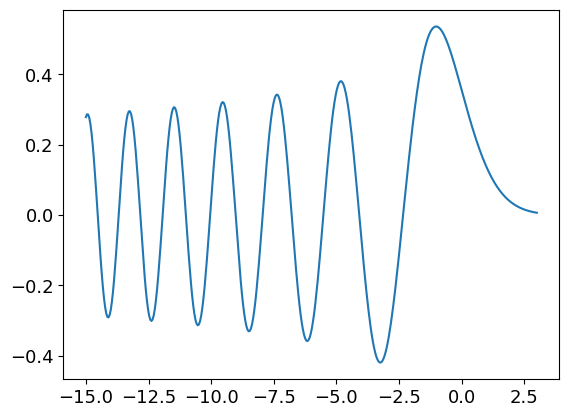

In [7]:
axis = np.linspace(-15, 3, 400)
#plt.plot(axis,my_hermite(3, axis))
plt.plot(axis,airy(axis))


In [8]:
np.log(2.7)

np.float64(0.9932517730102834)

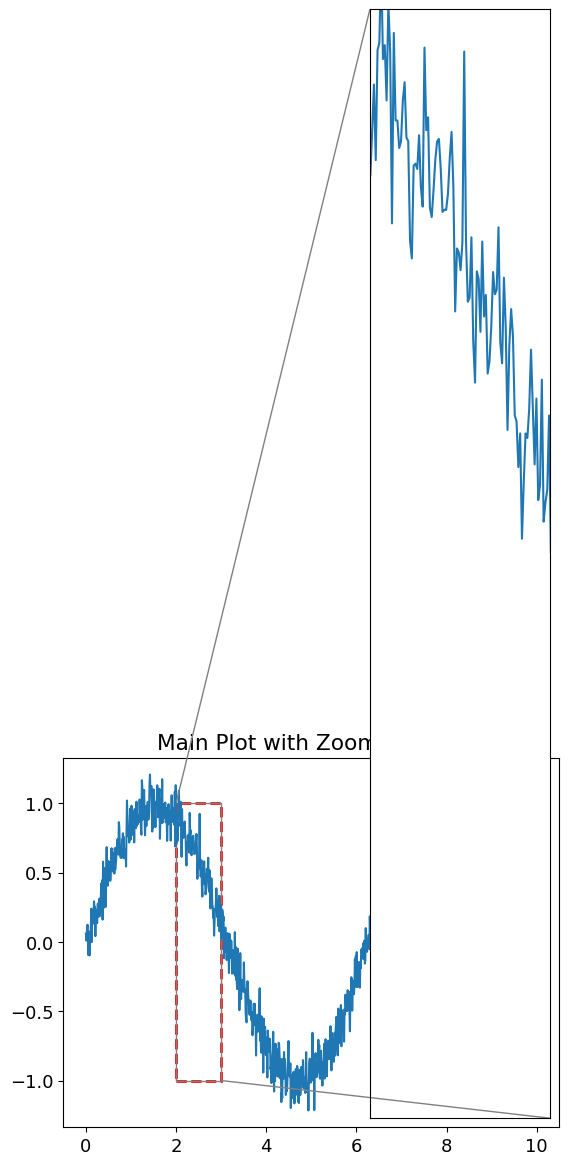

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Sample data
x = np.linspace(0, 10, 1000)
y = np.sin(x) + 0.1 * np.random.randn(len(x))

# Plot using plt.plot()
plt.plot(x, y)
plt.title("Main Plot with Zoomed Inset")

# Get current axes
ax = plt.gca()

# Zoom region
x1, x2 = 2, 3
y1, y2 = -1, 1

# Draw rectangle
rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                     edgecolor='red', facecolor='none', lw=2, linestyle='--')
ax.add_patch(rect)

# Create inset
axins = zoomed_inset_axes(ax, zoom=4, loc='lower right')
axins.plot(x, y)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()


/tmp/ipython-input-830365846.py:49: RuntimeWarning: divide by zero encountered in power
  * ( 1 - a_vals**2 / (4 * n) )**(-1.0/4)
/tmp/ipython-input-830365846.py:76: RuntimeWarning: divide by zero encountered in divide
  2 * np.exp(-phi)


<Figure size 1800x600 with 0 Axes>

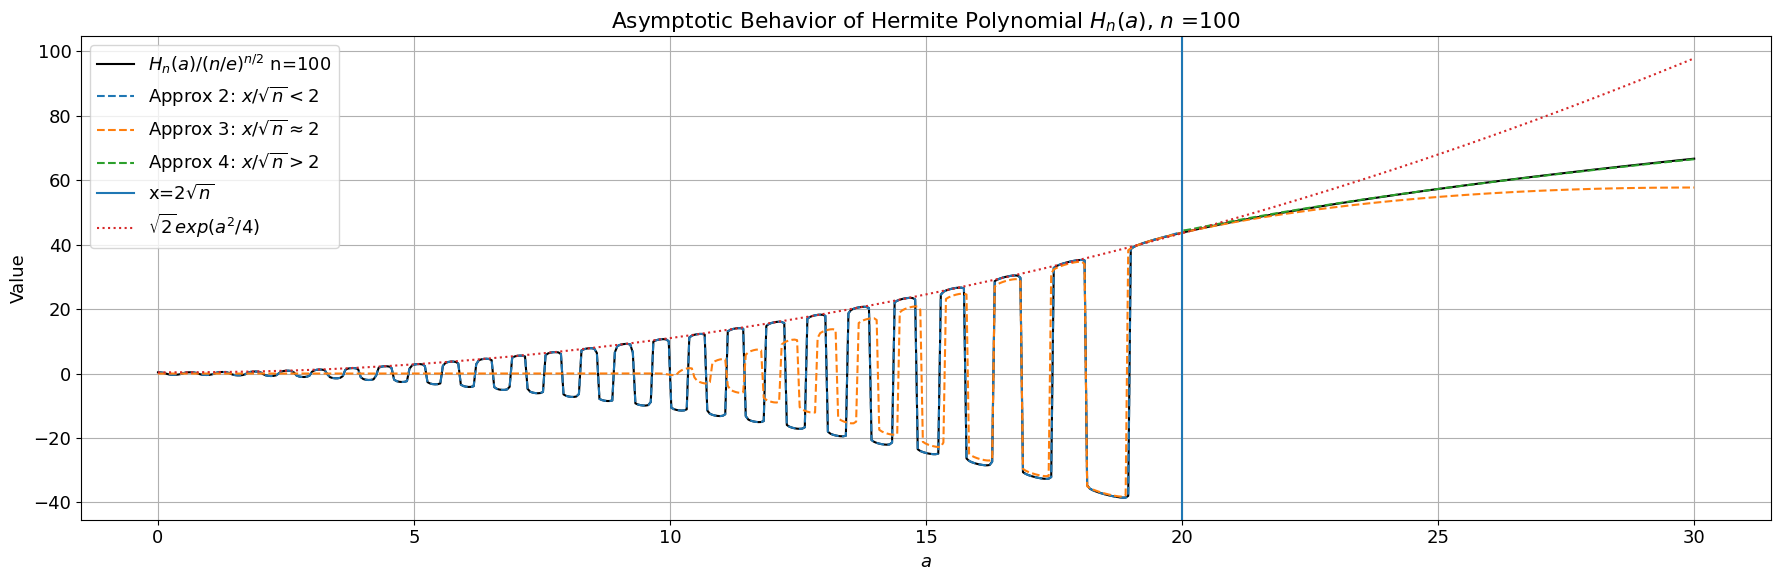

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:

def my_plot(n=3, mode = 'regular'):
  # Parameters
  #n = 40  # large n
  c = 2.0
  if mode == 'zoomed':
    delta_c = 0.05
    a_vals_extra_small = np.linspace((1-delta_c)*c*np.sqrt(n), c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_small = np.linspace((1-delta_c)*c*np.sqrt(n),c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_big = np.linspace(c*np.sqrt(n), (1+delta_c)*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
  elif mode == 'unscaled':
    a_vals_extra_small = np.linspace(0, 1.1*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_small = np.linspace(0,1.0*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_big = np.linspace(1.0*c*np.sqrt(n), 1.1*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
  else:
    a_vals_extra_small = np.linspace(0, 0.5*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_small = np.linspace(0,c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_big = np.linspace(c*np.sqrt(n), 1.5*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2


  # LHS: H_n(a,1) = Hermite polynomial
  lhs_small = (
      my_hermite(n, a_vals_small)
      / (n / np.e) ** (n / 2)
  )

  lhs_big = (
      my_hermite(n, a_vals_big)
      / (n / np.e) ** (n / 2)
  )
  a_vals = a_vals_extra_small #
  rhs1 = (
      np.sqrt(2)
      * np.exp(a_vals**2 / 4)
      * np.cos(n * pi / 2 - a_vals * np.sqrt(n))
      #* ( 1 - a_vals**2 / (4 * n) )**(-1.0/4)
    )

  a_vals = a_vals_small
  a = a_vals / np.sqrt(4*n)
  cos_arg = (
          n * (a * np.sqrt(1 - a**2) - np.arccos(a))
          - 0.5*( np.arccos(a) - np.pi/2 )
  )

  rhs2 = (
      np.sqrt(2)
      * np.exp(a_vals**2 / 4)
      * np.cos( cos_arg )
      * ( 1 - a_vals**2 / (4 * n) )**(-1.0/4)
    )
  ####

  a_vals = np.concatenate((a_vals_small, a_vals_big))
  x = ( a_vals / (2*np.sqrt(n)) - 1 )*n**(2/3)*2

  rhs3 = (
      np.sqrt(2*np.pi)
      * np.exp( x*n**(1/3) )
      * (np.sqrt(np.e)/2)**n
      * n**(1/6)
      * airy(x)
      / (n / np.e) ** (n / 2)
      * (4*n)**(n/2)
  )




  ###

  a = a_vals_big / np.sqrt(4*n)

  phi = np.arccosh(a)

  rhs4 = (
      2 * np.exp(-phi)
      * np.exp(n*(-np.log(2) + phi + 0.5*np.exp(-2*phi) ))
      / (n / np.e) ** (n / 2)
      * (4*n)**(n/2)
      / np.sqrt(np.sinh(phi))
    )

  e_a2 = np.sqrt(2) * np.exp(a_vals**2 / 4)

  # Normalize both sides for comparison
  #lhs_norm = lhs
  #rhs_norm = rhs

  # Plot
  def f(x):
    return np.sign(x)*np.log10(np.abs(x)+1)

  plt.plot(a_vals_small, f(lhs_small), label=f"$H_n(a)/(n/e)^{{n/2}}$ n={n}",color='black')
  plt.plot(a_vals_big, f(lhs_big),color='black')

  if mode != 'unscaled':
    plt.plot(a_vals_small, f(rhs2), label=r"Approx 2: $x/\sqrt{n} < 2$", linestyle='--')

    plt.plot(a_vals, f(rhs3), label=r"Approx 3: $x/\sqrt{n} \approx 2$", linestyle='--')

    plt.plot(a_vals_big, f(rhs4), label=r"Approx 4: $x/\sqrt{n} > 2$", linestyle='--')
    #plt.plot(a_vals_big, n*np.sinh(phi)/4, label="Approx 4: $a/\sqrt{n} > 2$", linestyle='--')

    plt.axvline(x=2*np.sqrt(n),label=r'x=$2\sqrt{n}$', linestyle = '-')



  if mode == 'unscaled': #mode != 'zoomed':
    plt.plot(a_vals_extra_small, f(rhs1), label=r"Approx 1: $x/\sqrt{n} \approx 0$", linestyle='-.')



  plt.plot(a_vals, f(e_a2), label = r'$\sqrt{2} exp(a^2/4)$', linestyle=":")

  # Create inset
  #ax = plt.gca()
  #axins = zoomed_inset_axes(ax, zoom=4, loc='lower right')
  #axins.plot(x, y)
  #axins.set_xlim(x1, x2)
  #axins.set_ylim(y1, y2)
  #axins.set_xticks([])
  #axins.set_yticks([])

  #mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")



  #plt.axvline(x=2*np.sqrt(n) - n**(1/6),label=r'a=$2\sqrt{n} - n**{1/6}$', linestyle = ':')

  #plt.axvline(x=2*np.sqrt(n) + n**(1/6),label=r'a=$2\sqrt{n} + n**{1/6}$', linestyle = ':')
  #plt.plot(a_vals, np.log(np.abs(rhs)+1), label=f"Approx with n={n}", linestyle='--')
  #plt.plot(a_vals,np.arctan( 2*np.sqrt(4*n - a_vals**2) / a_vals ))
plt.figure(figsize=(18, 6))
#for n in [100]: #,5,10,20]:
#n=100
#my_plot(n,mode='unscaled')
#plt.title(f"Asymptotic Behavior of Hermite Polynomial $H_{{n}}(a)$, $n$ ={n}")
#plt.xlabel("$a$")
#plt.ylabel("Value")
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()

plt.figure(figsize=(18, 6))
#for n in [100]: #,5,10,20]:
n=100
my_plot(n,mode='regular')
plt.title(f"Asymptotic Behavior of Hermite Polynomial $H_{{n}}(a)$, $n$ ={n}")
plt.xlabel("$a$")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
#for n in [100]: #,5,10,20]:
#n=100
#my_plot(n,mode='zoomed')
#plt.title(f"Asymptotic Behavior of Hermite Polynomial $H_{{n}}(a)$, $n$ ={n}")
#plt.xlabel("$a$")
#plt.ylabel("Value")
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()


# More old stuff

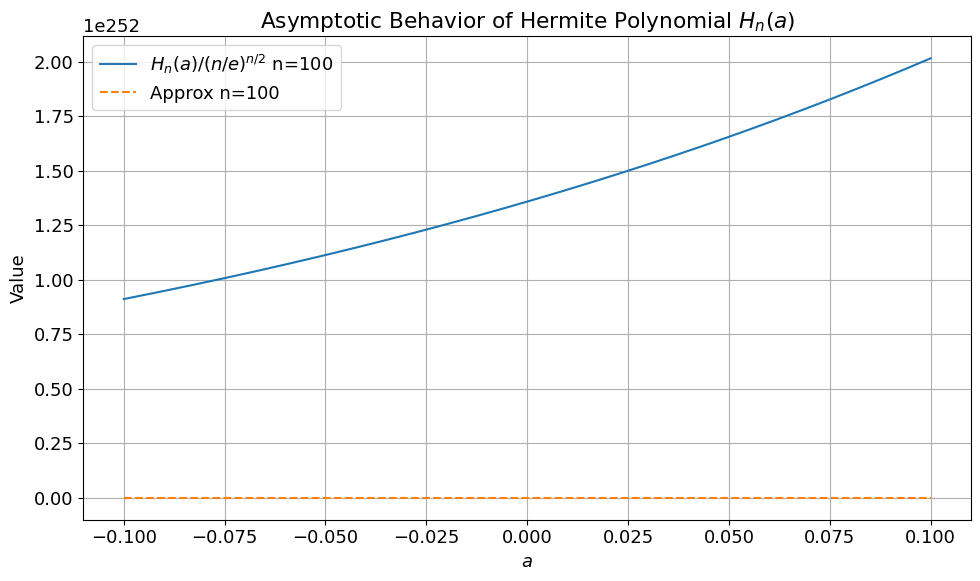

In [11]:

def my_plot_Airy(n=3):
  # Parameters
  #n = 40  # large n
  x_vals = np.linspace(-0.1,0.1, 400) #-np.sqrt(n)/2, np.sqrt(n)/2

  # LHS: H_n(a,1) = Hermite polynomial
  lhs = (
        my_hermite(n, 1.0 + x_vals/(2*n**(2/3)), t=1/(4*n))
  )
  # RHS: asymptotic expression
  rhs = (
      np.sqrt(2*np.pi)
      * (2/np.sqrt(np.e))**n
      * n**(1/6)
      * airy(x_vals)
  )

  # Normalize both sides for comparison
  lhs_norm = lhs
  rhs_norm = rhs

  # Plot
  plt.plot(x_vals, lhs_norm, label=f"$H_n(a)/(n/e)^{{n/2}}$ n={n}")
  plt.plot(x_vals, rhs_norm, label=f"Approx n={n}", linestyle='--')

plt.figure(figsize=(10, 6))
for n in [100]:
  my_plot_Airy(n)
plt.title(f"Asymptotic Behavior of Hermite Polynomial $H_{{n}}(a)$")
plt.xlabel("$a$")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Old LAtex stuff


	It remains to prove the fourth part of Theorem \ref{thm:main-asymptotics}. Fix $a\in\bR$. For ease of notation we define $I_n=\sqrt{2\pi} \fH_n(a,1)$. Then we get
	\begin{align*}
		I_n&=\int_{-\infty}^{\infty}(a+it)^n e^{-t^2/2}\,dt = \int_{\Gamma_a} e^{\Phi_{n,a}(z))} dz.
		\intertext{where $\Gamma_a = \set{z\in\bC\colon \re z=a}$ and}
		\Phi_{n,a}(z)&=n\ln z+\tfrac12(z-a)^2,
	\end{align*}




	The critical point equation $\Phi_{n,a}'(z)=0$ is equivalent to
	\begin{align}
		\label{eq:critCosAsymptotics}
		\frac{n}{z}+(z-a)=0 \Leftrightarrow \quad z^2 - az + n = 0,
	\end{align}
	with solutions
	\begin{align*}
		z_\pm=\frac{a}{2}\pm\frac{i}{2}\sqrt{4n - a^2}.
	\end{align*}


	\begin{lemma}
		For $\kappa<\frac12$ we have
		\begin{align}
			\label{eq:help-cos-asymptotics}
			I_n & = 2\,\re \ab{e^{\Phi_{n,a}(z_+) + i\alpha_+} \int_{-\infty}^\infty \exp\set{-\frac12t^2 \abs{\Phi_{n,a}''\rb{z_+}} }\, dt}\rb{1+O\rb{n^{-3\kappa}}}
		\end{align}
		where $\alpha_+=\frac{\pi-\phi_+}2$ and $\phi_+$ is the complex argument of $\Phi_{n,x}''(z_+)$.
	\end{lemma}

	\begin{proof}
		As for the `other' steepest decent: integrand exponentially small on the tails of $\Gamma_a$. Again Cauchy's theorem allows deforming to steepest-descent paths through the saddles of $\Phi_{n,a}$.

		More precisely, define $\phi_\pm = \arg \Phi_{n,a}''(z_\pm)\in [0,2\pi)$ and let $\alpha_\pm = \frac{\pi-\phi_\pm}2$. Note that this means that $e^{2i\alpha_\pm}\Phi_{n,a}''(z_\pm)$ is a negative real number, a fact we will rely on later.

		Using Cauchy's theorem, we can deform the contour of integration to a curve that looks locally like $z_\pm + te^{i\alpha_\pm}$ near the critical points. Let $\delta_n = n^{-\kappa}$, then $\gamma_\pm =\set{z_\pm + te^{i\alpha_\pm}\colon \abs{t}<\delta_n}$ are such curves.
		By the usual arguments,
		\begin{align*}
			I_n & = \ab{ \int_{\gamma_-} e^{\Phi_{n,x}(z)}\, dz + \int_{\gamma_+}e^{\Phi_{n,x}(z)}\, dz } \rb{1+O\rb{n^{-3\kappa}}}.
		\end{align*}
		Now the contributions at the two critical points are complex conjugates of each other (as above), so the two integrals sum up to twice the real part of one of them, say the one labelled `$+$'. Moreover, we have the Taylor expansion (for $z=z_+ + te^{i\alpha_+}$ i.e. $\abs{t}<\delta_n=n^{-\kappa}$)
		\begin{align*}
			\Phi(z) = \Phi_{n,x}(z_++te^{i\alpha_+}) & = \Phi_{n,x}(z_+) + \frac12 t^2 e^{2i\alpha_+}\Phi_{n,a}''\rb{z_+} + +O\rb{n^{-3\kappa}},
		\end{align*}
		and so, making the change of variable $z=z_++te^{i\alpha_+}$ and hence $dz=e^{i\alpha_+} dt$,
		\begin{align*}
			I_n & = 2\,\re \ab{ e^{\Phi_{n,a}(z_+)} e^{i\alpha_+} \int_{-\delta_n}^{\delta_n} \exp\set{-\frac12t^2 e^{2i\alpha+}\Phi_{n,x}''(z_+) }\,   dt }\rb{1+O\rb{n^{-3\kappa}}}.
		\end{align*}
		Recall that $e^{2i\alpha+}\Phi_{n,x}''(z_+)$ is a negative real, hence equals $-\abs{\Phi_{n,x}''(z_+)}$. Moreover, extending the integral from $(-\delta_n,\delta_n)$ to $(-\infty,\infty)$ gives only an exponentially small error.
		Thus we obtain the claimed expression.
	\end{proof}


	The integral in \eqref{eq:help-cos-asymptotics} is a Gaussian integral and therefore can be evaluated exactly: we obtain
	\begin{align*}
		I_n & = 2 e^{\re \Phi_{n,a}(z_+)}\,\cos\rb{\im \Phi_{n,a}(z_+)+\alpha_+} \sqrt{\frac{2\pi}{\abs{\Phi_{n,a}''(z_+)}}}\rb{1+O\rb{n^{-3k}}}
	\end{align*}


	Recall that by \eqref{eq:critCosAsymptotics}, $\frac n{z_+} =a-z_+$, so that
	\begin{align*}
		\Phi_{n,a}''\rb{z_+} & = 1-\frac{a-z_+}{z_+} = 2-\frac a{\frac{a}{2}+\frac{i}{2}\sqrt{4n - a^2}}\\
		% & = 2-\frac {2a}{a+i\sqrt{4n - a^2}}\\
		& = 2-\frac {2a\rb{a-i\sqrt{4n-a^2}}}{a^2+4n - a^2}\\
		& = 2-\frac {a^2-ia\sqrt{4n-a^2}}{2n}\\
		& = 2\rb{1-\frac{a^2}{4n}} + i\frac{a}{\sqrt{n}} \sqrt{1-\frac{a^2}{4n}}%\\
		% & = 2\rb{1-\frac{a^2}{4n}} + \frac{ia}{\sqrt n}  \rb{1+O(n)}
		%\frac {}{2n}
	\end{align*}
	Therefore,
	\begin{align*}
		\abs{ \Phi_{n,a}''\rb{z_+}}^2& = 4\rb{1-\frac{a^2}{4n}}^2 + \frac{a^2}{n}\rb{1-\frac{a^2}{4n}}
		%= \rb{1-\frac{a^2}{4n}}\rb{4-a^2+a^2}
		= 4\rb{1-\frac{a^2}{4n}}
		\intertext{and thus}
		\sqrt{\frac{2\pi}{\abs{\Phi_{n,x}''(z_+)}}}& = \sqrt{\pi} \rb{1-\frac {a^2}{4n}}^{-1/4}.
	\end{align*}
	Moreover, we get the following expansions for the real and imaginary parts of $\Phi_{n,a}$:
	\begin{align*}
		\re \Phi_{n,a}(z_+)&= \frac{n}{2}\,\ln n
		-\frac{n}{2}
		+\frac{a^2}{4}
		+O\rb{n^{-1}}, \quad\quad
		%\tfrac n2\ln n - \tfrac n2 + O(\ln n), \\
		\im\Phi_{n,a} (z_+)=\frac{n\pi}{2} -a\sqrt{n}  + O(n^{-1/2}),
	\end{align*}
	Hence ,
	\begin{align*}
		I_n & = 2 n^{n/2}\, e^{-n/2} e^{a^2/4} \cos\rb{\frac{n\pi}{2} -a\sqrt{n}+\alpha_++O\rb{n^{-1/2}} } \sqrt\pi \rb{1-\frac{a^2}{4n}}^{-1/4} \rb{1+O\rb{n^{-1/2}}}
		\\
		&= 2\sqrt\pi \, \rb{\frac ne}^{n/2}  e^{a^2/4} \cos\rb{\frac{n\pi}{2} -a\sqrt{n}  + \alpha_+} \rb{1-\frac{a^2}{4n}}^{-1/4} \rb{1+O\rb{n^{-1/2}}}
		% \\
		% &=\sqrt{2\pi}\,n^{n/2}e^{-n/2}\,2 e^{a^2/4}\cos\rb{a\sqrt{2n}-\tfrac{n\pi}{2}}\rb{1+O(n^{-1/2})}.
	\end{align*}
	Finally, what about $\alpha_+$? Recall that
	\begin{align*}
		\arg\Phi_{n,a}''(z_+)=\arctan\rb{-\frac{a}{\sqrt{4n-a}}} = -\frac a2\, n^{-1/2}+O\rb{n^{-3/2}},
	\end{align*}
	so we get:
	\begin{align*}
		\alpha_+ = \frac12\ab{\pi-\rb{-\frac a2\, n^{-1/2}+O\rb{n^{-3/2}}}}
		= \frac\pi2 + O\rb{n^{-1/2}},
	\end{align*}
	which completes the final expression:

	\begin{align*}
		H_n(a,1) \approx \sqrt 2 \rb{\frac{n}e}^{n/2} e^{a^2/4} \cos\rb{\frac{n\pi}{2} -a\sqrt{n}  + \frac\pi2+O\rb{n^{-1/2}}} \rb{1-\frac{a^2}{4n}}^{-1/4}
	\end{align*}

	\newpage


 v\documentclass[english,letterpaper]{article}

\usepackage{graphicx} % Required for inserting images

\usepackage{tikz}
\usepackage[T1]{fontenc}
\usepackage[latin9]{inputenc}
\usepackage{amsmath}
\usepackage{amsthm}
\usepackage{amssymb}
\usepackage{enumitem}

\global\long\def\re{\text{Re }}%
\global\long\def\im{\text{Im }}%
\global\long\def\arccosh{\text{arccosh}}%


\usepackage[margin=3cm]{geometry}

\usepackage[style=alphabetic]{biblatex}
\renewbibmacro{in:}{}

\DeclareFieldFormat[article,inbook,incollection,inproceedings,patent,thesis,unpublished]{title}{#1}

\addbibresource{biblio.bib}

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%Janosch's macro definitions%%%%%%%%%%%%%%
\newcommand{\ab}[1]{\left[ #1 \right]}
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\rb}[1]{\left( #1 \right)}
\newcommand{\set}[1]{\left\{ #1 \right\}}
\newcommand{\wt}[1]{\widetilde{#1}}

\newcommand{\one}{\mathbf{1}}

\renewcommand{\d}{\mathrm{d}}

\newcommand{\rh}{\rho}
\newcommand{\si}{\sigma}
\newcommand{\Si}{\Sigma}
\newcommand{\ps}{\psi}
\newcommand{\ph}{\phi}
\newcommand{\ld}{\ldots}
\newcommand{\given}{\vert}

\newcommand{\uind}[2]{{#1}^{(#2)}}
\newcommand{\eqdist}{\stackrel{(d)}{=}}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

\makeatletter
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Textclass specific LaTeX commands.
\theoremstyle{definition}
\newtheorem*{defn*}{\protect\definitionname}
\theoremstyle{remark}
\newtheorem*{rem*}{\protect\remarkname}
\theoremstyle{plain}
\newtheorem*{thm*}{\protect\theoremname}
\theoremstyle{plain}
\newtheorem*{prop*}{\protect\propositionname}


\theoremstyle{plain} % Bold title, italic body
\newtheorem{theorem}{Theorem}[section]
\theoremstyle{definition} % Bold title, normal body
\newtheorem{definition}[theorem]{Definition}
\newtheorem{example}[theorem]{Example}
\newtheorem{proposition}[theorem]{Proposition}
\theoremstyle{remark} % Italic title, normal body
\newtheorem{remark}[theorem]{Remark}
\newtheorem{lemma}[theorem]{Lemma}
\newtheorem{corollary}[theorem]{Corollary}

\makeatother

\usepackage{babel}
\usepackage{csquotes}
\providecommand{\definitionname}{Definition}
\providecommand{\propositionname}{Proposition}
\providecommand{\remarkname}{Remark}
\providecommand{\theoremname}{Theorem}


\title{A Gaussian integral formula for the Hermite polynomials: Combinatorics, Asymptotics and Applications}
\author{ }
\date{February 2025}

\newcommand{\De}{\Delta}
\newcommand{\de}{\delta}
\newcommand{\ep}{\epsilon}

\newcommand{\bC}{\mathbb{C}}
\newcommand{\bE}{\mathbb{E}}
\newcommand{\bN}{\mathbb{N}}
\newcommand{\bP}{\mathbb{P}}
\newcommand{\p}{\mathbb{P}}

\newcommand{\bR}{\mathbb{R}}
\newcommand{\bZ}{\mathbb{Z}}

\newcommand{\cA}{\mathcal{A}}
\newcommand{\cB}{\mathcal{B}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cE}{\mathcal{E}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\cH}{\mathcal{H}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cJ}{\mathcal{J}}
\newcommand{\cK}{\mathcal{K}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cP}{\mathcal{P}}
\newcommand{\cQ}{\mathcal{Q}}
\newcommand{\cR}{\mathcal{R}}
\newcommand{\cS}{\mathcal{S}}
\newcommand{\cT}{\mathcal{T}}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cV}{\mathcal{V}}
\newcommand{\cW}{\mathcal{W}}
\newcommand{\cX}{\mathcal{X}}
\newcommand{\cY}{\mathcal{Y}}
\newcommand{\cZ}{\mathcal{Z}}

\newcommand{\fH}{H\!\!\operatorname{e}} %\mathfrak{H}}
\newcommand{\A}{A\!\operatorname{i}}

\newcommand{\vp}{\varphi}
\newcommand{\AiryCurve}{\langle}
\newcommand{\RotatedAiryCurve}{\wedge}

\newcommand{\mg}[2]{M^{(#1)}_{#2}}
\newcommand{\half}{\frac{1}{2}}

\begin{document}




	\maketitle

    \tableofcontents

	%Intro ideas

    \section{Introduction}

    The Hermite polynomials play an important role in XYZ. The two traditional ways to access the Hermite polynomials are the derivative formula and the recurrence relation. However, these are sometimes inconvenient (examples?).

    In this article, we present a Gaussian integral formula for the Hermite polynomials and showcase its use.

	This lets us do:
	1. Multivariable generalization
	2. Combinatorial expansion using Wick's/Isserlis's theorem
	3. Easy asymptotics using steepest descent
	- We also showcase some applications.

    \subsection{Multivariate Definition}

	Let $V\in\bR^{d\times d}$ be a covariance matrix and let $\vec{n}\in\bZ_{\geq0}^{d}.$
	Then the $\vec{n}$-indexed multi-dimensional Hermite polynomial associated
	to $V$ is the function $H(\cdot,V)\colon\bR^{d}\longrightarrow\bR$ ...

	Generalities about multivariate Hermite polynomials. $H_{\vec{n}}(x,V)$ where $V$ is a $d\times d$ covariance matrix.

	In one dimension, when the single entry of the matrix $V$ is $t$, we will write $H_n(x,t)$ and $\wt H_n(x,t)$ for $H_n(x,V)$ and $\wt H_n(x,V)$ respectively.


	In the focus lies the following formula for the Hermite polynomials taken from \cite{Withers2000}:

	\begin{align}
		\label{eq:HExpectation}
		H_{\vec{n}}\left(x,V\right) & =\bE_{Z\sim N(0,V^{-1})}\left[\left(V^{-1} x+iZ\right)^{\vec{n}}\right]:=\bE_{Z\sim N(0,V^{-1})}\left[\prod_{j=1}^{d}\left((V^{-1}x)_{j}+iZ_{j}\right)^{n_{j}}\right].
	\end{align}


	\begin{remark}
		Since $Z\eqdist -Z$ holds for the centred Gaussian random variable $Z$, we can equivalently write
		\begin{align}
			\label{eq:HExpectationMinus}
			H_{\vec{n}}\left(x,V\right) & =\bE_{Z\sim N(0,V^{-1})}\left[\left(V^{-1} x-iZ\right)^{\vec{n}}\right].
		\end{align}
	\end{remark}


	\begin{remark}
		Note that the covariance matrix of $Z$ is $V^{-1}$ and \textbf{not} $V$. This is consistent with \cite{Withers2000}, see formula (1.4) there. This seems to reflect the convention in the literature. The one exception to this is \cite{Sobel-tech-1963}, where they write $H^\ast$ for our $H$ and our $\tilde{H}$ is their $H$.
		In general, the differentiation formula is easier for $H$, expectation formula easier for $\wt H$.
	\end{remark}

	We  also define the dual polynomials $\wt H_{\vec n}(\cdot, V)$ by
	\begin{align}
		\label{eq:DualPolyExpectation}
		\wt H_{\vec n}(x, V) = H_{\vec n}\rb{V^{-1}x, V^{-1}}= \bE_{X\sim N(0,V)}\ab{\rb{x+iX}^{\vec n}}.
	\end{align}

	\begin{remark}
		In the special case where $V=tI_d$, we have
		\begin{align}
			H_{\vec n}(x,V) & = \bE\ab{\rb{V^{-1}x+iZ}^{\vec{n}}} = \bE\ab{\rb{\frac{x}{t}+i\frac{X}{\sqrt{t}}}^{\vec{n}}} = t^{-\abs{\vec{n}}} \wt{H}_{\vec{n}}(x,V).
		\end{align}
		Specialising even further, in one dimension:
        \begin{align*}
            H_n(x,t) = t^{-n} \wt H_n(x,t).
        \end{align*}
        We also have the time-space scaling
		\begin{align}
			\label{eq:time-space-scaling-1d}
			\wt H_n(x,t) = t^{n/2} \wt H_n\rb{\frac x{\sqrt{t}},1},\hspace{2cm} %
			H_n(x,t) = t^{-n/2} H_n\rb{\frac x{\sqrt{t}},1}
		\end{align}
	\end{remark}

	\textbf{TODO: we need to go through everything below and make sure we use the right definition for $H$ and $\wt H$.}


	\begin{remark}
		\label{rmk:single-variable-hermite}
		Sometimes the Hermite polynomials are defined in terms of a single (one-dimensional) variable $x$, such as $\mathfrak H_n(x)$ in \cite{AGZ}. There is a further distinction between the \emph{probabilists'} and \emph{physicists'} Hermite polynomials, see for example \cite{AbramowitzStegun}, Chapter 22, where the notation $He_n(x)$ and $H_n(x)$ is used for the probabilist and physicist convention respectively.        We have the following relations:
		% see tablet notes 2025-04-30
		\begin{align*}
			\mathfrak{H}_n (x) & = He_n(x) = H_n(x,1) = \wt H_n(x,1) \\
			H_n(x) & = 2^n \wt H_n \rb{x,\frac12} = H_n\rb{x,\frac12}.
		\end{align*}
	\end{remark}
	% We also define $\tilde{H(\cdot,}V)$ by

	% \[
	% \widetilde{H}_{\vec{n}}(x,V)=H_{\vec{n}}(V^{-1}x,V^{-1}).
	% \]

    \subsection{Notation and Examples}


\section{Combinatorics}

The Wick formula (aka Isserlis's theorem) gives a combinatorial meaning to the expected value of Gaussian polynomials. Using this, the Gaussian integral formula for the Hermite polynomials can be interpreted in a combinatorial understanding. We present this here and use this to provide a combinatorial proof of the Orthogonality.

References: \cite{HermiteCombinatorics, PolynomialCombinatorics}. These authors identify the combinatorics for the 1D Hermite polynomials but not the connection to the Gaussian identity.

\begin{proposition}
Statement of Wick formula/Isserlis theorem.
\end{proposition}

\begin{proposition}
Combinatorics of the Gaussian integral formula
\end{proposition}

\begin{example}
Some examples of diagrams here.
\end{example}


	\begin{remark}
		It is not immediately obvious from \eqref{eq:HExpectation} that $H_{\vec{n}}(x,V)\in\bR$
		for all $x\in\bR^{d}.$ One can see this by noting that the expansion
		of the right-hand side of the definition of $H_{\vec{n}}\left(x,V\right)$
		contains imaginary parts only if the associated power of at least
		one $Z_{j}$ is odd. But these terms have expectation zero since $Z$
		is a mean-zero Gaussian vector.
	\end{remark}


	\begin{remark}
		With this definition, by the Wick theorem,
		\[
		H_{\vec{n}}(x;V)=\sum_{A^{(k)}\in\{x,iZ\},\pi\in\cP_{\abs{\vec{n}}}^{(2)}}\prod_{(r,s)\in\pi}\bE\left[C_{r}C_{s}\right]
		\]
		\textbf{TODO:} finish this remark -- what are the $C_r$, note the new definition of $H$.
	\end{remark}

    \subsection{Combinatorial Proof of Orthogonality}

	\textbf{TODO:} add computation of $H_{\vec n}$ for some small values of $\vec n$.

	In this section, we prove the orthogonality (Theorem \ref{thm:og}) and recursive (Proposition \ref{prop:recursive}) properties of the Hermite polynomials from \eqref{eq:HExpectation}.

	\begin{theorem}
		\label{thm:og}
		Let $X$ be a centred Gaussian random variable with covariance matrix $V$. For any $\vec{m},\vec{n}\in\bZ_{\geq0}^{d}$,
		\begin{align*}
			\bE\left[H_{\vec{n}}(X,V)\widetilde{H}_{\vec{m}}(X,V)\right]=\delta_{\vec{m}=\vec{n}}\,\vec{n}!\,=\,\de_{\vec{m}=\vec{n}}\prod_{j=1}^{d}n_{j}!,
		\end{align*}
	\end{theorem}

	Before we state the proof, we introduce a combinatorial object. \textbf{TODO: copy from below and add pictures. Also go through proof and correct the $X$ and $V$ etc. notation -- everything is fine because of the duality but we need to write it down properly}.

	\begin{proof}
		Write $\widetilde{X}=V^{-1}(X)$ and observe that $\widetilde{X}\sim N\left(0,V^{-1}\right).$
		Also write $n=\abs{\vec{n}}$ and $m=\abs{\vec{m}}$ . Let $k_{1},...,k_{n}$
		be defined as follows: $k_{1}=\ldots=k_{n_{1}}=1$, $k_{n_{1}+1}=\ldots,k_{n_{1}+n_{2}}=2$
		and so on. For example, if $\vec{n}=(2,3,0,2,\ldots)$, then $k$
		is the sequence 1,1,2,2,2,4,4,$\ldots$ Similarly define $\ell_{1},\ldots,\ell_{m}$
		in terms of $\vec{m}.$

		Then,
		\begin{align*}
			\bE\left[H_{\vec{n}}(X,V)\widetilde{H}_{\vec{m}}(X,V)\right] & =\bE%_{X,Y,Z\sim N(0,V)}
			\left[\prod_{j=1}^{d}\left(X_{j}+iZ_{j}\right)^{n_{j}}\prod_{j=1}^{d}\left(X_{j}+iY_{j}\right)^{n_{j}}\right]\\
			& =\bE%_{X,Y,Z\sim (0,V)}
			\left[\left(X_{k_{1}}+iZ_{k_{1}}\right)\ldots\left(X_{k_{n}}+iZ_{k_{n}}\right)\left(\widetilde{X}_{\ell_{1}}+iY_{\ell_{1}}\right)\ldots\left(\widetilde{X}_{\ell_{m}}+iY_{\ell_{m}}\right)\right]\\
			& =\sum_{A^{(k)}\in\left\{ X,iZ\right\} ,B^{(\ell)}\in\left\{ \tilde{X},iY\right\} }\bE%_{X,Y,Z\sim N(0,V)}
			\left[A_{k_{1}}^{(1)}\ldots A_{k_{n}}^{(n)}B_{\ell_{1}}^{(1)}\ldots B_{\ell_{m}}^{(m)}\right]\\
			& =\sum_{A^{(k)}\in\left\{ X,iZ\right\} ,B^{(\ell)}\in\left\{ \tilde{X},iY\right\} }\sum_{\pi\in\cP_{m+n}}\prod_{(r,s)\in\pi}\bE\left[C_{r}C_{s}\right],
		\end{align*}
		where the last line follows from the Wick theorem and where $X,Y,Z$
		are independent. Moreover, $\cP_{m+n}^{(2)}$denotes the pair partitions
		of the index set $\{1,...,m+n\}$ and we have further defined
		\begin{align}
			C_{r} & =\begin{cases}
				A_{k_{r}}^{(r)} & \text{{if} }r\leq n\\
				B_{\ell_{r-n}}^{(r-n)} & \text{{if} }k>n.
			\end{cases}\label{eq:CfromAB}
		\end{align}
		Define a \textbf{diagram} to be a triple $\delta=(A,B,\pi)\in\{X,iZ\}^{n}\times\{\tilde{X},iY\}^{m}\times\cP_{n+m}^{(2)}$
		and let $\ep(\de)=\prod_{(r,s)\in\pi}\bE\left[C_{r}C_{s}\right]$
		(with $C$ defined in terms of the $A,$ $B$ as in (\ref{eq:CfromAB})).
		Let $\Delta$ be the set of diagrams $\delta=(A,B,\pi)=(C,\pi)$ such
		that $C_{r}$ and $C_{s}$ are the same ``type of variable'' for
		all $(r,s)\in\pi$. That is, each pair in the pair partition $\pi$
		is of the form $XX,$ $\widetilde{X}\widetilde{X}$,$X\widetilde{X},$
		$iYiY$ or $iZiZ$. Clearly, by the independence of $X,Y,Z$, we have
		$\ep(\delta)=0$ for any diagram $\delta$ such that $\delta\notin\Delta$.

		Next, define an involution $\phi\colon\Delta\longrightarrow\Delta$
		as follows: if $r\leq n<s$ for every $(r,s)\in\pi$ then $\phi(\delta)=\delta$.
		Otherwise, choose $(r,s)\in\pi$ such that $r,s\leq n$ and so that
		$r$ is the smallest among such pairs. Then $\phi(\de)$ is defined
		by 'switching' $A_{k_{r}}^{(r)}$ and $A_{k_{s}}^{(s)}:$ if they
		were $X$ before they are now $iZ$ and vice versa. Then $\ep(\phi(\de))=-\ep(\de)$.
		Thus, it follows that the terms $\ep(\de)$ with $\phi(\de)\ne\de$
		cancel out and we only need to consider the sum over $\De_{1}=\left\{ \de\in\De\colon\phi(\de)=\de\right\} $.
		For $(A,B,\pi)\in\De_{1}$ the pair partition $\pi$ always matches
		elements of $\left\{1,\ldots,n\right\} $with elements of $\left\{ n+1,...,n+m\right\}$.
		In particular, by the pigeonhole principle $\De_{1}=\varnothing$
		if $m\neq n.$ Thus we already have $\bE\left[H_{\vec{n}}(X,V)\widetilde{H}_{\vec{m}}(X,V)\right]=0$
		whenever $\abs{\vec{m}}\ne\abs{\vec{n}}.$

		If $\abs{\vec{m}}=\abs{\vec{n}}=n$, we can index the pair partitions
		$\pi$ in $\De_{1}$ by elements $\sigma$ of the symmetric group
		$S_{n}$ via $\sigma(r)=s-n$ whenever $(r,s)\in\pi$. Moreover, whenever
		$C^{(r)}$ is $iZ$ or if $C^{(s)}$ is $iY$ then $\bE C^{(r)}C^{(s)}=0$
		by independence, and so $\ep(\de)=0$. Thus, we only need to consider
		diagrams where $C^{(r)}$ is $X$ and $C^{(s)}$ is $\widetilde{X}$:
		\begin{align*}
			\bE\left[H_{\vec{n}}(X,V)\widetilde{H}_{\vec{m}}(X,V)\right] & =\sum_{\sigma\in S_{n}}\prod_{j=1}^{n}\bE\left[X_{k_{j}}\widetilde{X}_{\ell_{\sigma(j)}}\right]=\sum_{\sigma\in S_{n}}\prod_{j=1}^{n}\bE\left[X_{k_{j}}\left(V^{-1}X\right)_{\ell_{\sigma(j)}}\right]\\
			& =\sum_{\sigma\in S_{n}}\prod_{j=1}^{n}\left(\bE\left[X\left(V^{-1}X\right)^{T}\right]\right)_{k_{j},\ell_{\sigma(j)}}.
		\end{align*}

		Now $V$ is a covariance matrix and hence symmetric. Therefore so
		is $V^{-1}$and we get $X(V^{-1}X)^{T}=XX^{T}V^{-1}.$ By linearity
		of expectation,

		\begin{align*}
			\bE\left[X\left(V^{-1}X\right)^{T}\right] & =\bE\left[XX^{T}\right]V^{-1}=VV^{-1}=I.\\
		\end{align*}
		In other words, $\bE\left[X_{k_{j}}\left(V^{-1}X\right)_{\ell_{\sigma(j)}}\right]=\delta_{k_{j},\ell_{\sigma(j)}}$and
		so

		\begin{align*}
			\bE\left[H_{\vec{n}}(X,V)\widetilde{H}_{\vec{m}}(X,V)\right] & =\sum_{\sigma\in S_{n}}\prod_{j=1}^{n}\delta_{k_{j},\ell_{\sigma(j)}}.\\
		\end{align*}
		Since the $k_{j}$and $\ell_{j}$ are ordered increasingly, there
		can only be a non-zero term if $\vec{m}=\vec{n}.$ If so, then for
		each $n_{j}$, there are $n_{j}!$ ways or rearranging, which gives
		the result.
	\end{proof}



	\subsection{Combinatorial proof of reccurance relation}


	\begin{proposition}
		\label{prop:recursive}
		For any $\vec{n}\in\bN^d$, $j\in [d]$ and $x\in\bR^d$,
		\begin{align*}
			H_{\vec{n}+\vec{e}_{j}}(x)=x_{i}H_{\vec{n}}(x)-n_j H_{\vec{n}-e_j}(x)
		\end{align*}
	\end{proposition}
	\begin{proof}
		Recall the interpretation of matchings on $\{1,\ldots,n+1\}$. The node
		$n+1$ is either connected to nothing, which gives a factor of $x$
		and the remaining ones are $He_{n}$, or it is involved in a pair,
		which there are $n$ ways to decide its partner, gives a contribution
		of $-1$ and leaves $He_{n-1}(x)$ from the rest.
	\end{proof}


	\textbf{TODO:} can we state \& prove a version of the following result in higher dimensions? \textbf{and/or} use our formula \eqref{eq:HExpectation}
	to prove it without requiring the answer/induction?

	\begin{proposition}
		For any $x\in\bR$
		\[
		\sum_{k=0}^{n}\frac{1}{k!}He_{k}(x)He_{k}(y)=\frac{1}{n!}\frac{He_{n+1}(x)He_{n}(y)-He_{n}(x)He_{n+1}(y)}{x-y}
		\]
	\end{proposition}
	\begin{proof}
		Applying Proposition \ref{prop:recursive},
		\[
		He_{n+1}(x)He_{n}(y)=xHe_{n}(x)He_{n}(y)-nHe_{n-1}(x)He_{n}(y)
		\]
		and moreover
		\begin{align*}
			H_{n}(x)H_{n+1}(y)=yH_{n}(x)H_{n}(y)-nH_{n}(x)H_{n-1}(y)
		\end{align*}
		Subtracting these two equations gives:
		\begin{eqnarray*}
			He_{n+1}(x)He_{n}(y)-He_{n}(x)He_{n+1}(y) & = & (x-y)He_{n}(x)He_{n}(y)\\
			&  & -n\left(He_{n-1}(x)He_{n}(y)-He_{n}(x)He_{n-1}(y)\right)
		\end{eqnarray*}

		Hence:
		\begin{align*}
			\frac{1}{n!}\frac{He_{n+1}(x)He_{n}(y)-He_{n}(x)He_{n+1}(y)}{x-y} & =  \frac{He_{n}(x)He_{n}(y)}{n!}\\
			&\quad +\frac{1}{(n-1)!}\frac{He_{n}(x)He_{n-1}(y)-He_{n-1}(x)He_{n}(y)}{x-y},
		\end{align*}
		and the proof follows by induction.
	\end{proof}

    \subsection{Application: Expected Characteristic Function of the GUE}

    An application of the combinatorial formula is to provide a direct proof that the expected characteristic function of the GUE is precisly the Hermite polynomial. Other proofs of this fact often go by induction using the recurssive formula for determinants and for Hermite polynomials.

    \begin{proposition}
Let $M_n$ be the GUE matrix with $N(0,1)$ entries on the diagonal and $N(0,\half) + i N(0,\half)$ entries off the diagonal. Then:
    
    $$\det[\sqrt{t}M_n - xId_{n}]= \fH_{n}(x,t)$$
    
    \end{proposition}

[Notes: The expected value of the characteristic function when the entries have variance $t$ is exactly equal to the $H_n(x,t)$. Can show this by the permutation expansion for the determinant: the only non-zero terms in the determinant are precicly the permuntations that have only 2 cycles and fixed points (1 cycles), which have the same combinatorics as we showed previously.]
    





\section{Asymptotics for the one-dimensional Hermite polynomials}

	The Gaussian integral formula \eqref{eq:HExpectation} also yields an easy entry point to  the large-$n$ asymptotics of the Hermite polynomials. In contrast to other approaches, the integral formula is naturally ready for the Laplace approrimxation of integrals. Many other approaches use the derivative formula for the Hermite polynomials instead and then must use the Cauchy integral formula and residue analysis to the turn the derivative into a complex integral e.g. Section 3 of \cite{AGZ} and (\textbf{TODO: give a reference to the Wikipedia asymptotics}). As an added bonus to our method, the asymptotic formula does not involve the factorial $n!$ like many other ones do, which gives clean asymptotics without having to use Stirling's formula.
    
    \subsection{ The Laplace Expansion Method}
    \begin{proposition}\label{prop:laplace} [Laplace Approximation] Suppose $g(x)$ is a continuous function, and suppose $f(x)$ is a function with a unique global maximum at $x^\ast$ with zero-derivative there, $f'(x^\ast)=0$, and strictly negative second derivative there $f''(x^\ast) < 0$. Suppose also $x^\ast \in (a,b)$ is some interval containing $x^\ast$ as an interior point. Then, under certain regularity conditions on $f$ (see e.g. Theorem 3.5.3 from \cite{AGZ} for a precise statement), we have the following Laplace approximation of the integral as $n\to \infty$,
    $$\intop_{a}^b e^{n f(x)} g(x) \d x  = e^{n f(x^\ast) } g(x^\ast) \sqrt{\frac{2\pi }{n |f''(x^\ast)|}} (1+o(1)).$$
    \end{proposition}
    \begin{remark}
The proof idea of the Laplace approximation can be more powerful than the mere statement of the result, so we briefly elucidate it here.  The idea is to approximate $f$ around its global maximum by Taylor's theorem $f(x) = f(x^\ast) - \frac{1}{2} |f''(x^\ast)|(x-x^\ast)^2 + \epsilon_2 \rb{x-x^\ast}$, and then do a change of variables $\frac{s}{\sqrt{n}}= x-x^\ast $, so that  $$\intop_{x^\ast-c/\sqrt{n}}^{x^\ast+c/\sqrt{n}} e^{nf(x)} \d x = e^{nf(x^\ast)}\intop_{-c}^{c} e^{ \half f''(x^\ast)s^2 + n \epsilon\rb{\frac{s}{\sqrt{n}}}} \frac{\d s}{\sqrt{n}}. $$
Then, by using the technical regularity conditions of the function $f$, one argues that $n \epsilon_2(\frac{s}{\sqrt{n}})$ goes to zero fast enough to be negligable (For example, if $f$ has bounded third derivative, one has $\epsilon_2(y)=O(y^3)$ and $n \epsilon_2(\frac{s}{\sqrt{n}})$ goes to zero like $\frac{1}{\sqrt{n}}$ ) , whence what remains is the Gaussian integral $\intop e^{ -\frac{1}{2} |f''(x^\ast)| s^2} \d s = \sqrt{ \frac{2\pi}{|f''(x^\ast)|}}$. To complete the argument, one also needs to argue that the integral outside of this neighbourhood of $x^\ast$ is exponentially smaller than $e^{n f(x^\ast)}$ and use continuity of $g$ to bring $g(x)$ along for the ride. This idea illustrates a few important concepts we will use later:
\begin{enumerate}
    \item More precise error estimates can be obtained by being more careful with the Taylor series expansion of $f$ or by expanding to higher order. We limit ourselves to proving to $1+o(1)$ for ease of readability here.
    \item The dominant contribution comes from a window of on the scale $\frac{1}{\sqrt{n}}$ near the maximizer $x^\ast$. Keeping this in mind allows one to apply it to more complicated domains of integration. For example, if the endpoint of the interval of integration coincides with the maximizer, $a=x^\ast$, the approximation will still apply with a factor of $\frac{1}{2}$. It also applies for contour integrals on curves in $\mathbb{C}$ in the same way by zooming in around the maximizer $x^\ast$ because every curve is approximately a tangent line when zoomed in. We will see precisely this idea of applying the Laplace approximation to contour integrals going through a local maximum in Section \ref{subsec:three-scaling}.  
    \item For maximizers $x^\ast$ which have $f''(x^\ast)=0$ (aka a "double critical point"), the Laplace approximation idea can still be used by now expanding to 3rd order in the Taylor series expansion $f(x) = f(x^\ast) - \frac{1}{6} f'''(x^\ast)(x-x^\ast)^3 + \epsilon_3 \rb{x-x^\ast}$ and making a change of variable $\frac{s}{n^{1/3}} = x-x^\ast$ instead. This is precisely what will occur in Section \ref{subsec:edge-scaling} and morally explains the factors of $n^{1/3}$ that appear in these edge scalings.
\end{enumerate}

\end{remark}    \begin{example}
    The Laplace expansion can be used to derive a version of Stirling's formula for approximating $n!$. We begin by writing the $n!$ as the infamous Gamma function integral    $$n! = \intop_0^\infty x^n e^{-x} \d x = n^{n+1} \intop_0^\infty y^n e^{-ny} \d y = n^{n+1} \intop_0^\infty e^{n (\ln y - y)} \d y, $$
where we have used a change of variables $x = n y$ so that the maximizer to the integral occurs at the fixed value $y^\ast = 1$ (as opposed to the maximum $x^\ast =n$  growing with $n$). The function $f(x) = \ln y - y$ satisfies our criteria with the maximum at $y^\ast = 1$, $f(y^\ast)=-1$, $f''(y^\ast)=-1$ and so we obtain:
    $$n! = n^{n+1} \intop_0^\infty e^{n (\ln y - y)} \d y = n^{n+1} e^{n (-1)} \sqrt{\frac{2\pi}{n \cdot  1}} (1+o(1)) = \sqrt{2\pi n}\left(\frac{n}{e}\right)^n (1+o(1))   $$\end{example}

\subsection[Asymptotics of He(x) when x=O(1)]{Asymptotics of $\fH_n(x)$ when $x=O(1)$ }

\begin{proposition}
\label{prop:unscaled}
For $x \in \bR$ fixed, we have the following asymptotics as $n\to \infty$
			\begin{align*}
				\fH_n(x)&=\sqrt2 \, \rb{\frac ne}^{n/2}\,  e^{x^2/4} \cos\rb{\frac{n\pi}{2} -x\sqrt{n} }\rb{1+o\rb{1}}.
			\end{align*}
\end{proposition}
\begin{remark}
The estimate in Proposition \ref{prop:unscaled} is only accurate when $x \ll 2\sqrt{n}$. (But of course, for any fixed $x$, this happens eventually for large enough $n$). See Figure \ref{fig:unscaled}. The osciallations of the Hermite polynomial become out of sync with the approximation when $x/\sqrt{n}$  becomes large, and for $x>2\sqrt{n}$, the Hermite polynomial $\fH$ has no oscillations at all! See Section \ref{subsection:three-scaling} for how to correct the oscillations, and why there is a qualitative difference at $x=2\sqrt{n}$.  The approximations in those sections are generally more accurate (although they require more work!).
\end{remark}
\begin{figure} \label{fig:unscaled}
    \centering
    \includegraphics[width=0.75\linewidth]{figures/unscaled-asymptotics.png}
    \caption{The $x=O(1)$ asymptotics from Proposition \ref{prop:unscaled} shown on a modified log scale. The approximation is very accurate for $x \ll 2\sqrt{n}$, but the oscillations become out of sync with the Hermite polynomials as $x/\sqrt{n}$ grows and becomes completely wrong when $x/\sqrt{n} > 2$ where the Hermite polynomial has no zeros. See the $x=O(\sqrt{n})$ asymptotics in Section \ref{sec:three-scaling} to understand how to correctly approximate in these regions. }
\end{figure}

\begin{proof}
Starting with the integral formula \eqref{eq:HExpectation}, we proceed as follows:
\begin{align*}
\fH_{n}(x)& =\frac{1}{\sqrt{2\pi}} \intop_{-\infty}^{\infty}(x+it)^{n}e^{-t^{2}/2}\d t =\frac{2}{\sqrt{2\pi}}\Re\left\{ \intop_{0}^{\infty}(x+it)^{n}e^{-t^{2}/2}\d t\right\} \\
 & =\frac{2}{\sqrt{2\pi}}\Re\left\{ \intop_{\Re(z)=x,\Im(z)>0}e^{n\ln(z)+\half(z-x)^{2}}\frac{\d z}{i}\right\} \\ & =\frac{2}{\sqrt{2\pi}}\Re\left\{ \intop_{\Re(z)=0,\Im(z)>0}e^{n\ln(z)+\half(z-x)^{2}}\frac{\d z}{i}\right\},
\end{align*}
where we have thought of this as a line integral in $\mathbb{C}$ and moved the contour over to the positive imaginary axis  $\Re(z)=0$. This can be justified by Cauchy's theorem and the exponential decay of the integrand near infinity. Note that the contribution to the integral is dominated by the locations $z$
where $n\ln(z)+\half(z-x)^{2}$ is maximum along this contour. Taking a derivative, we see this happens when $z=i\sqrt{n}+o(\sqrt{n})$, which gives us the idea to change variables by a factor of $\sqrt{n}$ so that this location of maximum contribution is moved to an O(1) location as $n$ grows. Specifically, let us change to a real variable $x \in (0,\infty)$ so that $z=i\sqrt{n}x$. We have:
\[
z=i\sqrt{n}s,\quad \frac{\d z}{i}=\sqrt{n}\d s, \quad \ln(z)=\ln(\sqrt{n})+\ln(s)+i\frac{\pi}{2}
\]
 and expanding out gives
\[
\frac{1}{2}(z-x)^{2}=\half(i\sqrt{n}s-x)^{2}=-\half ns^{2}+\half x^{2}-i\sqrt{n}sx
\]
so we remain with:
\begin{align*}
\fH_n(x) & =\frac{2}{\sqrt{2\pi}}\Re\left\{ \intop_{0}^{\infty}e^{n\ln\sqrt{n}}e^{n\ln s}e^{ni\frac{\pi}{2}}e^{-\half ns^{2}}e^{\half x^{2}}e^{-i\sqrt{n}sx}\sqrt{n}\d s\right\} \\
 & =\frac{2}{\sqrt{2\pi}} \sqrt{n}e^{n\ln\sqrt{n}}e^{\half x^{2}}\intop_{0}^{\infty}e^{n\left(\ln s-\half s^{2}\right)}\cos\left(n\frac{\pi}{2}-\sqrt{n}sx\right)\d s
\end{align*}
Now by the Laplace approximation \ref{prop:laplace} , the contribution to the integral is coming from the maximizer of $f(s)=\ln s-\half s^{2,}$ which has $f'(s)=\frac{1}{s}-s$ and $f''(s)=-\frac{1}{s^{2}}-1$, and a global maximum at $s^\ast=1$ with $f(1)=-\half$, $f''(1)=-2$, yielding:
\begin{align*}
\fH_n(x) & = \frac{2}{\sqrt{2\pi}} \sqrt{n}e^{n\ln\sqrt{n}}e^{\half x^{2}}\left(e^{nf(1)}\sqrt{\frac{2\pi}{n\abs{f^{''}(1)}}}\right)\cos\left(n\frac{\pi}{2}-\sqrt{n}\cdot1\cdot x\right)(1+o(1))\\
 & =\frac{2}{\sqrt{2\pi}} \sqrt{n} e^{n\ln\sqrt{n}}e^{\half x^{2}}\left(e^{-n\half}\sqrt{\frac{2\pi}{2 n}}\right)\cos\left(n\frac{\pi}{2}-\sqrt{n} x \right)(1+o(1)),
\end{align*}
from which the result follows after simplifying.
\end{proof}

\subsection{Three regimes for asymptotic for $\fH_n(x)$ when scaled like $x = O(\sqrt{n})$}

It is natural to obtain asymptotics for $\fH_n(x)$ when $x$ grows with $n$, often scaled like $x = c \sqrt{n}$ for some constant $c$.  These are sometimes called the Plancherel--Rotach asymptotics for the Hermite polynomials see e.g. \cite{Szego1975}. Doing so leads to three asymptotic regimes depending on the value of $\lim_{n\to \infty} x/\sqrt{n}$, each of which is governed by a qualitatively different behaviour.
\begin{itemize}
    \item \textbf{Small $x$ values $-2\sqrt{n} < x < 2\sqrt{n}$:} In this regime, the Hermite polynomials are oscilatting, and a behaive very similar to the unscaled asympttoics of Proposition \ref{prop:unscaled} with small modifications to the phase and amplitute.  The Hermite polynomials in this region are also intimately connected to the arcsine law and the semi-circle law in this region, see Subsection \ref{sec:arcsine} and \ref{sec:semicircle}
    \item \textbf{Large $x$ values $|x| > 2\sqrt{n}$}: In this regime the polynomial has no more oscillatio and is instead monotone with an exponetial-like behaviour.
    \item \textbf{Values near the edge $x=2\sqrt{n}+O(n^{1/6})$:} In this regime right on the edge between the small and large behaviours, the asymptoics are approximated by the Airy function. This interpolates bettween the osciallatory small-$x$ regime and exponenbtial large-$x$ regimes (corresponding to the oscillations of the Airy function $\A(x)$  for $x<0$ and exponential behaiviour for $x>0$). This regime is important to the KPZ universality class and gives rise to the so-called Airy kernel, for example controlling flucutations of the largest eigenvalue of certani random matrices, see Section \ref{sec:random-matrices} .
\end{itemize}

Mathematically, these three regimes arise from a certain quadratic equation in our integral formula  having either two distinct real roots (the small $x$ regime), a single repeated root (the values near the edge regime) or two complex conjugate roots (the large $x$ regime).

\begin{figure}
    \centering
    \includegraphics[width=0.4\linewidth]{figures/3_asymptotics.png}
    \includegraphics[width=0.4\linewidth]{figures/3_formulas_zoomed.png}
        \caption{The three asymptotic formulas, and the zoomed in version. Each is accurate in a different regime. Note that the small-x and large-x are both singular at their edge where $x=2\sqrt{n}$, and this is the regime where the edge result is most accurate.}
\end{figure}

	We state the precise asymptotics below only for $x>0$. The analagous limit for $x<0$ can be determined by the even/oddness of the polynomials,  $\fH_n(-x)=(-1)^n\fH_n(x)$. This follows from the definition \eqref{eq:HExpectation} and the fact that $Z\eqdist -Z$ for any centered Gaussian $Z$.    \begin{theorem}\ref{thm:small-x-asymptotics}
[Small  $x$ asymptotics $0 < x < 2\sqrt{n}$] For $a\in (0,1)$, writing $a=\cos(\psi)$ with $\psi\in [0,\pi/2)$. Set $x=2a\sqrt{n}$ and we obtain:
			\begin{align*}
				\fH_n\rb{2a\sqrt n}
				%\wt H_n \rb{a,\frac1{4n}}
				& = n^{n/2}
				\sqrt{\frac{2}{\sin(\psi)}}
				e^{n(\cos^2\psi-1/2)}\,
				\cos\rb{n \rb{\sin\psi\cos\psi -\psi} -\frac 12\rb{\psi+\frac\pi2}}\rb{1+o(1)}
				\\
				& = n^{n/2}\,
				{\frac{\sqrt{2}}{({1-a^2})^{1/4}}}
				e^{n(a^2-1/2)}\,
				\cos\rb{n \rb{a\sqrt{1-a^2} -\arccos(a)} -\frac 12\rb{\arccos(a)+\frac\pi2}}\rb{1+o(1)}
			\end{align*}  
    \end{theorem}
\begin{theorem}\label{thm:large-x-asymptotics}
[Large $x$ asymptotics $x > 2\sqrt{n}$] For $a>1$, writing $a=\cosh(\phi)$ with $\phi\geq 0$. Set $x=2a\sqrt{n}$ and we obtain:
			\begin{align*}
				\fH_n \rb{2a\sqrt n }
				% \wt H_n \rb{a,\frac1{4n}}
				& = n^{n/2}e^{n (\phi+\frac12 e^{-2\phi})}\, \frac{2e^{-\phi}}{\sqrt{\sinh(\phi)}}
				\rb{1+o(1)}.
			\end{align*}
\end{theorem}

\begin{theorem}
		\label{thm:main-asymptotics}
			\item [Edge values near $x=2\sqrt{n}$].  For $u\in\bR$ , set $x = 2\sqrt{n} + n^{1/6}c$  and we obtain:
			\begin{align}
				\fH_n\rb{2\sqrt n+n^{1/6}u}
				%\wt H_n\rb{1+n^{-2/3}\frac x2,\frac1{4n}}
				& = \sqrt{2\pi} e^{n/2} n^{n/2} n^{1/6} e^{un^{1/3}} \A(u) \rb{1+o\rb{1} }
			\end{align}	\end{theorem}
           \begin{remark}
		Theorem \ref{thm:main-asymptotics} can be generalised to higher dimensions: Gram-Schmid $V$ and then in the basis you obtain the $H_V$ becomes a product $\longrightarrow$ write down the final formula one obtains. \textbf{TODO:} write this out.
	\end{remark}
            
            All three theorems begin in the same way, by first writing $\fH_n(2a\sqrt n)$ as a Gaussian integral. It is slightly more convenient to rewrite in terms of $\wt H(x,t)$ as follows:
            \begin{align*}
			\fH_n\rb{2a\sqrt n} = 2^n n^{n/2}\wt H_{n}\rb{a,\frac1{4n}} & =2^n n^{n/2}\bE_{W \sim \cN(0,\frac{1}{n})} \ab{\rb{(a+i\frac W2}^n},
		\end{align*}
and then write this as the following integral:
             \begin{align}
			\label{eq:Hn-integral-Fa}
			\wt H_n\rb{a,\frac1{4n}} = \sqrt{\frac n{2\pi}}\, \int_{-\infty}^\infty \exp\set{n F_a(w)}\, \d w,\quad \quad F_a(w) = \log\rb{a+\frac i2 w}-\frac{w^2}2.
		\end{align}
which is now perfectly ripe for analysis with the Laplace method. The function $F_a$ has derivative $F_a'(w) = \frac1{w-2ai}-w$, whence the critical points are found by the roots of the quadratic equation $(w-2ai)w-1$. Depending on the value of $a$, one of three things can happen:  there can be two conjugate roots, two distinct roots or a repeated root. This leads to the three different regimes.  For later reference we compute the real and imaginary parts of $F_a$ when viewed as a function of two real arguments $x,y$ for any $a\geq 0$:
		\begin{align}
			\label{eq:RealFa}
			\re\rb{F_a(x+iy)} & =\frac12\ln\rb{ \rb{a-\frac{y}{2}}^{2}+\rb{\frac{x}{2}}^{2}}-\frac{x^{2}}{2}-\frac{y^{2}}{2}\\
			\label{eq:ImaginaryFa}
			\im\left(F_a(x+iy)\right) & =\arctan\left(\frac{x/2}{a-y/2}\right)-xy.
		\end{align}
[LABELED FIGURE WITH ALL THREE COMPLEX CURVES HERE?]

            \subsubsection{Proof of Small $x$ and Large $x$ asymptotics}

            Both the small and large asymptotics are proven by applying the Laplace approximation idea in a very similar way.

\begin{proposition}
		\label{prop:a-bigger-one}
		For $a>1$, writing $a=\cosh(\vp)$,
		\begin{align}
			\wt H_n \rb{a,\frac1{4n}} & = e^{n (-\log(2)+\vp+\frac12 e^{-2\vp})}\, \frac{2e^{-\vp}}{\sqrt{\sinh(\vp)}}
			\rb{1+o\rb{1}}
		\end{align}
	\end{proposition}
		\begin{proof}
		By \eqref{eq:Hn-integral}, we have
		\begin{align}
			\label{eq:Hn-integral-Fa}
			\wt H_n\rb{a,\frac1{4n}} = \sqrt{\frac n{2\pi}}\, \int_{-\infty}^\infty \exp\set{n F_a(w)}\, \d w,\quad \quad F_a(w) = \log\rb{a+\frac i2 w}-\frac{w^2}2.
		\end{align}
	So the critical points of $F_a$ for $a>1$ are found by the quadratic formula $w^\ast_\pm=w^\ast_\pm(a)=				i(a\pm\sqrt{a^{2}-1})$. By \eqref{eq:ImaginaryFa}, $\im F_a(w)=0$ for any purely imaginary $w\ne 2ai$, in particular for $w^\ast_\pm$. The constant-phase curve $ C_a = \{ w :  \im F_a(w)=0 \}$ is the disjoint union of two parts $C_+$ and $C_-$, which pass through the points $w^\ast_+$ and $w^\ast_-$ respectively, see Figure \ref{fig:constant-phase-a-bigger-one}.

		\begin{figure}[!ht]
			\centering
			\includegraphics[width=0.5\linewidth]{figures/desmos-a-bigger-one.png}
			\caption{The constant phase curve $C_a$ for $a>1$. Labels $A$ and $B$ correspond to $w_+^\ast$ and $w_-^\ast$ respectively, so that $C_+$ passes through $A=w_+^\ast$ and $C_-$ passes through $B=w_-^\ast$.}
			\label{fig:constant-phase-a-bigger-one}
			%https://www.desmos.com/calculator/t3dioatpee
		\end{figure}

		Thus we deform the contour of integration from $(-\infty,\infty)$ to $C_-$, which can be done as in the proof of Proposition \ref{prop:Hermite-Airy-asymptotics}, because $F_a$ is entire in any bounded subset of the region between the two curves.   We have now:
      $$  \wt H_n\rb{a,\frac1{4n}} = \sqrt{\frac n{2\pi}}\, \int_{C_-} \exp\set{n F_a(w)}\, \d w $$In preparation for the Laplace method, we now compute the values of the function $F_a$ and its derivatives at the critical point $w_-^\ast$ where $F_a$ has its global maximum in terms of $\phi$ as follows:
      \begin{align*}
			w_-^\ast &= i(a-\sqrt{a^{2}-1})=i(\cosh(\phi)-\sinh(\phi))=ie^{-\phi},\\
			F_a\rb{w_-^\ast}
			%& = \log\rb{\cosh(\vp)-\frac{1}{2}e^{-\vp}}+\frac{1}{2}e^{-2\vp}\\
			& =\log\rb{\frac12 e^{\vp}}+\frac12 e^{-2\vp}=-\log(2)+\vp+\frac12 e^{-2\vp},\\
			%F_a''(w) & =\frac{1}{4\rb{\cosh\vp + \tfrac{i\,w}{2}}^{2}}-1\\
			F_a''\rb{w_-^\ast} &=\frac{1}{4\,(e^{\vp}/2)^{2}}-1
			= e^{-2\vp}-1 = -\sinh(\vp).
		\end{align*}
And hence applying the Laplace approximation \ref{prop:laplace}, we obtain
            \begin{align*}
			\wt H_n\rb{a,\frac{1}{4n}} & =  e^{n (-\log(2)+\vp+\frac12 e^{-2\vp})}\, \frac2{\sqrt{1-e^{-2\vp}}}\rb{1+O\rb{n^{-1}}}\\
			& =  2^{-n} e^{n (\vp+\frac12 e^{-2\vp})}\, \frac{2e^{-\vp}}{\sqrt{\sinh(\vp)}}
			\rb{1+O\rb{n^{-1}}}
		\end{align*}
		as claimed.
	\end{proof}



\begin{proposition}
		\label{prop:a-less-one}
		For $a<1$,
		\begin{align}
			\wt H_n \rb{a,\frac1{4n}} & = \rb{\frac12}^{n-1/2}\,
			\sqrt{\frac{1}{\sin(\psi)}}
			e^{n(\cos^2\psi-1/2)}\,
			\cos\rb{n \rb{\sin\psi\cos\psi -\psi} -\frac 12(\psi+\pi/2)}\rb{1+O\rb{n^{-1}}}
		\end{align}
		\begin{proof}
			Again \eqref{eq:Hn-integral} gives us
			\begin{align*}
				\wt H_n\rb{a,\frac1{4n}} = \sqrt{\frac n{2\pi}}\, \int_{-\infty}^\infty \exp\set{n F_a(w)}\, dw
			\end{align*}
			with $F_a$ as in \eqref{eq:Hn-integral-Fa}. For $a<1$, the critical points are $w^\ast_\pm=ia\pm\sqrt{1-a^{2}}$.
			By \eqref{eq:ImaginaryFa},
			\begin{align*}
				\im\left(F_a(w_\pm^\ast)\right) & =\arctan\left(\frac{\pm \sqrt{1-a^2}}{a}\right)\mp a\sqrt{1-a^2}.
			\end{align*}
			The constant-phase curves for $F_a$ passing through $w_\pm^\ast$ are each a union of three curves. We will choose the curve $C_a$ that is the union of the increasing constant-phase curve $C_a^-$ for $w_-\ast$ in the half-space of negative real part with the decreasing constant-phase curve $C_a^+$ in the half-space of positive real part. The two parts of the curve meet at $2ai$. See Figure \ref{fig:constant-phase-a-less-one}.
			\begin{figure}[!ht]
				\centering
				\includegraphics[width=0.5\linewidth]{figures/constant-phase-a-less-one.png}
				\caption{The constant-phase curve for $F_a$ when $a<1$. The steepest descent curve is the union of the increasing green curve $C_a^-$ to the left of the $y$-axis coming in from $-\infty+0i$ through $w_-=w_-^\ast$ to $w_0=2ai$ and the decreasing red curve $C_a^+$ to the right of the $y$-axis going from $w_0$ through $w_+=w^+$ to $\infty+0i$.}
				\label{fig:constant-phase-a-less-one}
			\end{figure}
			We note that $C_a^+$ and $C_a^-$ are images of each other under the transformation $z\longmapsto -\overline{z}$, which follows from the fact that
			$\re F_a$ is an odd and $\im F_a$ an even function in the real part and that $\im F_a(w_+^\ast)=-\im F_a(w_-^\ast)$. The parity of the real and imaginary part of $F_a$ then imply that the integrals along $C_a^-$ and $C_a^+$ are complex conjugates of each other. In other words, the integral along $C_a$ is twice the real part of the integral along $C_a^-$.
			. (\textbf{TODO:} check this line of reasoning carefully.)

			Deformation of integration to $C_a=C_a^-\cup C_a^+$ is justified as above so we obtain
			\begin{align*}
				\wt H_n\rb{a,\frac1{4n}} & = 2\sqrt{\frac{n}{2\pi}}\, \re \int_{C_a^-} \exp\set{n F_a(w)}\, dw
				\\ & =  2\sqrt{\frac{n}{2\pi}} \re \int_{C_a^-} \exp\set{n F_a\rb{w_a^-} + \frac{n}2 F_a''\rb{w_a^-} \rb{w-w_a^-}^2}\, dw\ \rb{1+O\rb{n^{-1}}}
			\end{align*}
			where we have used the the Taylor expansion analogously to \eqref{eq:Taylor-a-one}. The coefficients are simplest expressed in terms of $\psi\in [0,\pi)$ with $a=\cos(\psi)$
			\begin{align*}
				F_a\rb{w_-^\ast} &= -\log(2) + \frac{e^{2i\psi}}2-i\psi = -\log(2) + \frac12\cos(2\psi) + i\rb{\frac{\sin(2\psi)}2-\psi},\\
				F_a''\rb{w_-^\ast} &= e^{2i\psi}-1,
				% +C_2(a) (w-w_a^*)^{2}
				% +C_3(a)\,(w-w_a^*)^{3}
				% +O\!\rb{\rb{w-w_a^*}^{4}}
				% \intertext{for}
				% \notag
				% C_0(a) = \log\rb{}
				% \intertext{and}
				% \notag
				% C_2(a) = -\rb{i\,a+\sqrt{1-a^{2}}}\sqrt{1-a^{2}},\quad C_3(a)=\frac{(i\,a+\sqrt{1-a^{2}})^{3}}{3}
			\end{align*}
			Therefore we obtain,
			\begin{align*}
				I_n(a)&= \int_{C_a^-} \exp\set{n F_a\rb{w_a^-} + \frac{n}2 F_a''\rb{w_a^-} \rb{w-w_a^-}^2}\, dw\\
				& = \exp\set{-n\log(2) + n\rb{\frac{\cos(\psi)}2+i\rb{\frac{\sin(\psi)}2-\psi} }} \int_{C_a^-} \exp\set{\frac{n}2 \rb{e^{2i\psi}-1}\rb{w-w_-^\ast}^2}\, dw\\
				& = \rb{\frac12}^n\,\exp\set{ n\rb{\frac{\cos(\psi)}2+i\rb{\frac{\sin(\psi)}2-\psi} }} \sqrt{\frac{2\pi}{n(1-e^{2i\psi})}}
				\rb{1+O\rb{n^{-1/2}}}.
			\end{align*}
			We need to compute the real part of this last expression. First note that $1-e^{2i\psi} = 2e^{i\psi}\sin(\psi)$, so that (choosing the branch of the square root to preserve continuity in $\psi$ on $[0,\pi)$,
			\begin{align*}
				\sqrt{\frac{2\pi}{n(1-e^{2i\psi})}} & = \sqrt{\frac{2\pi}n} \rb{2e^{i\psi}\sin(2\psi)}^{-1/2} = e^{-\frac i2(\psi+\pi/2)} \sqrt{\frac{\pi}{n \sin(\psi)}}
			\end{align*}
			Hence,
			\begin{align*}
				\re\rb{I_n(a)} & = \rb{\frac12}^n\,
				\sqrt{\frac{\pi}{n\sin(\psi)}}
				\re\ab{
					\exp\set{ n\rb{\frac{\cos(2\psi)}2+i\rb{\frac{\sin(2\psi)}2-\psi} }-\frac i2(\psi+\pi/2)}
				}\\
				& = \rb{\frac12}^n\,
				\sqrt{\frac{\pi}{n\sin(\psi)}}
				e^{n\frac{\cos(2\psi)}2}\,
				\re\ab{
					\exp\set{i\rb{\frac{n}2\,\sin(2\psi)-n\psi -\frac 12(\psi+\pi/2)}}}\\
				& = \rb{\frac12}^n\,
				\sqrt{\frac{\pi}{n\sin(\psi)}}
				e^{n\frac{\cos(2\psi)}2}\,
				\cos\rb{n \rb{\frac{\sin(2\psi)}2\,-\psi} -\frac 12(\psi+\pi/2)}.
			\end{align*}
			Finally we apply the trigonometric identities $\frac{\cos(2\psi)}2=\cos^2(\psi)-\frac12$ and $\frac{\sin(2\psi)}2=\sin\psi\cos\psi$ and obtain,, up to terms of order $n^{-1}$,
			\begin{align*}
				\wt H_n\rb{a,\frac1{4n}} & \approx 2\sqrt{\frac n{2\pi}}\, \rb{\frac12}^n\,
				\sqrt{\frac{\pi}{n\sin(\psi)}}
				e^{n(\cos^2\psi-1/2)}\,
				\cos\rb{n \rb{\sin\psi\cos\psi -\psi} -\frac 12(\psi+\pi/2)}\\
				& =
				\rb{\frac12}^{n-1/2}\,
				\sqrt{\frac{1}{\sin(\psi)}}
				e^{n(\cos^2\psi-1/2)}\,
				\cos\rb{n \rb{\sin\psi\cos\psi -\psi} -\frac 12(\psi+\pi/2)}.
			\end{align*}
			as claimed.

            \end{proof}
            \end{proposition}
        
            %	To focus in on the critical point at $w_-^\ast$ now, we consider the Taylor expansion of $F_a$ around $w_-^\ast$ is given by \begin{align*}
			% F_a(w) & = -\log(2)+\vp+\frac12 e^{-2\vp} + \frac12 \ab{e^{-2\vp}-1} \rb{w-ie^{-\vp}}^2 + \epsilon_2(w - ie^{\vp}).
%		\end{align*}
            % Making the change of variables $ w-ie^{-\vp} = n^{-1/2}z $, so that $z=0$ corresponds to the critical point $w_-^\ast$ and arguing as in the proof of Proposition \ref{prop:Hermite-Airy-asymptotics},
		%\begin{align*}
		%	\wt H_n\rb{a,\frac1{4n}} & = \sqrt {\frac{n}{2\pi}}\, e^{n (-\log(2)+\vp+\frac12 e^{-2\vp})}\, n^{-1/2} \int_{-\infty}^\infty \exp\set{-\frac 12\rb{1-e^{-2\vp}} z^2 }\,dz\, \rb{1+o\rb{1}}
           % \end{align*}

        
            \subsubsection{Proof of Edge-Value Scaling }
The edge scaling occurs because of a double critical point, so the ordinary Laplace method, which features a 2nd order Taylor expansion and the the Gaussian integral, must be replaced by a 3rd order expansion and the integral of a exponetial-cubic function. This gives rise to the Airy function, which we denote $\A$  and define in the form that it appears in our asymptotics.            \begin{definition}[Airy function]
		Let $\AiryCurve$ be the union of the line segments	$\set{t e^{i\pi/3}\colon t\geq 0}$ and $\set{t e^{-i\pi/3}\colon t\geq 0}$, that is the union of the two infinite rays in the complex plane emanating from the origin that make angles $\pi/3$ and $-\pi/3$ with the real axis. (See Figure \ref{fig:airy-curve} For $u\in\bC$ the \emph{Airy function} is defined by the complex contour integral
		\begin{align}
			\label{eq:defAiry-standard}
			\A(u) & = \frac1{2\pi i}\,\int_\AiryCurve \exp\set{\frac{t^3}3-ut}\, dt
		\end{align}
	\end{definition}

	\begin{figure}[!ht]
		\centering
		\includegraphics[scale=.5]{figures/airy-contour.png}
		\caption{The contour $\AiryCurve$  from the definition of the Airy function, equation \eqref{eq:defAiry-standard}}
		\label{fig:airy-curve}
	\end{figure}




	%      From the first right-hand side above we see that $\wt H_n(a,\frac1{4n})=(-1)^n H_n(-a,\frac1{4n})$: changing sign of $a$ corresponds to multiplying the factor inside the power of $n$ by $-1$ and changing the sign in front of $W$. Now take expectation using the relation $W\eqdist -W$. Thus, we will assume that $a\geq 0$ from now on.


	\begin{remark}
		\label{rem:sketch-a-zero}
		Before giving a detailed proof, we first sketch an explanation of the appearance of the Airy function. For this, we take $u=0$ in the asymptotics and sketch out the limit for $\fH_n(2\sqrt{n})$ exactly on the edge.
        
	\textbf{Step 1} Write the integral:
    \begin{align*}
			\fH_n\rb{2\sqrt n} = 2^n n^{n/2}\wt H_{n}\rb{1,\frac1{4n}} & =2^n n^{n/2}\bE \ab{\rb{(1+i\frac W2}^n} = 2^n n^{n/2}{\sqrt\frac{n}{2\pi}} \int_{-\infty}^\infty \exp\set{n F_1(w)}\d w,
		\end{align*}
		where $F_1(w)=\log\rb{1+\frac i2\,w}-\frac {w^2}2$. We will use steepest descent to take the $n\to\infty$ limit.
		\paragraph{Step 2:} The function $F_1$ has a double critical point at $w^\ast = i$. The steepest descent curve is $C_1$ defined by $\im F_1(w)=0$.
        	\begin{figure}[!ht]
			\centering
			\includegraphics[width=0.5\linewidth]{figures/constant-phase-a-one.png}
			\caption{The constant-phase curve $C_1$ such that $\im F_1(w)=0$ We are interested in the part for which $\im w\leq 1$.}
			\label{fig:curve-c-one}
		\end{figure}

		\paragraph{Step 3:} Deform the contour of integration from the real axis to $C_1$. Then only the contribution near the critical point contributes to the integral. Computing the Taylor approximation to third order now, and using $F_1(w^\ast) = -\log 2 + \frac{1}{2}$, $F_1'(w^\ast)=F_1''(w^\ast)=0$, $F_1^{'''}(w^\ast) = 2i $ we get the Taylor approximation $F_1(w) \approx -\log 2 + \frac{1}{2} - i \frac{1}{3} (w-w^\ast)^3 $.  Now change variables by $z = \frac{1}{n^{1/3}}(w-w^\ast)$ and we obtain:
		\begin{align}
			\wt H_n\rb{1,\frac1{4n}} &\approx {\sqrt\frac{n}{2\pi}} \int_{C_1} \exp\set{n \rb{-\log 2 + \frac{1}{2} - i \frac{1}{3} (w-w^\ast)^3}}\d w \\ &= \sqrt{\frac 1{2\pi}} \rb{\frac{\sqrt e}2}^n n^{1/2 - 1/3}
			\int_{\RotatedAiryCurve} \exp\set{-\frac i3 z^3}\, \d z.
		\end{align}
		where $\RotatedAiryCurve$ is the union of the two rays emanating from the origin at angles $-\frac\pi 6$ and $-\frac{5\pi}6$ respectively, which are the left and right tangent directions through the original curve $C_1$ at $w^\ast$ .

		\paragraph{Step 4:} Recognise $\frac1{2\pi}\int_{\RotatedAiryCurve} \exp\set{-\frac i3 z^3}\, dz$ as $\A(0)$, obtained by rotating the contour in \eqref{eq:defAiry-standard} by $-\frac\pi2$. This gives
		\begin{align*}
			\fH_n\rb{2\sqrt n}= 2^{n}n^{n/2}
			\wt H_n\rb{1,\frac1{4n}} \approx \sqrt{2\pi} e^{n/2} n^{n/2} n^{1/6}  \A(0)\quad\text{ as } n\to\infty.
		\end{align*}
We will see the general proof is essentially a pererbation around this result.
    \end{remark}

	\begin{proposition}
		\label{prop:Hermite-Airy-asymptotics}
		For $u\in\bR$ and $n\in\bN$, as $n\to\infty$
		\begin{align}
			\wt H_n\rb{1+\frac12 n^{-2/3}u,\frac1{4n}} & = \frac{n^{1/6}}{\sqrt{2\pi}}\left(\frac{\sqrt{e}}{2}\right)^{n} e^{un^{1/3}}\intop_{\wedge}\exp\left(-\frac{i}{3}z^{3}-iuz\right) d z \ab{1+O\rb{n^{-1/3}}}.
		\end{align}
	\end{proposition}
	\begin{proof}
		Using \eqref{eq:Hn-integral} for $a=1+\frac12 u n^{-1/3}$, we have
		\begin{align}
			\wt H_{n}\rb{1+\frac12 n^{-2/3}x,\frac1{4n}} & %=\bE \ab{\rb{(a+i\frac W2}^n}
			= \sqrt\frac{n}{2\pi} \int_{-\infty}^\infty \exp\set{n\rb{\log\rb{1+\frac12 n^{-2/3}x+\frac i2\,w}-\frac {w^2}2}}\\
			\notag
			& = \sqrt\frac{n}{2\pi} \int_{-\infty}^\infty \exp\set{G_n(x,w)}\\
			\text{ Where }
			\notag
			G_n(x,w) &:= n\log\rb{1+\frac x2\, n^{-2/3}+i\frac w2} - n\frac{w^2}2\\
			\notag
			&=n\rb{\log\left(1+i\frac{w}{2}\right) - \frac{w^2}2} +n\ln\left(1+\frac{xn^{-2/3}}{2+iw}\right)\\
			\label{eq:TaylorGn}
			& = n F_1(w)+n^{1/3}\,\frac{x}{2+iw} + O\rb{n^{-1/3}}.
		\end{align}
		Here, the last equality is due to the Taylor expansion of the logarithm around 1. We have $F_1'(w)=\frac1{w-2i}-w$ and  and $F_1''(w) = -\frac1{(w-2i)^2}-1$, both of which evaluate to 0 at $w=i$. So $F_1$ has a double critical point at $w=i$.


		For later reference we compute the real and imaginary parts of $F$ when viewed as a function of two real arguments $x,y$ for any $a\geq 0$:
		\begin{align}
			\label{eq:RealFa}
			\re\rb{F_a(x+iy)} & =\frac12\ln\rb{ \rb{a-\frac{y}{2}}^{2}+\rb{\frac{x}{2}}^{2}}-\frac{x^{2}}{2}-\frac{y^{2}}{2}\\
			\label{eq:ImaginaryFa}
			\im\left(F_a(x+iy)\right) & =\arctan\left(\frac{x/2}{a-y/2}\right)-xy.
		\end{align}
		In particular, $F_1(i)$ is purely real. Let $C_1$ be the curve of $w\in\bC$ such that $\im F_1(w)=0$ and $\im w\leq 1$. It has coordinate parametrisation
		\begin{align*}
			C_{1} &= \set{x+iy \colon \arctan\rb{\frac x{2-y}}=xy}.
		\end{align*}
		At the double critical point we also have $F_{1}(i)=\frac12-\log(2)$.Moreover, $F_1'''(i)=
		-\tfrac{i}{4}\bigl(1+\tfrac{i}{2}w\bigr)^{-3}$, which evaluates to $-2i$ at $w=i$. Therefore, we obtain the Taylor expansion
		\begin{align}
			\label{eq:Taylor-a-one}
			F_1(w)
			&=
			\frac12-\log(2) - \frac{i}{3}\,(w-i)^{3} + O((w-i)^4)
			%-\frac{6}{24}\,t^{4}+R_{5}(t).
		\end{align}
		We will deform the contour of integration from the real axis to $\Gamma=\Gamma_+\cup\Gamma_-$  where $\Gamma_{\pm}$ are the parts of $C_1$ corresponding to $x>0$ and $x<0$ respectively (see Figure \ref{fig:curve-c-one}).
		% \begin{align*}
			% 	   \Gamma_\pm = \set{i + e^{\pm i\pi/6}r\colon r\ge0}.
			% \end{align*}

		\textbf{The proper argument for the contour deformation, to be taken out?:} The integral along the union of the curves $-M\to M$ along the x-axis then $M\to C_1(x=M)$ vertically, along $C_1$ from $C_1(x=M)$ to $C_1(x=-M)$ and finally from $C_1(x=-M)$ to $-M$ is zero because there are no poles. Now $w\longmapsto \exp(G_n(x,w))$ is an integrable function so $\int_{M}^\infty \exp(G_n(x,w))\to 0$ as $M\to \infty$ for \emph{fixed} $n$. Similarly for cutting off the curve $C_1$ to the part where $\abs{x}\leq M$. Therefore, the difference between $\int_{-\infty}^\infty$ and $\int_\Gamma$ goes to zero with $M$ but $M$ was arbitrary, so the contour deformation holds exactly:
		% Since $F$ is entire in the region bounded by the real axis  $\re (F(w))< -c$ along $\Gamma$ for some $c>0$, we are able to deform the contour from $(-\infty,\infty)$ to $\Gamma$
		\begin{align*}
			\wt H_n\rb{1+n^{2/3}\,\frac x2,\frac1{4n}} & = \sqrt{\frac n{2\pi}} \int_\Gamma \exp \set{G_n(x,w)}\, dw %+ O\rb{e^{-cn} }.
		\end{align*}
		We now make the change of variables $w=i+n^{-1/3}z$ with $d w = n^{-1/3}d z$.
		Let $\Gamma^\ast$ denote the $z$-curve corresponding to the $w$-curve $\Gamma$ and write $\Gamma^\ast = \Gamma^\ast_>\cup \Gamma^\ast_\leq$ where   $\Gamma^\ast_\leq =\set{z\in \Gamma^\ast \colon \abs{z} \leq n^{1/6}}$. and similarly for $\Gamma^\ast_>$. We first show that the contribution of $\Gamma_>^\ast$ is neglible: we have
		$\re( -\frac{i}{3} z^{3})\le -c_2 |z|^{3}$ on $\Gamma^{\ast}_>$ for $c_2=\frac1{3\sqrt2}$, and therefore $\abs{e^{nG_n(x,w)}}
		\le e^{nF_1(i)}\exp\set{- c_2 n^{1/2}}$ . Thus we can bound
		%$\re(  z^{3})\le-|z|^{3}/(3\sqrt2)\)$ on $\Gamma_{j}^{\ast}$  
		\begin{align*}
			\sqrt{\frac{n}{2\pi}}\,\abs{
				\int_{ \Gamma_>^\ast } e^{G_n(x,w)}\,dw
			}
			\leq C 			\sqrt{\frac{n}{2\pi}}\, e^{-c_{2}n^{1/2}}.
		\end{align*}
		Near $i$, the segment $\Gamma_\leq^\ast$ looks like two rays emanating from the origin at angles $-\frac\pi 6$ and $-\frac{5\pi}6$, see Figure \ref{fig:rotated-airy-curve}.
		\begin{figure}[!ht]
			\centering
			\includegraphics[width= .75\linewidth]{figures/rotated-airy.png}
			\caption{The contour $\Gamma_\leq^\ast$}
			\label{fig:rotated-airy-curve}
		\end{figure}
		On the segment $\Gamma_\leq^\ast$ near the critical point, we have by \eqref{eq:TaylorGn}
		\begin{align*}
			e^{G_n(x,w)}&=\exp\set{n^{1/3} \frac{x}{2+iw} + O\rb{n^{-1/3}}} e^{nF_1(w)}
			\intertext{Now $w=i+n^{-1/3}z$ so that $2+iw=1+in^{-1/3}z$. Thus }
			n^{1/3}\frac x{2+iw}&= n^{1/3}\frac x{1+in^{-1/3}z}= -i  x z + O(n^{-1/3}).   
			\intertext{Together with \eqref{eq:Taylor-a-one} this means}
			%and then \eqref{eq:Taylor-a-one}
			e^{G_n(x,w)} &=
			e^{(1/2-\log2)n} \exp \set {-\frac i3\,z^{3}-ixz }
			\rb{1+O \rb{n^{-1/3}}}
			\intertext{and therefore}
			\wt H_n\rb{x,\frac1{4n}}
			%& = \sqrt{\frac n{2\pi}} \rb{ \frac{\sqrt{e}}2}^n n^{-1/3}
			%	\int_{\Gamma^\ast_\leq} \exp\left(-\frac{i}{3}z^{3}+O(n^{-1/3})z^{4}\right)\, dz + Oe^{-cn} \\
			& = \sqrt{\frac n{2\pi}} \rb{ \frac{\sqrt{e}}2}^n n^{-1/3} \int_{\Gamma^\ast_\leq}\exp\left(-\frac{i}{3}z^{3}-ixz\right) d z \ab{1+O\rb{n^{-1/3}} }.
		\end{align*}
		Finally, we can extend $\Gamma^\ast_\leq$ to $\RotatedAiryCurve$. To see this, note that for any $z\in \RotatedAiryCurve$, the argument of $z^3$ is  $-\frac\pi2$. In other words, $z^3=-i\abs{z}^3$ and so
		\begin{align*}
			\exp\set{-\frac i3 z^3} &= e^{-\abs{z}^3/3}\quad\forall\,z\in\RotatedAiryCurve,
		\end{align*}
		and therefore by standard Laplace analysis
		\begin{align*}
			\abs{\int_{\Gamma^\ast_\leq } \exp\set{ -\frac i3 z^3}\, dz - \int_\RotatedAiryCurve  \exp\set{-\frac i3 {z}^3}\, dz} &\leq C n^{-1/3} e^{-n^{1/2}/3},
		\end{align*}
		and hence we have proved proved Proposition \ref{prop:Hermite-Airy-asymptotics}.
	\end{proof}


	The following result completes the proof of the first part of Theorem \ref{thm:main-asymptotics}:

	\begin{proposition}
		\label{prop:rotateAiry}
		For any $x\in\bR$,
		\begin{align*}
			\frac1{2\pi}\int_{\RotatedAiryCurve}\exp\left(-\frac{i}{3}z^{3}-ixz\right)\, d z & = A(x)
		\end{align*}

		\begin{proof}
			Apply the change of variables $t=iz$ which rotates the integration contour $\RotatedAiryCurve$ into $\AiryCurve$. Moreover, $dw = \frac{dt} i$ and $-z^3 = t^3$, so that
			\begin{align}
				\frac1{2\pi}\int_{\RotatedAiryCurve}\exp\left(-\frac{i}{3}z^{3} - ixz \right) d z
				= \frac1{2\pi i} \int_{\AiryCurve}\exp\left(t^{3}-xt\right) d t = Ai(x),
			\end{align}
			recalling the definition \eqref{eq:defAiry-standard} of the Airy function.
		\end{proof}
	\end{proposition}
	Putting together Proposition \ref{prop:Hermite-Airy-asymptotics} and \ref{prop:rotateAiry}, we obtain
	% \begin{align*}
		%         \wt H\rb{1+n^{-2/3}\frac x2,\frac1{4n}} & = \sqrt{2\pi} \rb{ \frac{\sqrt{e}}2}^n  n^{1/6} A(x) \ab{1+O\rb{n^{-1/3}} }.
		% 		\end{align*}
	% 		as claimed in
	the first part of Theorem \ref{thm:main-asymptotics}.




	\begin{remark}
		Lemma 3.7.2 of \cite{AGZ} states uniform convergence of $\Psi_n(x)$ to $A(x)$, where (end of p. 135) $\Psi_n(x) = n^{1/12} \psi_n\rb{2\sqrt n+ n^{-1/6} x }$ and (Definition 3.2.1(b)) $\psi_n(x) = \frac{e^{-x^2/4}}{\sqrt{\sqrt{2\pi} n!}}\, \mathfrak{H}_n(x)$. To see that this is equivalent to the first part of our Theorem \ref{thm:main-asymptotics}, %our Proposition \ref{prop:Hermite-Airy-asymptotics},
		note that by Stirling's approximation \cite[(6.1.37)]{AbramowitzStegun}, we have $\sqrt{2\pi} n! \approx 2\pi n^{1/2} \rb{\frac ne}^n$.
		%Moreover, their notation translates to the one in this paper as follows (recall Remark \ref{rmk:single-variable-hermite})
		% \begin{align*}
			% \mathfrak H_n(2\sqrt {n} u) = \wt H_n\rb{2\sqrt{n} u,1} =  \rb{2\sqrt{n}}^n \wt H_n\rb{u,\frac1{4n}},
			% \end{align*}
		% which we apply to $u=1+\frac12\,n^{-2/3} x$ and re-write the term converging to the Airy function:
		% \begin{align*}
			%      \Psi_n(x) & = n^{1/12} \psi_n(2\sqrt n+n^{-1/6}x) =  n^{1/12} \frac{e^{-(2\sqrt n+n^{-1/6}x)^2/4)}}{\sqrt{\sqrt{2\pi }n!}}\, \mathfrak H_n\rb{2\sqrt n+n^{-1/6}x}\\
			%      & = n^{1/12} \frac{e^{-(2\sqrt n+n^{-1/6}x)^2/4)}}{\sqrt{\sqrt{2\pi }n!}}\,  \rb{2\sqrt n}^n \wt H_n\rb{1+\frac {1}2\,n^{-\frac23} x,\frac1{4n}}\\
			%     & \approx n^{1/12} \frac{e^{- n - n^{1/3}x} }{\sqrt{2\pi n^{1/2}(n/e)^n}}\,  \rb{2\sqrt n}^n \wt H_n\rb{1+\frac {1}2\,n^{-\frac23} x,\frac1{4n}}\\
			%     & = \frac{n^{-1/6}}{\sqrt{2\pi}}\, \rb{\frac2{\sqrt e}}^n\,e^{-x n^{1/3}} H_n\rb{1+\frac {1}2\,n^{-\frac23} x,\frac1{4n}}
			% \end{align*}
		% The fact that this converges to $A(x)$ is exactly the result we obtain in Proposition \ref{prop:Hermite-Airy-asymptotics}.
	\end{remark}



	\subsection{Scaling for large $a$}
	\label{subsec:scaling-a-bigger-one}

	We now turn to the asymptotics of the Hermite polynomials away from the edge and begin with the case where $a>1$.



	\subsection{Scaling for $a<1$}

	\label{subsec:scaling-a-less-one}

	Next, we turn to the third part of Theorem \ref{thm:main-asymptotics}.










	-------------

	--------previous-----

	----------

	\begin{proposition}
		\label{prop:cos-asymptotics}
		For fixed $a\in\bR$ we have, as $n\to\infty$,
		\begin{align*}
			H_n(a,1)&=\frac{I_n}{\sqrt{2\pi}}=
			\sqrt2 \, \rb{\frac ne}^{n/2}\,  e^{a^2/4} \cos\rb{\frac{n\pi}{2} -a\sqrt{n} }\rb{1+O\rb{n^{-1/2}}}
		\end{align*}
	\end{proposition}

	\begin{proof}


		%For convenience write $\Phi=\Phi_{n,a}$.

		Now $\Phi_{n,a}''(z) =1 -  \frac{n}{z^2}$ so	$\Phi_{n,a}''(z_\pm)= 1 - \frac{n}{z_\pm^2}\ne 0$ and the critical points are simple.
		By Taylor's theorem,
		\begin{align*}
			\Phi_{n,a}(z)&= \Phi_{n,a}(z_\pm)+\tfrac12\Phi_{n,a}''(z_\pm)(z-z_\pm)^2+O(|z-z_\pm|^3).
		\end{align*}
		Choose the local path $z - z_\pm = t e^{i\alpha}$ so that
		\begin{align*}
			\re\rb{\Phi''(z_\pm)(z-z_\pm)^2}\le -c\,t^2.
		\end{align*}
		Then
		\begin{align*}
			\re\Phi_{n,a}(z)&\le \re\Phi_{n,a}(z_\pm) - c\,t^2,
		\end{align*}
		on each path segment, giving Gaussian tail $O(e^{-c'n})$.  Extending to $t\in\mathbb R$ adds an $O(n^{-1/2})$ error, so
		\begin{align*}
			\int_{\gamma_\pm} e^{\Phi_{n,a}(z)} \,dz
			&=e^{\Phi_{n,a}(z_\pm)}\sqrt{\frac{2\pi}{-\Phi_{n,a}''(z_\pm)}}\,\rb{1+O(n^{-1/2})}.
		\end{align*}
		Since $z_-$ is the complex conjugate of $z_+$, we have, as in the proof for $a<1$, \textbf{TODO:} Need to do this properly with the new extra correction term, do a change of variables etc.
		\begin{align*}
			I_n%&=2\abs {e^{\Phi_{n,a}(z_+)}} \cos\rb{\im\Phi_{n,a}(z_+)}\sqrt{\tfrac{2\pi}{\lvert\Phi_{n,a}''(z_+)\rvert}}\rb{1+O(n^{-1/2})}\\
			& = 2 e^{\re \Phi_{n,a}(z_+)} \cos\rb{\im\Phi_{n,a}(z_+)}\sqrt{\tfrac{2\pi}{\lvert\Phi_{n,a}''(z_+)\rvert}}\rb{1+O(n^{-1/2})}.
		\end{align*}

		--------





		--------

		Now \textbf{TODO}: keep the next-order term $\frac{ai}2\sqrt{4n-a^2}$ to get the other term in the screenshot.
		\begin{align*}
			z_+^2 &= \frac{a^2}4-\frac14\rb{4n-a^2} + \frac{ai}2\,\sqrt{4n-a^2}
			%\\&
			= -n +O\rb{n^{1/2}}
		\end{align*}
		so that
		\begin{align*}
			\Phi_{n,a}''\rb{z_+} & = 1-\frac n{z_+^2} = 1-\frac{n}{-1+O(\sqrt{n})} = -2 +O\rb{n^{-1/2}}.
		\end{align*}
		--------        

		Moreover, we get the following expansions for the real and imaginary parts of $\Phi_{n,a}$:
		\begin{align*}
			\re \Phi_{n,a}(z_+)&= \frac{n}{2}\,\ln n
			-\frac{n}{2}
			+\frac{a^2}{4}
			+O\rb{n^{-1/2}}, \quad\quad
			%\tfrac n2\ln n - \tfrac n2 + O(\ln n), \\
			\im\Phi_{n,a} (z_+)=\frac{n\pi}{2} -a\sqrt{n}  + O(n^{-1/2}),
		\end{align*}
		Hence (the imaginary part of $\Phi_{n,x}$ is part of the $O(n^{-1/2})$ correction inside the cosine term),
		\begin{align*}
			I_n & = 2 n^{n/2}\, e^{-n/2} e^{a^2/4} \cos\rb{\frac{n\pi}{2} -a\sqrt{n}+O\rb{n^{-1/2}} }\sqrt{\frac{2\pi}{2\rb{1-\frac{a^2}{4n}}+O(n^{-2})}} \rb{1+O\rb{n^{-1/2}}}
			\\
			&= 2\sqrt\pi \, \rb{\frac ne}^{n/2}  e^{a^2/4} \cos\rb{\frac{n\pi}{2} -a\sqrt{n} } \sqrt{\frac1{1-a^2/(4n)}} \rb{1+O\rb{n^{-1/2}}}
			% \\
			% &=\sqrt{2\pi}\,n^{n/2}e^{-n/2}\,2 e^{a^2/4}\cos\rb{a\sqrt{2n}-\tfrac{n\pi}{2}}\rb{1+O(n^{-1/2})}.
		\end{align*}
		Thus
		\begin{align*}
			H_n(a,1)&=\frac{I_n}{\sqrt{2\pi}}=
			\sqrt2 \, \rb{\frac ne}^{n/2}  e^{a^2/4} \rb{1-\frac {a^2}{4n}}^{-1/2} \cos\rb{\frac{n\pi}{2} -a\sqrt{n} }\rb{1+O\rb{n^{-1/2}}}
			%\frac{2\,n^{n/2}e^{-n/2}}{\sqrt{2\pi}}\cos\rb{x\sqrt{2n}-\tfrac{n\pi}{2}}\rb{1+O(n^{-1/2})}.
		\end{align*}
		as claimed.
	\end{proof}

	\begin{remark}
		The Wikipedia asymptotics agree with this! To see that, note that there $H_n$ are the physicists' Hermite polynomials, i.e. $H_n^{(wiki)}(x) = 2^{n/2} H_n\rb{x\sqrt 2,1}$. Taking this into account, we obtain, setting $a=x\sqrt2$,
		\begin{align*}
			e^{-x^2/2} H_n^{(wiki)}(x) &= 2^{n/2} e^{-x^2/2} H_n(x\sqrt2,1)\\
			& = 2^{n/2}e^{-x^2/2}
			\sqrt2 \, \rb{\frac ne}^{n/2}  e^{x^2/2} \cos\rb{\frac{n\pi}{2} -x\sqrt{2n} }\rb{1+O\rb{n^{-1/2}}}\\`
			& =
			\sqrt2 \, \rb{\frac{2n}e}^{n/2}   \cos\rb{\frac{n\pi}{2} -x\sqrt{2n} }\rb{1+O\rb{n^{-1/2}}}
		\end{align*}
		which is exactly what the Wikipedia article\footnote{\url{https://en.wikipedia.org/wiki/Hermite_polynomials}} says, see Figure \ref{fig:wiki-Hermite-cos}.
		\begin{figure}[!ht]
			\centering
			\includegraphics[width=0.5\linewidth]{figures/wiki-hermite.png}
			\caption{Screenshot from the Wikipedia entry on Hermite polynomials}
			\label{fig:wiki-Hermite-cos}
		\end{figure}


		\textbf{TODO:} decide what to do with this remark -- restate perhaps by finding a reference in the wikipedia article.
	\end{remark}


	\subsection{Application: The arcsine law limit and the limit of the quantum harmonic oscillator}


	Some generalities about harmonic oscillators, see
	\cite{griffithsQM}. Recall that physicists' Hermite polynomials are $H_n\rb{\cdot,\frac12}$.

	End up with the function

	\begin{align*}
		f_n (x) & = \frac1{2^n n!} \sqrt{\frac{2n+1}\pi}\, H_n\rb{x\sqrt{2n+1}, \frac12}^2 e^{-(2n+1)x^2}= \frac1{n!} \sqrt{\frac{2n+1}\pi}\, \fH_n\rb{2x\sqrt{n+\frac12}}e^{-(2n+1)x^2}.
	\end{align*}



	\textbf{TODO:} add some picture as in \cite{griffithsQM}.

    Note that we can write
    \begin{align*}
        f_n(x) %= \frac1{n!} \sqrt{\frac{2n+1}\pi}\, \fH_n\rb{2a_n\sqrt{n}}^2 e^{-(2n+1) x^2}
        = \frac1{n!} \sqrt{\frac{2n+1}\pi}\, \fH_n\rb{2a_n\sqrt{n}}^2 e^{-2n a_n^2}.
    \end{align*}
    for $a_n = C_n x$ with $C_n=\sqrt{1+\frac1{2n}}$. For $n$ large enough, we have $a_n<1$ and it is easy to check that the proof of part 3 of Theorem \ref{thm:main-asymptotics} goes through to give
		\begin{align*}
			%\fH_n  \rb{2x\sqrt{n+\frac12}}=
			\fH_n\rb{2a_n\sqrt n}^2 & =  n^n \frac{2}{\sqrt{1-a_n^2}} e^{2n(a_n^2-1/2)}\cos^2(n G_n(a_n))\rb{1+O\rb{n^{-1}}}
			% & =
			% n^n \frac{2n}{\sqrt{1-C_n^2 x^2}} e^{2n(a_n^2-1/2)}\cos^2(n G_n(C_nx))\rb{1+O\rb{n^{-1}}}
		\end{align*}
        Thus we obtain $f_n(x) = g_n(x) \rb{1+O\rb{\frac1n}}$ where
        \begin{align}
            \label{eq:g-harmonic-oscillator}
            g_n(x) & = \rb{\frac{\sqrt{(2n+1)\pi} e^{-n} n^n}{n!} } \frac{1}{\pi \sqrt{1-C_n^2x^2}} \ab{2\cos^2(n G_n(C_nx ))}.
        \end{align}
	and $G_n(x) = x\sqrt{1-x^2} - \frac1{2n}\rb{\arccos(x)+\frac\pi2} $.
%	\begin{remark}
%		We have to be a bit careful about the sense/space of convergence: $x\longmapsto \frac1{\sqrt{1-x^2}}\notin L^p$ for $p<1$.
%
%		(Also our previous estimate would need to be uniformly integrable or something.)
%	\end{remark}

	\begin{proposition}
		\label{prop:arcsine}
		The sequence of functions $(g_n\colon n\in\bN)$ converges weakly to the function $f$ where $f(x) =0$ for $\abs{x}>1$ and\footnote{\url{mathoverflow.net/questions/448676/weak-convergence-related-to-hermite-polynomial} }
		\begin{align*}
			f(x) = \frac1{\pi \sqrt{1-x^2}},\quad\forall\, x\in [-1,1].
		\end{align*}
	\end{proposition}



	\begin{proof}
		% Fix $x\in (-1,1)$  and write , so that



		  
		% Therefore,
		% \begin{align*}
		% 	f_n(x) & = \frac1{n!}\sqrt{\frac{2n+1}\pi} n^n \frac{2}{\sqrt{1-a_n^2}} e^{-n}\cos^2(n G_n(a_n))\rb{1+O\rb{n^{-1}}}\\
		% 	% & = \frac1{n!}\rb{\sqrt{2\pi n}\rb{\frac{n}e}^n}  \frac{\sqrt{n}}{\sqrt{1-C_n^2x^2}} \sqrt{\frac{2n+1}\pi}\ab{2 \cos^2(n G_n(a_n))}\rb{1+O\rb{n^{-1}}}
		% 	& = \rb{\frac{\sqrt{(2n+1)\pi} e^{-n} n^n}{n!} } \frac{1}{\pi \sqrt{1-C_n^2x^2}} \ab{2\cos^2(n G_n(C_nx ))}\rb{1+O\rb{n^{-1}}}
		% \end{align*}
		By Stirling's formula, the first term (in round brackets) of the right-hand side of \eqref{eq:g-harmonic-oscillator} converges to $1$ as $n\to\infty$. The second term converges strongly in $L^p([-1,1])$ to $f$ for any $p\geq 2$. Thus the proof is completed by proving the following lemma, which we do in the appendix.


		\begin{lemma}
			\label{lem:cos-weak-convergence}
			Let $p<2$. The sequence of functions $h_n$ defined by $h_n(x) = 2\cos^2(n G_n(C_n x))$ converges weakly to 1 in $L^p([-1,1])$ as $n\to\infty$.
		\end{lemma}

	\end{proof}

    \subsection{Application: The Hermite kernel converges to the semi-circle law}


	\textbf{TODO:} add the semicircle law proof. Cite Ledoux/Balint.

	% \begin{remark}
		% \label{rmk:arcsine}
		% \textbf{TODO:}


		%     Term to consider (\textbf{attention:} $H_n$ with a single argument is the physicist's Hermite poly!)
		%     \begin{align*}
			%         f_n(x) &= \frac1{2^nn!}\sqrt{\frac{2n+1}\pi}H_n^2\rb{\sqrt{2n+1}x}e^{-(2n+1)x^2} = \frac1{n!}\sqrt{\frac{2n+1}\pi}\fH_n^2\rb{\sqrt{2(2n+1)}x}e^{-(2n+1)x^2}\\
			%         & = \frac1{n!}\sqrt{\frac{2n+1}\pi}
			%         \fH_n^2\rb{2x\sqrt{n+\frac12}}
			%         e^{-(2n+1)x^2}.
			%     \end{align*}
		%     Thus our comparison is $a = \sqrt{1+\frac1{2n}} x$
		%     On the other hand, for $a<1$
		%     \begin{align*}
			%         \fH_n\rb{2a\sqrt n}^2& = n^n \frac{2n}{\sqrt{1-a^2}} e^{2n(a^2-1/2)}\cos^2(n G_n(a))\rb{1+O\rb{n^{-1}}}\\
			%         & \rightharpoonup n^n \frac{n}{\sqrt{1-a^2}} e^{2na^2-n}\\
			%         &= n^n \frac{n}{\sqrt{1-x^2}} e^{2n(1+\frac1{2n})x^2-n}\\
			%         &= n^n \frac{n}{\sqrt{1-x^2}} e^{(2n+1)x^2-n}\\
			%         & = \underbrace{\rb{\frac ne}^n\sqrt{2\pi n} }_{\sim n!} \sqrt{\frac n{2\pi}} e^{(2n+1)x^2} \cdot \frac{1}{\sqrt{1-x^2}}
			%     \end{align*}
		%     where $G_n$ is as in Proposition \ref{prop:cosine-convergence} and in particular $\cos^2(n G_n(a))$ converges weakly to $\frac12$.

		% \textbf{TODO:} finish this
		% \end{remark}



	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	%New section
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%






	\section{Formulas from change of variable / Gaussian shears}
    \label{sec:change-variable}



	Here we prove a few results related to change-of-variable tricks and Gaussian shears. In particular Proposition \ref{prop:IBP-not-integrated} gives another integral formula for the Hermite polynomials $H_{\vec {n}}$ and we have an integration by parts formula, Theorem \ref{thm:int-by-parts}.

	We begin by recalling some basic facts about the centred multidimensional Gaussian distribution with covariance $V$, whose density we denote by $\phi_V$:
	\begin{align}
		\label{eq:density-gaussian}
		\phi_V(x) = \sqrt{\frac{\det(V)}{(2\pi)^d}}\ \exp\set{-\frac12\, x^T V^{-1}x}.
	\end{align}
	While the results are standard, we give the proofs for convenience.
	We first recall an integral formula for $\phi_V$ based on the Fourier transform:

	\begin{lemma}
		\label{lem:formulaCF}
		For any $x\in\bR^d$ we have
		\begin{align}
			\phi_V(x) = \frac1{(2\pi)^d}\, \int_{\bR^d} \exp\set{i\,x\cdot z-\frac12\,z^TV z}\, dz
		\end{align}
	\end{lemma}
	\begin{proof}
		The Fourier transform of $\phi_{V^{-1}}$ is $x\longmapsto\exp\set{-\frac12 x^TVx}$ and therefore
		\begin{align*}
			\exp\set{-\frac12\,x^T V x}=\bE_{Z\sim N(0,V^{-1})} \ab{e^{i x\cdot Z}}
			= \frac1{\sqrt{(2\pi)^d \det(V)}}\, \int_{\bR^d} \exp\set{ix\cdot z - \frac12 z^T V z}\,dz
		\end{align*}
		Multiplying both sides by $\sqrt{\frac{\det(V)}{(2\pi)^d}}$ yields the result.
	\end{proof}


	\begin{lemma}
		\label{lem:shift-density}
		For any $a,z\in\bC^d$,
		\begin{align}
			\label{eq:shift-density}
			a\cdot z-\frac12 z^T Vz =  \frac12
			a^T V^{-1} a - \frac12(z-V^{-1}a)^T V (z-V^{-1}a)
		\end{align}
	\end{lemma}
	\begin{proof}
		This follows by rearranging the following identity
		\begin{align}
			\label{eq:Va-written-out}
			-\frac12 (z-V^{-1}a)^T V (z-V^{-1}a) & = a\cdot z - \frac12 z^T Vz - \frac12 a^T V^{-1} a
		\end{align}
		which can be verified by direct computation.
	\end{proof}

	\textbf{TODO:} write here what this means in terms of $\phi_V(z)$ and $\phi_V(z-V^{-a}a)$.




	The following result corresponds to equation (6.5) in \cite{Sobel-tech-1963}.

	\begin{proposition}
		\label{prop:IBP-not-integrated}
		For $n\in\bN^d$ and $x\in\bR^d$ we have
		\begin{align}
			H_{\vec n}(x,V) & = \frac1{(2\pi)^d} \frac{1}{\phi_V(x)} \int_{\bR^d} (it)^{\vec{n}}\, \exp\set{-\frac12 t^T V t-i\,x\cdot t} \, d\,t.
		\end{align}
		\begin{proof}
			We use first \eqref{eq:HExpectationMinus} and then \eqref{eq:shift-density} applied to $a=ix$ to get
			\begin{align*}
				H_{\vec{n}}(x,V) & = \frac{\det(V^{-1})}{(2\pi)^{d/2}}\, \int_{\bR^d} \rb{V^{-1}x - iz}^{\vec {n}} \exp\set{-\frac12 z^T V z}\, dz\\
				& = \frac{\det(V^{-1})}{(2\pi)^{d/2}}\, \int_{\bR^d} \rb{it}^{\vec {n}} \exp\set{-\frac12 (t-iV^{-1}x)^T V (t-iV^{-1}x)}\, dt\\
				& = \frac{\det(V^{-1})}{(2\pi)^{d/2}}\, \int_{\bR^d} \rb{it}^{\vec {n}} \exp\set{-\frac12 ix\cdot t -\frac12 t^TVt + \frac12x^T V^{-1}x}\, dt.
				% & = \frac{\det(V^{-1})}{(2\pi)^{d/2}}\, \int_{\bR^d} \rb{it}^{\vec {n}} \exp\set{-\frac12 (z-iV^{-1}x)^T V (z-iV^{-1}x) - i x\cdot z - \frac12 x^TVx}\, dz\\
				% & =
			\end{align*}
			The last term in the exponential multiplied by the prefactor $\det(V^{-1})$ is exactly $\frac{(2\pi)^{-d/2}}{\phi_V(x)}$, which completes the proof.
		\end{proof}
	\end{proposition}

	To state the integration by parts formula, we define the differential operator $\partial_{\vec{n}}$ of partial derivatives as follows: let $\vec{n}\in\bN^d$ and $f\colon\bR^d\longrightarrow\bR$. Then,
	\begin{align}
		\label{eq:defDerivative}
		\partial_{\vec {n}} f(x) & = \left(\frac{\partial^{n_1}}{\partial x_1^{n_1}} \ldots\frac{\partial^{n_d}}{\partial x_d^{n_d}}\right) f(x).
	\end{align}


	\begin{theorem}
		\label{thm:int-by-parts}
		Let $\vec n \in\bN^d$ and $X\sim\cN(0,V)$. For a suitable\footnote{\textbf{TODO}: to be defined, decay at infinity etc.} function $f\colon\bR^d\longrightarrow \bR$,
		\begin{align}
			\label{eq:int-by-parts}
			\bE \ab{\partial_{\vec{n}} f(X) } = \bE\ab{H_{\vec{n}}(X,V) f(X)}.
		\end{align}
	\end{theorem}
	\begin{proof}
		First, by Lemma \ref{lem:formulaCF} %(applied to $V^{-1}$ instead of $V$)
		then by repeated integration by parts, and finally by the change of variables $z\longmapsto -z$,
		\begin{align*}
			\bE \ab{\partial_{\vec{n}} f(X) } & = \frac1{(2\pi)^d}\int_{\bR^d} \int_{\bR^d} \rb{\partial_{\vec{n}} f}(x)\, \exp\set{ix\cdot z-\frac12 z^TVz}\, dx\, dz\\
			%& = \frac{(-1)^{\abs{\vec{n} }}}{(2\pi)^d} \int_{\bR^d} \int_{\bR^d} f(x) (iz)^{\vec{n}}\, \exp\set{ix\cdot z-\frac12 z^TVz}\, dx\, dz\\
			& = \frac{1}{(2\pi)^d} \int_{\bR^d} \int_{\bR^d} f(x) (-iz)^{\vec{n}}\, \exp\set{ix\cdot z-\frac12 z^TVz}\, dx\, dz\\
			& =  \int_{\bR^d} f(x) \ab{\frac{1}{(2\pi)^d}\int_{\bR^d}  (iz)^{\vec{n}}\, \exp\set{-ix\cdot z-\frac12 z^TVz}\, dz}\,dx \\
			%here
			& =  \int_{\bR^d} f(x) H_{\vec{n}}(x,V)\,\phi_V(x) \,dx,
			%
		\end{align*}
		using Proposition \ref{prop:IBP-not-integrated}. This last expression is exactly the right-hand side of \eqref{eq:int-by-parts}.
		%     where we have applied Lemma \ref{lem:shift-density}
		%      with $a=ix$ in the last line (and pulled the factor of $-1$ inside the power of $iz$). We can now make the change of variables $y = z-iV^{-1}x$, which has Jacobian 1 since it is a linear map whose matrix is lower triangular and has 1 on the diagonal. Thus,
		%  \begin{align*}
			%         \bE \ab{\partial_{\vec{n}} f(X) } & =\frac1{(2\pi)^d} \int_{\bR^d} \int_{\bR^d} f(x) (V^{-1}x-iy)^{\vec{n}}\, \exp\set{-\frac12y^T V y } e^{-\frac12x^TV^{-1}x}\, dx\, dz\\
			%         &=\frac1{(2\pi)^{d/2}} \int_{\bR^d} f(x)\, \bE_{Z\sim N(0,V^{-1})} \ab{(V^{-1}x+iZ)^{\vec {n}}} e^{-\frac12x^TV^{-1}x}\, dx\\
			%         &=\frac1{(2\pi)^{d/2}} \int_{\bR^d} f(x) H_{\vec {n}}(x,V) e^{-\frac12x^TV^{-1}x}\, dx\\
			%         &=\bE\ab{H_{\vec n}(X,V) f(X)}
			% \end{align*}
		% as required. (We have again used the fact that if $Z\sim N(0,V^{-1})$ then $Z\eqdist -Z$.)
	\end{proof}






	\section{More Applications}
Already in one dimension the formula \eqref{eq:HExpectation}
	yields cleaner, simpler, nicer proofs for some known results. Recall that when  $V=(t)$, we will write $H_n(x,t)$ and $\wt H_n(x,t)$ for $H_n(x,V)$ and $\wt H_n(x,V)$. In this section, we obtain results for the expectation of the characteristic functional of the GUE.  We also prove that for $B$ a Brownian motion, $\wt H_n(B_t,t)$ is a martingale. We also prove various asymptotic formulas for $H_n(a,t)$ for different regions for $a$. Among other things, these can be used to prove convergence of the (renormalised) amplitudes of the quantum harmonic oscillator to those of the classical harmonic oscillaotr.



	\subsection{Martingale property for the dual Hermite polynomials}


	In one dimension, the formula \eqref{eq:HExpectation}
	gives a simple way of proving the martingale property for Hermite polynomials:    
	\begin{proposition}
		\label{prop:Martingale}
		Fix $n\in\bN$ and let $X_t$ be a one-dimensional Brownian motion. The collection of random variables $\mg n t = \wt H_n(B_t,t)$ defines a martingale $t\longmapsto \mg n t$.
	\end{proposition}

	\begin{proof}
		Let $\cF_\ast$ be the filtration generated by the Brownian motion $B$. By \eqref{eq:HExpectation} we can write
		\begin{align*}
			\mg n t & = \bE\ab{\rb{B_t + i X_t}^n\vert\cF_t}=\bE\ab{Z_t^n\vert\cF_t},
		\end{align*}
		where $X$ and $B$ are independent, so that $Z_t=B_t+i X_t$ is a complex Brownian motion. By Theorem 7.18 of \cite{LeGall}, holomorphic functions of conformal martingales are  martingales. Therefore $Z_\ast^n$ is a martingale and so is $\mg n \ast$.
	\end{proof}

	\begin{remark}
		In terms of $H_n$, Proposition \ref{prop:Martingale} states that $t\longmapsto t^n H_n(B_t,t)$ is a martingale for each $n\in \bN$.
	\end{remark}


	\textbf{TODO:} can this be extended to higher dimensions? There will presumably be several conformal BMs flying around. But it maybe that everything turns into products when $V_t=tI$ and that it doesn't work when $V_t\ne tI$.
	(make this a remark: doesn't generalise well unless we have $V=I$).



    
	\subsection{Edgeworth expansion formulas}


	\begin{remark}
		Multivariable edge-worth from the Milton Sobel 1963 report \cite{Sobel-tech-1963}. Can now exactly follow Sobel's approach using our Proposition \ref{prop:IBP-not-integrated}.
	\end{remark}

	\textbf{TODO:} add NN example from the workshop paper (consider putting that on arXiv).

	\subsection{Random matrix results I: classical}

	\textbf{TODO:} how to name the process? Dyson BM? NIBM? Should have a unified name. (`NIMB process' for now.)
	Non-intersecting Brownian motion has different interpretations. It can be considered as the eigenvalue process of the matrix analogue of Brownian motion (Dyson Brownian motion) \cite{Dyson} or as Brownian motion in a Weyl chamber, that is the fundamental chamber of the Type A reflection group  \cite{JonesOConnell}.

	Informally, this is the vector  $\vec X=(X_{1}(t),\ldots,X_{n}(t))$ consisting of $n$
	Brownian motions which are conditioned to not intersect for all time. Alternatively, $\vec X$ is a $n$-dimensional Brownian motion conditioned to stay in the fundamental chamber
	\begin{align*}
		C_\Sigma = \set{\vec x\in\bR^n\colon x_1>x_2>\ldots>x_n}
	\end{align*}
	of the reflection group $W(\Sigma)$ generated by the set $\Sigma$ consisting of the vectors $e_j-e_{j+1}$ for $j\in [n-1]$ (here $e_1,\ldots,e_n$ are the $n$ standard basis vectors of $\bR^n$). When started from $\vec X(0)=0$, the process $\vec X(t)$ represents the $n$ ordered eigenvalues of $\beta(t)$. Here, $\beta$ is the matrix-valued process defined by $\beta(t) = B(t)+\overline{B(t)}$, where the entries of $B$ are independent complex Brownian motions

	\paragraph{Killed processes and Doob $h$-transforms.}

	There are two ways to make the above rigorous. The first is to start a $n$-dimensional Brownian motion inside $C_\Sigma$ and to kill it\footnote{formally this is done by defining a cemetery state $\Delta$ and setting $B_t=\Delta$ for any $t>T$, where $T$ is the hitting time of $\partial C_\Sigma$ by $X$} as soon as it hits the boundary of $C_\Sigma$. The NIBM process can then be obtained from this killed process by conditioning it to survive forever, via the Doob $h$-transform via the harmonic function
	\begin{align*}
		V(x)=\sum_{\alpha\in\Phi^+} \alpha\cdot x = \prod_{i<j}\rb{x_i-x_j},
	\end{align*}
	where $\Phi^+=\set{e_i-e_j\colon i<j}$ is the positive root system of the reflection group $W(\Sigma)$. Note that the function $V$ is often called the \emph{Vandermonde determinant}.
	\textbf{TODO:} add more? cite some other papers, including K\"onig--O'Connell and K\"onig--O'Connell--Roch?
	By the general theory of $h$-transforms (see for example \cite{Biane1994}), the NIBM process is the diffusion
	\begin{align}
		\label{eq:SDE-Dyson}
		d X_j(t) =  d B_j(t) + \sum_{\ell \ne j} \frac{dt}{X_j(t)- X_\ell(t)}
	\end{align}

	\begin{remark}
		It was shown by C\'epa--L\'epingle \cite{CepaLepingle} that the SDE \eqref{eq:SDE-Dyson} has a unique solution and that $X_1(t)<X_2(t)<\ldots<X_n(t)$ almost surely for all $t>0$.
		On the other hand, the \emph{Hermitian Brownian motion} is obtained by choosing $2n^2$ independent Brownian motions $B_{j\ell}, \beta_{j\ell}$ ($1\leq j,\ell\leq n$) and then defining the $\bC^{n\times n}$-valued process $H=(H_{j\ell})_{j,\ell=1}^n$ by
		\begin{align*}
			H_{j\ell}(t) & = \begin{cases}
				\frac1{\sqrt2} \rb{B_{j\ell}(t) + i \beta_{j\ell}(t)}\quad & \text{if } j<\ell\\
				B_{jj}(t) & \text{if }j=\ell\\
				\frac1{\sqrt2} \rb{B_{j\ell}(t) - i \beta_{j\ell}(t)} & \text{if } j>\ell.
			\end{cases}
		\end{align*}
		As the name suggests, the matrix $H(t)$ is Hermitian for any $t>0$ and so its eigenvalues $X_1(t),...,X_n(t)$ are real. If we re-order them to be increasing, then \cite{Dyson} they satisfy \eqref{eq:SDE-Dyson} with $\lambda_j(0)=0$.

		Thus, the NIBM process started at zero is the same as the eigenvalue process of Hermitian Brownian motion, and we will from now on refer to either as \emph{Dyson Brownian motion.}
	\end{remark}

	\paragraph{Brownian watermelons.}
	We will now consider a second way of rigorously defining Dyson Brownian motion, via watermelons. Given a family of $n$ independent
	Brownian motions $\vec{Z}(t)=\left(Z_{1}(t),\ldots,Z_{n}(t)\right)$
	started from some initial condition $Z_{1}(0)>\ldots>Z_{n}(0)$, define
	the non-crossing event:
	\[
	NI_{t}=\left\{ Z(s) \in C_\Sigma\quad \forall\,0<s<t\right\}
	\]
	We want to define the NIBM process to be $Z$ started at 0 and conditioned on $NI_\infty$. However, from this initial condition, the non-intersecting probability
	is $0$.

	To get around
	this, we will first define the \emph{$\ep$-of-room Brownian watermelon}
	which starts and ends from $\vec{W}^{\ep}(0)=\vec{0^{\ep}}$
	and $\vec{W}^{\ep}(0)=\vec{0^{\ep}}$, where $\vec{0}^{\ep}=((n-1)\ep,(n-2)\ep,\ldots,\ep,0)$.
	We will then define $\vec{W}$ as the $\ep\to0$
	limit of $\vec{W}^{\ep}$.

	\begin{definition}
		A \emph{Brownian watermelon} on the time interval $[0,t^{\ast}]$ consists
		of $n$ non-intersecting Brownian bridges $\vec{W}(t)=\left(W_{1}(t),\ldots,W_{n}(t)\right)$ for $t\in[0,t^{\ast}]$ .
	\end{definition}

	The process is called a watermelon because it looks like the stripes of the
	eponymous fruit:
	\begin{center}
		\textbf{TODO: insert picture (from Mihai's notes)}
	\end{center}


		The proof of the following proposition is a straightforward calculation using the Karlin--Mcgregor formula. See Appendix \ref{subsec:proof-Watermelon-dist} for details.


	\begin{proposition}
		\label{prop:Watermelon-dist} There exists a unique watermelon process $\uind{\vec{W}}{t^\ast}$ on the interval $[0,t^\ast]$. Moreover the distribution $\uind{\vec{W}}{t^\ast}(t)$ at $t\in[0,t^{\ast}]$ satisfies
		\begin{align}
			\label{eq:prob-dist-watermelon}
			\bP\left(\uind{\vec{W}}{t^\ast}(t)\in d\vec{x}\right)= t^{-n^2/2} c_{n,t,t^{\ast}}V(x_{1},\ldots,x_{n})^{2}\prod_{i=1}^{n}\exp\left(-\frac{x_j^{2}}{2t}\right)\exp\left(-\frac{x_j^{2}}{2(t^{\ast}-t)}\right)    d\vec{x}
		\end{align}
		where
		\begin{align*}
			c_{n,t,t^{\ast}}=\frac{1}{\sqrt{2\pi}^{n}}\left(\frac{t^{\ast}}{t^{\ast}-t}\right)^{n^{2}/2}\frac{1}{V(0,1,\ldots,n-1)}    
		\end{align*}
	\end{proposition}


	Thus, we can define non-intersecting Brownian motions $\vec{X}(\cdot)$
	conditioned not to intersect for all time as follows: %take the $t^{\ast}\to\infty$
	% limit of the watermelon $\uind{\vec{W}}{t^\ast}(\cdot)$. That is to say, we can define
	% the process $\vec{X}(\cdot)$ by
	\[
	\vec{X}(\cdot)=\lim_{t^{\ast}\to\infty}\uind{\vec{W}}{t^\ast}(\cdot)
	\]
	and obtain the
	% By taking the $t^\ast \to\infty$ limit of \eqref{eq:prob-dist-watermelon}, we also obtain the
	following formula:




	\begin{proposition}
		\label{prop:density-NIBM}
		The density function of non-intersecting Brownian motions is given by (\textbf{TODO:} do we ever define $\phi_t$? In section 3?)
		\begin{align}
			\label{eq:density-NIBM}
			\bP\left(\vec{X}(t)\in d\vec{x}\right)=\frac{1}{\prod_{k=1}^{n-1}k!}V\left(\frac{x_{1}}{\sqrt{t}},\ldots,\frac{x_{n}}{\sqrt{t}}\right)^{2}\prod_{i=1}^{n}\vp_{t}(x_{i})\, dx
		\end{align}
	\end{proposition}
	The proof of Proposition \ref{prop:density-NIBM} is straightforward once we note the following property of the Vandermonde determinant.

	\begin{lemma}
		\label{lem:Vandermonde}
		For any $c\in\bR$ and $x\in\bR^n$,
		\begin{align*}
			V\rb{c x_1,\ldots,c x_n}= c^{\binom{n}{2}} V\rb{x_1,\ldots,x_n}
		\end{align*}
	\end{lemma}

	\begin{proof}
		We can write
		\begin{align*}
				V\rb{c x_1,\ldots,c x_n}= \prod_{\ell<j} \rb{c x_\ell-cx_j} =\rb{\prod_{\ell<j} c} V\rb{x_1,\ldots, x_n}
		\end{align*}
		and the bracketed product on the right-hand side has $\binom n2$ terms.
	\end{proof}


	\begin{proof}[Proof of Proposition \ref{prop:density-NIBM}]
		As $t^\ast\to \infty$ we have
		\begin{align*}
			c_{n,t,t^\ast}&\to \frac1{(2\pi)^{n/2}} \frac1{\prod_{k=1}^{n-1}k!}
			\intertext{Moreover, by Lemma \ref{lem:Vandermonde} applied to $c=\frac1{\sqrt{t}}$,}
			t^{-n^2/2} V(x_1,\ldots,x_n)^2    & = t^{n^2-\binom n2} V \rb{\frac{x_1}{\sqrt {t}},\ldots,\frac{x_n}{\sqrt {t}} } = t^{-n/2} V \rb{\frac{x_1}{\sqrt {t}},\ldots,\frac{x_n}{\sqrt {t}} }
		\end{align*}
Putting these two equations together completes the proof by observing that $\phi(x_j)=\frac1{\sqrt{2\pi t}} e^{-x_j^2/2}$.
	\end{proof}



	\paragraph{(Determinantal) point processes}

	\begin{definition}
		A \textbf{simple point process} (SPP) is a collection of random points:
		$S\subset\bR$ such that $S$ has no accumulation points
		and there are never two points at the same location in $\bR$.
	\end{definition}

	In this paper, we only consider point processes where the total number of particles is non-random, i.e. $\abs{S}=N$ almost surely for some $N\in\bN$.

	\begin{definition}
		We say that the SPP $S$
		has a \emph{$k$-point correlation function} $\rho_{k}:\bR^{k}\to\bR^{+}$ if we have, for every collection of $k$ disjoint sets $A_{1},\ldots,A_{k}\subset\bR$,
		\[
		\bE\left[\prod_{i=1}^{k}\mu_{S}(A_{i})\right]=\intop_{A_{1}}\intop_{A_{2}}\ldots\intop_{A_{k}}\rho_{k}(x_{1},\ldots,x_{k})\d x_{1}\ldots\d x_{k}
		\]
	\end{definition}



	% \textbf{TODO: leave this discussion out}. The positions of the non-intersecting
	% Brownian motions can be thought of as a point process on $\bR$ with
	% exactly $n$ points. Since the $\vec{X}$ always has its points sorted
	% in order, the $n$-point correlation functions are related to the
	% probability density of the points by:
	% \[
	% \rho_{n}(x_{1},\ldots,x_{n})=\p\left(\vec{X}=\left(x_{\si(1)},x_{\si(2)},\ldots,x_{\si(n)}\right)\right)
	% \]
	% where $\si$ is the permutation that orders the points so that $x_{\si(1)}>\ldots>x_{\si(n)}$. Since the right-hand side of \eqref{eq:density-NIBM} is invariant under permutations, we have
	% \begin{align}
		%     \label{eq:corr-NIBM}
		%     \rho_{n}(x_{1},\ldots,x_{n})=\frac{1}{\prod_{k=1}^{n-1}k!}V\left(\frac{x_{1}}{\sqrt{t}},\ld,\frac{x_{n}}{\sqrt{t}}\right)^{2}\prod_{i=1}^{n}\vp_{t}(x_{i})
		% \end{align}







	\begin{definition}
		A SPP $S$ is said to be \emph{determinantal} if its correlation kernels $\rho_k$ exist and there is a kernel $K\colon\bR\times\bR\longrightarrow\bR$ such that
		\begin{align}
			\rho_k\rb{x_1\ldots,x_k} & = \det\ab{K\rb{x_j,x_\ell}}_{j,\ell=1}^k
		\end{align}
	\end{definition}
	In this case we say that $S$ is a \emph{determinantal point process (DPP)} with kernel $K$.
	DPPs make it easier to compute correlations because we have the algebra on our side. This is good news for us, because the NIBM process is determinantal.

	\begin{proposition}
		\label{prop:NIBM-DPP}
		The $n$ points of the non-intersecting Brownian motions form a DPP with kernel
		\begin{align*}
			K(x,y)=\sum_{i=0}^{n-1}\ps_{i}(x)\ps_{j}(x)    
		\end{align*}
		where the functions $\ps_{i}$ are given in terms of the Hermite polynomials as follows
		\begin{align}
			\label{eq:def-psi}
			\ps_{i}(x)=\frac{H_{i}(x,t)\sqrt{\vp_{t}(x)}}{\sqrt{t^{i}i!}}
		\end{align}
	\end{proposition}

	The proposition follows from Theorem 11.4.1 in \cite{Borodin-HbRMT}, which says informally that bi-orthogonal ensembles are determinantal point processes.

	\begin{definition}
		A \emph{bi-orthogonal ensemble} is a point process on $\bR$ whose $n$-point correlation function is given by
	\begin{align}
	\rho_{n}(x_{1},\ld,x_{N})=\det_{i,j=1}^{n}\left[\psi_{i}(x_{j})\right]\cdot\det_{i,j=1}^{n}\left[\ph_{i}(x_{j})\right]\label{eq:biorthog_ensemble}
\end{align}
	\end{definition}




	\begin{theorem}[Theorem 11.4.1 in \cite{Borodin-HbRMT}]
		\label{thm:bi-orthog-thm}
		Any biorthogonal ensemble is a DPP with kernel
		\begin{align*}
			K(x,y) & = \sum_{j,\ell=1}^N [G^{-t}]_{i,j} \psi_j(x)\phi_\ell(y),
			\intertext{where $G$ is the \emph{Gram matrix} of $\phi$ and $\psi$, defined by}
			G_{j\ell} &= \int_\bR \phi_j(x)\psi_\ell(x)\, dx
		\end{align*}
		and $G^{-t}$ denotes the inverse of the transpose of $G$.
%
%
%		Suppose that $\ps_{1},\ldots,\ps_{n}:\bR\longrightarrow\bR$
%		and $\ph_{1},\ldots,\ph_{n}:\bR\longrightarrow\bR$ are functions which are bi-orthogonal
%		and normalized, in the sense that:
%		\[
%		\left\langle \ps_{i},\ph_{j}\right\rangle =\intop\ps_{i}(x)\ph_{j}(x)\d x=\begin{cases}
%			1 & i=j\\
%			0 & i\neq j
%		\end{cases}
%		\]
%		Suppose also we have a random point process $S$ which has exactly
%		$n$ points whose $n$-point correlation function is given by:
%
%		Then $S$ is a DPP with kernel
%		\[
%		K(x,y):=\sum_{i=1}^{n}\ps_{i}(x)\ph_{i}(y).
%		\]
	\end{theorem}



	\begin{proof}[Proof of Proposition \ref{prop:NIBM-DPP}]
		We will re-write \eqref{eq:prob-dist-watermelon} in the form of \eqref{eq:biorthog_ensemble} with $\phi_n = \psi_n$, as defined in \eqref{eq:def-psi}.
		First, the Vandermonde determinant can be written
		\begin{align*}
			V(x_{1},\ldots,x_{n})=\det\left[\begin{array}{ccccc}
				1 & x_{1} & x_{1}^{2} & \ldots & x_{1}^{n-1}\\
				1 & x_{2} & x_{2}^{2} & \ldots & x_{2}^{n-1}\\
				\vdots & \vdots & \vdots &  & \vdots\\
				1 & x_{n} & x_{n}^{2} & \ldots & x_{n}^{n-1}
			\end{array}\right]
			=\det\left[\begin{array}{ccccc}
				1 & P_{1}(x_{1}) & P_{2}(x_{1}) & \ldots & P_{n-1}(x_{1})\\
				1 & P_{1}(x_{2}) & P_{2}(x_{2}) & \ldots & P_{n-1}(x_{2})\\
				\vdots & \vdots & \vdots &  & \vdots\\
				1 & P_{1}(x_{n}) & P_{2}(x_{n}) & \ldots & P_{n-1}(x_{n})
			\end{array}\right]
		\end{align*}
		where $P_{i}(x)$ is any monic polynomial of degree $i$. The second equality holds because row and column operations do not effect the value of the
		determinant. Letting $P_j(x) = H_j(x,t)$ and factoring $\sqrt{\vp_{t}(x_{i})}$ into the $i$-th row of the
		matrix, and factoring in $\sqrt{\frac{1}{t^{j}j!}}$ into the $j$-th
		column of the matrix, we obtain
		\begin{align*}
			\rho_{n}(x_{1},\ldots,x_{n})
			& = \rb{\det_{i,j=1}^{n}\left[\frac{H_{i-1}(x_{j},t)\sqrt{\vp_{t}(x_{j})}}{\sqrt{t^{i}i!}}\right]}^{2}.
		\end{align*}
		It remains to compute the Gram matrix. But
        \begin{align}
            \notag
        G_{j\ell} =\frac{1}{\sqrt{t^{j+\ell} j!\ell!}}\bE\ab{H_j(X,t)H_\ell(X,t)}=  \delta_{j\ell}
        \end{align} by Theorem \ref{thm:og}, so $G^{-t}$ is the identity. \textbf{TODO: } explain that we have here twice $H$ whereas the statement of Theorem \ref{thm:og} has one $H$ and one $\wt H$ -- this cancels the $t^j$ terms.

        \textbf{TODO:} we need to replace the $H$ by $\wt H$ everywhere here.
	\end{proof}
    




	\paragraph{Asymptotics for the top particle}





	One advantage of DPPs is that we can write observables in terms of determinants or Fredholm determinants. For background see for example \cite{McKean}. A \emph{kernel} on a a subset $D\subseteq \bR^d$ is a map $K\colon D\times D\longrightarrow \bR$. Under suitable integrability conditions, every kernel induces a linear map $T\colon L^2(D)\longrightarrow L^2(D)$ defined by $T(f)(x) = \int_D K(x,y)\, f(y)\, dy$. Note that every (suitable) kernel determines a unique operator,but that an operator may have more than one kernel that defines it. For a kernel $K$, we will write $T_K$ for the operator that it gives rise to.

	\begin{definition}
		Let $K\colon D\times D\longrightarrow\bR$ be a kernel. The \emph{Fredholm determinant} of the operator $T_K$ is defined by
		\begin{align}
			\label{eq:def-FD}
			\det(I+T_K) = \sum_{k=0}^\infty \frac{(-1)^k}{k!}\int_{D^k} \det\rb{K\rb{x_i,x_j}}\,\d x_1\ldots\d x_k.
		\end{align}
		provided the right hand side converges.
	\end{definition}

\begin{remark}
	Given a DPP with kernel $K$ and number of points $N$, we can always define the Fredholm determinant $\det (I+T_K)$, because the series in \eqref{eq:def-FD} terminates after a finite number ($N$) of terms.
\end{remark}


	\begin{proposition}
		\label{prop:prob_top_particle}
		Let $S$ be a point process that has
		a top particle, and let $X_{1}$ be the location of this top particle.
		Then:
		\begin{align}
			\p\left(X_{1}(t)<a\right)=\det \rb{1-P_{(-\infty,a)}KP_{(-\infty,a)}}=
			\sum_{k=0}^{n}\frac{(-1)^{k}}{k!}\intop_{a}^{\infty}\ldots\intop_{a}^{\infty}\rh_{k}(x_{1},\ld x_{k})\d x_{1}\ldots\d x_{k}\label{eq:P_top}
		\end{align}
	\end{proposition}

	Proposition \ref{prop:prob_top_particle} follows from setting $\phi=-\one_{[a,\infty)]}$ in the following, more general result that can be found in \cite{Borodin-HbRMT}, see (11.2.4). Note that if $S$ has a fixed number of points then it always has a top particle.%, and then taking $b\to\infty$. The proof is a straightforward calculation and deferred to the appendix.% (\textbf{TODO:} I think bounded support not needed if number of points in $S$ bounded above).

	\begin{proposition}
		\label{prop:expectation-determinant}
		Let $S$ be a DPP with $N$ points and let $\ph:\bR\longrightarrow\bR$ be any bounded test function. Then
		\[
		\bE\left[\prod_{x\in S}\left(1+\ph(x)\right)\right]=\det(I+T_{K\phi})
		%\sum_{k=0}^{\infty}\frac{1}{k!}\intop_{B}\ldots\intop_{B}\prod_{j=1}^{k}\ph(x_{j})\cdot\rho_{k}(x_{1},\ldots,x_{k})\d x_{1}\ldots\d x_{k}
		\]
		where $T_{K\phi}$ is the operator with kernel $(x,y)\longmapsto K(x,y)\phi(x) $
	\end{proposition}







	\textbf{TODO:} Now carefully do asumptotics: get Tracy--Widom.



	\subsection{Random matrix results II: spiked}

	In previous subsection: NIBM as eigenvalues of GUE process or as non-intersecting BMs.  Then let highest walker start at $c$, alternatively perturb GUE process by $c v_1v_1^T$. where $v_1$ is any unit vector (by rotation invariance of the GUE it doesn't matter which one).

    (\textbf{TODO:} How to call the new process -- spiked Dyson BM?)

    As for the Dyson Brownian motion process above we can show that the spiked Dyson BM is a biorthogonal ensemble and then appeal to Theorem \ref{thm:bi-orthog-thm}. The computations can be found in Appendix \ref{app:proof-spiked-DPP}.
    
    \begin{proposition}
    \label{prop:spiked-DPP}
        The spiked DBM process is a DPP with kernel $K^c_N$ where
        \begin{align*}
            K_N^c (x,y) & = \sum_{j=0}^N \frac{H_j(x,t) H_j(y,t)}{t^j j!}\phi_t(x) + c^{-N} H_N(y,t)\phi_t(x-c) - c^{-N}H_N(y,t)\sum_{j=0}^{N-1}\rb{\frac ct}^j \frac1{j!} H_j(x,t)\phi_t(x)
        \end{align*}
        
    \end{proposition}

    \begin{remark}
    Note that by using the expansion $\vp(x-c)=\sum_{k=0}^{\infty}p_{t}^{k}(x)\left(\frac{c}{t}\right)^{k}\frac{1}{k!}\vp(x)$
once again (\textbf{TODO:} find the smoothest justification), we may write an alternate forms for $K_{N}^{c}(x,y)$:


\begin{align*}
K_{N}^{c}(x,y)=\sum_{i=0}^{N}\frac{H_j(x,t)H_j(y,t)}{t^{i}i!}\vp_{t}(x)+\frac{1}{c^{N}} H_n(y,t)
\sum_{k=N+1}^{\infty} H_k(t,x)
 \left(\frac{c}{t}\right)^{k}\frac{1}{k!}\vp_{t}(x)
\end{align*}

    \end{remark}


Now we first argue (\textbf{TODO:} see sections 1--4 of Mihai write-up) that the dominant term in the Kernel is the rank 1 term $c^{-N}H_N(y,t)\sqrt{\vp_{t}(y)}\frac{\vp_{t}(x-c)}{\sqrt{\vp_{t}(x)}}$ [we have already conjugated by $\sqrt{\vp_t}$ at this point and are in $L_N^{t,c}$ land] and the other terms are all small in comparison.

\begin{proposition}
    For $c>1$ and \textbf{suitable} $g\colon\bR\longrightarrow\bR$ we have
    \begin{align*}
        \lim_{N\to\infty} c^{-N} \int_{-\infty}^\infty g(x) H_N(x,t) \phi_t(x-c)\, \d x & = g\rb{c+\frac1c}.
    \end{align*}
\end{proposition}
\begin{proof}
    \begin{align*}
         \int_{-\infty}^\infty g(x) H_N(x,t) \phi_t(x-c)\, \d x & = \frac{e^{-c^2/2}}{\sqrt{2\pi t}} \int_{-\infty}^\infty g(x) H_N(x,t) \, \d x
    \end{align*}
\end{proof}


	\textbf{TODO:} write asymptotics and tangency remark.

    
	\subsection{2D point process}

	\textbf{TODO:} semicircle law + 	Papers by Ledoux

	\appendix

	\section{Proof of Lemma \ref{lem:cos-weak-convergence}}


	For the proof it will be helpful to define some function. Let
	\begin{align*}
		g(x)=x\sqrt{1-x^2}\quad\text{ and }\quad P(x) = \frac{1}{2}\left(\arccos(x)+\frac\pi2\right).
	\end{align*}
	Then we have $G_n(x) = g(x) - \frac1n P(x)$. We further define $H_n(x)=\cos^2(n\,G_n(x)\bigr)$ so that $h_n(x) = 2H_n(C_n x)$.

	Since $C_n=\sqrt{1+\frac1{2n}}\to 1$, a change of variables argument confirms that weak convergence of $h_n$ to 1 is equivalent to weak convergence of $H_n$ to $\frac12$.
	We do this in two steps:
	\begin{enumerate}[label=Step \arabic*., leftmargin=*, align=left]
		\item Prove that
		\begin{align}
			\label{eq:to-be-shown-appendix}
			\int_{-1}^1 \rb{H_n(x)-\frac12}\phi(x) dx\longrightarrow 0
		\end{align} as $n\to\infty$ for every test function $\phi\in C^2([-1,1])$.
		\item Use density of $C^2$ in the dual of $L^p$ to conclude weak convergence.
	\end{enumerate}


	\paragraph{\textbf{Step 1.}} By the double angle and addition formulae,
	\begin{align*}
		H_n (x)-\frac12 = \frac12 \cos(2n G_n(x)) =  \frac12 \cos(2n g(x))\cos(2P(x)) - \frac12\sin(2ng(x))\sin(2P(x)).
	\end{align*}
	Since $\cos\circ P,\sin\circ P\in C^2([-1,1])$ and the latter space is closed under multiplication, \eqref{eq:to-be-shown-appendix} follows from the following lemma.

	\begin{lemma}
		\label{lem:convergence-exp-g}
		For any $\phi\in C^2([-1,1])$,
		\begin{align}
			\label{eq:reformulated-appendix}
			\int_{-1}^1 e^{2in g(x)}\,\phi(x)dx \xrightarrow[n\to\infty]{} 0.
		\end{align}
	\end{lemma}

	\paragraph{\textbf{Step 2.}} The space $C^2([-1,1])$ is dense in the dual $L^p([-1,1])^\ast \cong L^q([-1,1])$ of $L^p([-1,1])$. Therefore the fact that \eqref{eq:to-be-shown-appendix} holds for all $\phi \in C^2([-1,1])$ implies weak convergence of $H_n$ to $\frac12$.


	It remains to show Lemma \ref{lem:convergence-exp-g}.

	% Before proving Lemma \ref{lem:convergence-exp-g}, we explain how to use it to prove Lemma \ref{lem:cos-weak-convergence}. First of all note that  for any $\psi\in C^2([-1,1])$,
	% \begin{align*}
		%     \int_{-1}^1 h_n(x) = 2 \int_{-1}^1 H_n(C_nx)2\psi(x) dx = 2 C_n \int_{-1/C_n}^{1/C_n}
		% \end{align*}








	% For $x\in [-1,1]$ let  
	% \begin{align*}
		%     g(x)=x\sqrt{1-x^2}\quad\text{ and }\quad P(x) = \frac{1}{2}\left(\arccos(x)+\frac\pi2\right).
		% \end{align*}
	% Further let $G_n(x) = g(x) - \frac1n P(x)$  and define $H_n(x)=\cos^2(n\,G_n(x)\bigr)$. Then $H_n\rightharpoonup\tfrac12$
	% weakly in $L^p([-1,1])$ as $n\to\infty$ for $p<2$.


	\begin{proof}[Proof of Lemma \ref{lem:convergence-exp-g}]
		% First note that by the double angle formula $H_n(x)=\tfrac12+\tfrac12\cos\rb{2n\,G_n(x)}$. Therefore it suffices to show for every $\psi\in C^2([-1,1])$ that
		% \begin{align}
			%     \label{eq:to-be-shown-appendix}.
			%  \int_{-1}^1\cos\left(2n\,G_n(x)\right)\,\psi(x)\,dx
			%  \;\xrightarrow[n\to\infty]{}\;0.
			%  \end{align}
		% Next, by the cosine addition formula,
		% \begin{align}
			%     \cos(2n G_n(x)) = \cos(2n g(x))\cos(P(x)) + \sin(2n g(x))\sin(P(x)).
			% \end{align}
		% holds for all $\phi\in C^2([-1,1])$.
		Since $g'(x)=\frac{1-2x^2}{\sqrt{1-x^2}}$, the function $g$ has critical points at $x_j=\pm \frac1{\sqrt2}$. Note that
		\begin{align*}
			g''(x)=\frac{x(2x^2-3)}{(1-x^2)^{3/2}}
		\end{align*}
		stays bounded near $x_1$ and $x_2$ (only blows up at $\pm 1$).
		Fix now some $\delta\in (0, 1-\frac1{\sqrt2})$ and define
		\begin{align}
			U_j = [x_j-\delta,x_j+\delta] \quad(j\in\set{1,2}),\quad\quad U = U_1\cup U_2
		\end{align}
		and let $I_1$, $I_2$ and $I_3$ be the three connected components of $[-1,1]\setminus U$. Then there exists $C>0$ such that $g'(x)\geq C$ for $x\in I:=I_1\cup I_2\cup I_3$. We will bound the integrals over the $I$ and the $U$ intervals separately.

		\paragraph{Integral over the $I$ intervals.} Let $I_j= [a_j,b_j]$ (for example $a_1=-1$ and $b_1 = x_1-\delta$). Then for each $j\in\set{1,2,3}$,
		\begin{align*}
			\int_{I_j} e^{i2ng(x)}\,\phi(x) dx
			&=\Bigl[\frac{\phi}{i2ng'}\,e^{i2ng}\Bigr]_{a_j}^{b_j}
			-\int_{I_j}e^{i2nG_n}
			\,\frac{d}{dx}\!\Bigl(\frac{\phi}{i2ng'}\Bigr)\,dx\\
			& =\frac1n \set{ \ab{\frac{\phi}{i2G_n'}\,e^{2ing}}_{-1}^1
				-\frac1{2i}\int_{I_j}e^{i2ng}
				\rb{\frac{\phi''(x)g(x) - \phi'(x)g'(x)}{g'(x)^2}} \,dx},
		\end{align*}
		which is $O(1/n)$ since $G'$ is bounded below outside of $U_\delta$

		\paragraph{Integral over the $U$ intervals}. Since $g'(x_j)=0$ we have
		the Taylor expansion
		\begin{align*}
			g(x)&=g(x_{j})
			+\tfrac12g''(x_j)(x-x_{j})^2+R(x),
			\quad |R(x)|\le C|x-x_{j}|^3.
		\end{align*}
		With the change of variable $t=\sqrt{n}\,(x-x_{j})$, we get
		\begin{align*}
			\int_{U_j} e^{2ing(x)}\phi(x) dx & = e^{2in g(x_j)} \frac1{\sqrt n} \underbrace{\int_{-\delta\sqrt n}^{\delta\sqrt n} e^{i g''(x_j)t^2+2inR(t)}\phi\rb{x_j+\frac t{\sqrt n}}\, dt}_{A_j}
		\end{align*}
		It remains to show that the integral $A_j$ on the right hand side is bounded. To see this, note that the terms inside the exponential are purely imaginary, so that
		\begin{align*}
			\abs{A_j} & \leq \int_{-\delta\sqrt{n}}^{\delta\sqrt n} \abs{\phi\rb{x_j+\frac t{\sqrt n}}}\, dt = \int_{I_j}\abs{\phi(y)}\, dy\leq \norm{\phi}_1.
		\end{align*}
		In summary, we have partitioned the interval into the five sub-intervals $I_1,U_1,I_2,U_2,I_3$ and shown that the integral of $e^{2ing(x)}\phi(x)$ over each of the elements of the partition is $O\rb{n^{1/2}}$. This completes the proof.

	\end{proof}



	\section{Proofs for the Dyson Brownian motion construction}


	\subsection{Proof of Proposition \ref{prop:Watermelon-dist}}
	\label{subsec:proof-Watermelon-dist}

	In order to prove Proposition \ref{prop:Watermelon-dist}, we will use the following lemma.

	\begin{lemma}
		\label{lem:B_NI_from_0_ep}Let $\vec{B}(\cdot)$ be a Brownian motion.
		For any fixed $\vec{x}$ and $t$, we have in the limit $\ep\to0$:
		\[
		\p\left(\left\{ \vec{B}(t)=\vec{x}\right\} \cap NI_{t}\given{\vec{B}(0)=\vec{0}^{\ep}}\right)=\left(\frac{\ep}{t}\right)^{\binom{n}{2}}V(x_{1},\ldots,x_{n})\prod_{i=1}^{n}\vp_{t}(x_{i})+o(\ep^{\binom{n}{2}})
		\]
	\end{lemma}


	The proof of Lemma \ref{lem:B_NI_from_0_ep} relies on the Karlin--Macgregor formula \cite{KarlinMcGregor}:

	\begin{theorem}
		Suppose $Z_{1}(\cdot),\ldots,Z_{n}(\cdot)$ are i.i.d. random processes
		on a state space $\Si$ with transition probabilities:
		\[
		\ph_{t}(x,\d y) = \p\left(Z(t)=y\vert{Z(0)=x}\right)
		\]

		Let $\vec{x}=\left(x_{1},\ldots,x_{n}\right)$ be a vector of starting
		points and $\vec{y}=\left(y_{1},\ldots,y_{n}\right)$ be vector of
		end points. Suppose the random process has the following property:
		\[
		\forall\text{non-identity permutations }\si\in S_{n},\text{ }\text{there are no non-intersecting walks from }\vec{x}\text{ to }\left(y_{\si(1)},\ldots,y_{\si(n)}\right)
		\]
		More precisely, we require $\forall\si\in S_{n}$, $\si\neq Id$
		that:
		\[
		\p\left(\left\{ \vec{Z}(t)=\left(y_{\si(1)},y_{\si(2)},\ldots,y_{\si(n)})\right)\right\} \cap NI_{t}\given{\vec{Z}(0)=\vec{x}}\right)=0
		\]
		Then for any $\vec{x}\in\bZ^{n}$ and $\vec{y}\in\bZ^{n}$, we have:
		\[
		\p\left(\left\{ \vec{Z}(t)=\vec{y}\right\} \cap NI_{t}\given{\vec{Z}(0)=\vec{x}}\right)=\det\left[\ph_{t}(x_{i},y_{j})\right]_{i,j=1}^{n}
		\]
	\end{theorem}


	\begin{proof}[Proof of Lemma \ref{lem:B_NI_from_0_ep}]
		By the Karlin-Macgregor theorem, the probability is given by% a determinant
		%involving $\vp_{t}(x-y)=\frac{1}{\sqrt{2\pi t}}e^{-\frac{(x-y)^{2}}{2t}}$:
		\begin{align*}
			\p\left(\left\{ \vec{X}(t)=\vec{x}\right\} \cap NI_{t}\given{\vec{X}(0)=\vec{0}^{\ep}}\right) & =\det_{i,j=1}^{n}\left[\vp_{t}\left(x_{i}-\ep(j-1)\right)\right]
		\end{align*}

		Now expand:
		\[
		\vp_{t}\left(x_{i}-\ep(j-1)\right)=\frac{1}{\sqrt{2\pi t}}\exp\left(-\frac{(x_{i}-(j-1)\ep)^{2}}{2t}\right)=\frac{1}{\sqrt{2\pi t}}\exp\left(-\frac{x_{i}^{2}}{2t}\right)\exp\left(-\frac{(j-1)^{2}\ep^{2}}{2t}\right)\exp\left(\frac{x_{i}(j-1)\ep}{t}\right)
		\]

		By the rules for determinants when every row/column is multiplied
		by a constant factor, we have:
		\begin{align*}
			\p\left(\left\{ \vec{X}(t)=\vec{x}\right\} \cap NI_{t}\given{\vec{X}(0)=\vec{0}^{\ep}}\right) & =\det_{i,j=1}^{n}\left[\vp_{t}\left(x_{i}-\ep(j-1)\right)\right]\\
			& =\left(\frac{1}{\sqrt{2\pi t}}\right)^{n}\prod_{i=1}^{n}\exp\left(-\frac{x_{i}^{2}}{2t}\right)\prod_{j=1}^{n}\exp\left(-\frac{(j-1)^{2}\ep^{2}}{2t}\right)\det\left[\exp\left(\frac{x_{i}(j-1)\ep}{t}\right)\right]
		\end{align*}

		Since $\lim_{\ep\to0}\exp\left(-\frac{(j-1)^{2}\ep^{2}}{2t}\right)=1$,
		this term will be negligible in the limit. It remains to expand out
		the remaining determinant. By serendipity, this determinant is exactly
		a Vandermonde determinant!
		\begin{align*}
			\det_{i,j=1}^{n}\left[\exp\left(\frac{x_{i}(j-1)\ep}{t}\right)\right] & =\det_{i,j=1}^{n}\left[\exp\left(\frac{x_{i}\ep}{t}\right)^{j-1}\right]\\
			& =V\left(\exp\left(\frac{x_{1}\ep}{t}\right),\ldots,\exp\left(\frac{x_{n}\ep}{t}\right)\right)\\
			& =\prod_{i<j}\left(\exp\left(\frac{x_{i}\ep}{t}\right)-\exp\left(\frac{x_{j}\ep}{t}\right)\right)\\
			& =\prod_{i<j}\left(\frac{\ep}{t}x_{i}-\frac{\ep}{t}x_{j}+O\left(\frac{\ep^{2}}{t^{2}}\right)\right)\\
			& =\left(\frac{\ep}{t}\right)^{\binom{n}{2}}V(x_{1},\ldots,x_{n})+o(\ep^{\binom{n}{2}})
		\end{align*}
		from which the result follows.
	\end{proof}

	%%%%%%%%%%%%%%%%%%

	\begin{proof}[Proof of Proposition \ref{prop:Watermelon-dist}]
		By decomposing the interval $[0,t^\ast]$ into $[0,t]$ and $[t,t^\ast]$ and using stationarity of Brownian motion, we obtain
		\begin{align*}
			\p\left(\vec{W}(t)=\vec{x}\right) & =\lim_{\ep\to0}\p\left(\vec{W}^{\ep}(t)=\vec{x}\right)\\
			& =\lim_{\ep\to0}\frac{\p\left(\left\{ \vec{B}(t)=\vec{x}\right\} \cap NI_{t}\given{\vec{B}(0)=\vec{0}^{\ep}}\right)\p\left(\left\{ \vec{B}(t)=\vec{x}\right\} \cap NI_{t^{\ast}-t}=\vec{x}\given{\vec{B}(0)=\vec{0}^{\ep}}\right)}{\p\left(\left\{ \vec{B}(t^{\ast})=\vec{0}^{\ep}\right\} \cap NI_{t^{\ast}}\given{\vec{B}(0)=\vec{0}^{\ep}}\right)}
		\end{align*}
		We now apply Lemma \ref{lem:B_NI_from_0_ep} to each factor and obtain
		\[
		\p\left(\vec{W}(t)=\vec{x}\right)=\lim_{\ep\to0}\frac{\left(\frac{\ep}{t}\right)^{\binom{n}{2}}V(x_{1},\ldots,x_{n})\prod_{i=1}^{n}\vp_{t}(x_{i})\cdot\left(\frac{\ep}{t^{\ast}-t}\right)^{\binom{n}{2}}V(x_{1},\ldots,x_{n})\prod_{i=1}^{n}\vp_{t^{\ast}-t}(x_{i})}{\left(\frac{\ep}{t^{\ast}}\right)^{\binom{n}{2}}V(0,\ep\ldots,\ep(n-1))\prod_{i=1}^{n}\vp_{t^{\ast}}(\vec{0}^{\ep})}
		\]
		Since $V(0,\ep\ldots,\ep(n-1))=\ep^{\binom{n}{2}}V(0,1,\ldots,n-1)=\ep^{\binom{n}{2}}\prod_{k=0}^{n-1}k!$
		the powers of $\ep$ in numerator and denominator cancel, which allows us to take the $\ep\to0$ limit.
	\end{proof}



	\begin{remark}
		In Proposition \ref{prop:Watermelon-dist} we applied Lemma \ref{lem:B_NI_from_0_ep}
		with $\vec{x}=\vec{0}^{\ep}$, but the Lemma is only proven for fixed
		$\vec{x}$ (not $\vec{x}$ depending on $\ep$). It is a simple exercise
		to adapt the proof of the lemma to compute the asymptotic form of
		$\p\left(\left\{ \vec{X}(t)=\vec{0}^{\ep}\right\} \cap NI_{t}\given{\vec{X}(0)=\vec{0}^{\ep}}\right)$
		.
	\end{remark}

	\subsection{Determinantal formula}

	\begin{proof}[Proof of Proposition \ref{prop:expectation-determinant}]
		Let $\Xi_{k}$ be the random measure on $B^{k}\subset\bR^{k}$
		which keeps track of subsets of size $k$ from $S$:
		\[
		\Xi_{k}=\sum_{\substack{A\subset S\\
				\abs A=k
			}
		}\sum_{\si\in S^{n}}\de_{\left(X_{\si(1)},\ldots,X_{\si(k)}\right)}.
		\]

		Expanding out the product on the left-hand side we obtain
		\begin{align*}
			\prod_{X\in S}\left(1+\ph(X)\right) & =  \sum_{k=0}^{\infty}\sum_{\substack{A\subset S\\
					\abs A=k
				}
			}\prod_{X\in A}\ph(X)
			=\sum_{k=0}^{\infty}\frac{1}{k!}\intop_{B^{k}}\prod_{i=1}^{k}\ph(x_{i})\ \d\Xi_{k}(\vec{x})
		\end{align*}
		We claim that $\bE[\Xi_k(U)]=\int_U\rho_k(x)\, dx$ for any $U\subseteq\bR^k$. Indeed, this follows immediately for $U=\prod_{j=1}^k U_j$ and any $U_j\subseteq\bR$, and the general case can then be deduced from the monotone class theorem. Thus we obtain
		\begin{align*}
			\bE\ab{\prod_{X\in S}\left(1+\ph(X)\right)} & = \sum_{k=0}^{\infty}\frac{1}{k!}\intop_{B^{k}}\prod_{i=1}^{k}\ph(x_{i})\ \det\rb{K\rb{x_i,x_j}} \d x_1\ldots\d x_k
		\end{align*}
		and the result follows by multiplying the $\phi(x_j)$ inside the determinant.
	\end{proof}


    \subsection{Proof of \ref{prop:spiked-DPP}}
	\label{app:proof-spiked-DPP}

    Proceeding similarly to the `unspiked' case, i.e. by taking the limit of $\epsilon$-of-room watermelons  (see also \cite{Johansson2001CMP}), the spiked DBM process is a biorthogonal ensemble of the form \eqref{eq:biorthog_ensemble} with $\psi_j(x) = x^j$ and
    \begin{align}
        \notag
        \phi_j(x) & = \begin{cases}
            x^j \varphi_t(x)\quad & \text{if } j<n\\
            \varphi_t(x-c) & \text{if } j=n.
        \end{cases}
    \end{align}
    (\textbf{TODO:} not great to have both $\phi$ and $\varphi$. Also in section \ref{sec:change-variable} we wrote $\phi$ for $\varphi$. Need to find some better notation for this.)
    By applying row and column operations, we can replace $\phi_j$ by any monic polynomial of degree $j$. We will choose $\phi_j= H_j(\cdot,t)$ for some $t$ to be determined later.
    In order to apply Theorem \ref{thm:bi-orthog-thm}, we need to compute the Gram matrix. As for the unspiked case, $G_{j\ell}=\delta_{j\ell}$ whenever $j,\ell<n$. Moreover, for any $j\in [n]$,
    \begin{align*}
        G_{Nj} & = \intop\vp(x-c)H_j(x,t)\d x=  \intop\exp\left(\frac{2xc-c^{2}}{2t}\right)\vp(x)p_{t}^{j}(x)\d x = c^j
    \end{align*}
    \textbf{TODO:} find the cleanest way of proving this, look again at the Gaussian shear section.

    Using the inversion formula for block diagonal matrices, we obtain
    \begin{align*}
G^{-1}=\left[\begin{array}{ccccc}
 &  &  & \vdots\\
 & diag\left(\frac{1}{t^{i}i!}\right) &  & \vdots & \vec{0}\\
 &  &  & \vdots\\
\ldots & \ldots & \ldots & .\\
 & -c^{-N}\left(\frac{c}{t}\right)^{j}\frac{1}{j!} &  &  & \frac{1}{c^{N}}
\end{array}\right]
\end{align*}
    

    
    \textbf{TODO} -- from Mihai's notes.
    
    
	\printbibliography

\end{document}